In this notebook, a clustering of the obtained texts will be done in order to verify the labels they were given originally at the moment of downloading.

# Importaciones de librerías

In [550]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scikitplot.cluster import plot_elbow_curve
from scikitplot.metrics import plot_silhouette
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from src.modeling.utils.utils import drop_dataset_unnecessary_columns
from src.modeling.utils.utils import pca
from src.preparation.data_access.obtained_text_da import ObtainedTextDA
from typing import List
%matplotlib inline

# Constantes

In [551]:
indices = {
    'Conectivos': ['CNCAll', 'CNCCaus', 'CNCLogic', 'CNCADC', 'CNCTemp', 'CNCAdd'],
    'Descriptivos': ['DESPC', 'DESSC', 'DESWC', 'DESPL', 'DESPLd', 'DESSL', 'DESSLd', 'DESWLsy', 'DESWLsyd', 'DESWLlt', 'DESWLltd'],
    'Diversidad lexica': ['LDTTRa', 'LDTTRcw'],
    'Legibilidad': ['RDFHGL'],
    'Cohesion referencial': ['CRFNO1', 'CRFNOa', 'CRFAO1', 'CRFAOa', 'CRFSO1', 'CRFSOa', 'CRFCWO1', 'CRFCWO1d', 'CRFCWOa', 'CRFCWOad', 'CRFANP1', 'CRFANPa'],
    'Complejidad sintactica': ['SYNNP', 'SYNLE'],
    'Densidad de patrones sintacticos': ['DRNP', 'DRVP', 'DRNEG'],
    'Informacion de palabras': ['WRDNOUN', 'WRDVERB', 'WRDADJ', 'WRDADV', 'WRDPRO', 'WRDPRP1s', 'WRDPRP1p', 'WRDPRP2s', 'WRDPRP2p', 'WRDPRP3s', 'WRDPRP3p']
}

# Funciones extra

In [552]:
def plot_multiple_silhouette(data, clusters: int=1):
    '''
    This function plots the silhouette plot for different amount of clusters.
    '''
    for i in range(2, clusters+1):
        clf = KMeans(n_clusters=i, random_state=43)
        clf.fit(data)
        cluster_labels = clf.predict(data)
        plot_silhouette(data, cluster_labels)
        plt.show()

In [553]:
def do_clustering(dataset, dataset_two_dim, clusters=2, target='grade', x='X', y='Y'):
    '''
    This function does the clustering 
    '''
    clf = KMeans(n_clusters=clusters, random_state=43)
    clf.fit(dataset)
    cluster_labels = pd.DataFrame(clf.predict(dataset), columns=[target])
    sns.scatterplot(data=pd.concat([dataset_two_dim, cluster_labels], axis=1), x=x, y=y, hue=target)
    plt.show()
    return cluster_labels

# Clustering con todos los datos

## Obteniendo los datos

In [554]:
ot_da = ObtainedTextDA()
texts = ot_da.select_all_as_dataframe().drop(columns=['cluster_grade'])
texts.head()

CNCADC    CNCAdd     CNCAll    CNCCaus   CNCLogic   CNCTemp   CRFANP1  \
0  3.197442  1.065814  50.892619  15.454303  30.109246  1.065814  0.099526   
1  2.828854  0.848656  49.504950  11.598303  33.663366  0.565771  0.159722   
2  3.475239  1.737619  58.210252  11.294526  40.834057  0.868810  0.026316   
3  3.530450  2.647838  63.548102  10.591350  44.130627  2.647838  0.035714   
4  3.479990  2.485707  49.714144  13.174248  30.325628  0.248571  0.151515   

    CRFANPa    CRFAO1    CRFAOa  ...  WRDPRP1s  WRDPRP2p  WRDPRP2s  WRDPRP3p  \
0  0.079630  0.236967  0.148887  ...  0.000000       0.0  0.000000  2.398082   
1  0.119540  0.291667  0.197797  ...  0.565771       0.0  0.848656  2.545969   
2  0.019822  0.197368  0.150034  ...  0.000000       0.0  5.212858  1.737619   
3  0.039216  0.166667  0.142577  ...  0.000000       0.0  9.708738  0.000000   
4  0.171011  0.430303  0.273384  ...  0.000000       0.0  0.000000  1.739995   

    WRDPRP3s     WRDVERB                        category  \
0  10.125233  110.578204  Historia, Geografía y Economía   
1   8.769448   94.766620  Historia, Geografía y Economía   
2   9.556907  149.435274  Historia, Geografía y Economía   
3   9.708738  151.809356  Historia, Geografía y Economía   
4  10.688541   93.711161  Historia, Geografía y Economía   

                     filename  grade   id  
0               atahualpa.txt    1.0  1.0  
1         avelino_caceres.txt    1.0  2.0  
2  cartilla_fenomeno_nino.txt    1.0  3.0  
3   cartilla_inundaciones.txt    1.0  4.0  
4          enrique_meiggs.txt    1.0  5.0  

[5 rows x 52 columns]

## Normalizando datos

In [555]:
columns = [c for c in texts.columns if c not in ['category', 'filename', 'grade', 'id']]
texts[columns] = MinMaxScaler().fit_transform(texts[columns])
texts

CNCADC    CNCAdd    CNCAll   CNCCaus  CNCLogic   CNCTemp   CRFANP1  \
0    0.327205  0.155964  0.604794  0.683853  0.467654  0.300230  0.302586   
1    0.289486  0.124187  0.588303  0.513225  0.522857  0.159373  0.485598   
2    0.355633  0.254272  0.691754  0.499783  0.634231  0.244736  0.080007   
3    0.361283  0.387467  0.755188  0.468667  0.685433  0.745872  0.108581   
4    0.356119  0.363742  0.590789  0.582960  0.471015  0.070020  0.460647   
..        ...       ...       ...       ...       ...       ...       ...   
180  0.498104  0.394924  0.556674  0.582181  0.382497  0.420840  0.467523   
181  0.334150  0.089049  0.528263  0.601603  0.399968  0.347018  0.219540   
182  0.219950  0.130302  0.718346  0.682065  0.625543  0.484362  1.000000   
183  0.116171  0.127785  0.877931  0.828854  0.808368  0.307483  0.873510   
184  0.285572  0.112651  0.581112  0.571293  0.478024  0.465329  0.286636   

      CRFANPa    CRFAO1    CRFAOa  ...  WRDPRP1s  WRDPRP2p  WRDPRP2s  \
0    0.289824  0.339996  0.256213  ...  0.000000  0.000000  0.000000   
1    0.435084  0.418478  0.340381  ...  0.021403  0.000000  0.055904   
2    0.072146  0.283181  0.258188  ...  0.000000  0.000000  0.343387   
3    0.142731  0.239130  0.245355  ...  0.000000  0.000000  0.639544   
4    0.622420  0.617391  0.470456  ...  0.000000  0.000000  0.000000   
..        ...       ...       ...  ...       ...       ...       ...   
180  0.413035  0.329019  0.224280  ...  0.459421  0.978830  1.000000   
181  0.186040  0.244616  0.180915  ...  0.387417  0.016443  0.136879   
182  0.927287  0.784432  0.657966  ...  0.788691  0.071813  0.001348   
183  0.702230  0.538936  0.388553  ...  0.865500  0.177363  0.155313   
184  0.273366  0.281678  0.199948  ...  0.077052  0.290207  0.011621   

     WRDPRP3p  WRDPRP3s   WRDVERB                        category  \
0    0.207698  0.303517  0.586216  Historia, Geografía y Economía   
1    0.220507  0.262876  0.502393  Historia, Geografía y Economía   
2    0.150496  0.286481  0.792212  Historia, Geografía y Economía   
3    0.000000  0.291032  0.804798  Historia, Geografía y Economía   
4    0.150701  0.320403  0.496798  Historia, Geografía y Economía   
..        ...       ...       ...                             ...   
180  0.208699  0.605304  0.626967                    Comunicación   
181  0.097698  0.277628  0.577308                    Comunicación   
182  0.305827  0.412042  0.604993                    Comunicación   
183  0.257149  0.687139  0.543956                    Comunicación   
184  0.125015  0.344704  0.590316                    Comunicación   

                       filename  grade     id  
0                 atahualpa.txt    1.0    1.0  
1           avelino_caceres.txt    1.0    2.0  
2    cartilla_fenomeno_nino.txt    1.0    3.0  
3     cartilla_inundaciones.txt    1.0    4.0  
4            enrique_meiggs.txt    1.0    5.0  
..                          ...    ...    ...  
180   seis_personajes_busca.txt    2.0  181.0  
181     viaje_centro_tierra.txt    2.0  182.0  
182         viajes_gulliver.txt    2.0  183.0  
183   vida_lazarillo_tormes.txt    2.0  184.0  
184         vuelta_mundo_80.txt    2.0  185.0  

[185 rows x 52 columns]

## Todos los índices

### Dividiendo el dataset

In [556]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X

CNCADC    CNCAdd    CNCAll   CNCCaus  CNCLogic   CNCTemp   CRFANP1  \
0    0.327205  0.155964  0.604794  0.683853  0.467654  0.300230  0.302586   
1    0.289486  0.124187  0.588303  0.513225  0.522857  0.159373  0.485598   
2    0.355633  0.254272  0.691754  0.499783  0.634231  0.244736  0.080007   
3    0.361283  0.387467  0.755188  0.468667  0.685433  0.745872  0.108581   
4    0.356119  0.363742  0.590789  0.582960  0.471015  0.070020  0.460647   
..        ...       ...       ...       ...       ...       ...       ...   
180  0.498104  0.394924  0.556674  0.582181  0.382497  0.420840  0.467523   
181  0.334150  0.089049  0.528263  0.601603  0.399968  0.347018  0.219540   
182  0.219950  0.130302  0.718346  0.682065  0.625543  0.484362  1.000000   
183  0.116171  0.127785  0.877931  0.828854  0.808368  0.307483  0.873510   
184  0.285572  0.112651  0.581112  0.571293  0.478024  0.465329  0.286636   

      CRFANPa    CRFAO1    CRFAOa  ...    WRDADV   WRDNOUN    WRDPRO  \
0    0.289824  0.339996  0.256213  ...  0.243812  0.202236  0.349405   
1    0.435084  0.418478  0.340381  ...  0.284413  0.162590  0.345369   
2    0.072146  0.283181  0.258188  ...  0.431843  0.129433  0.290714   
3    0.142731  0.239130  0.245355  ...  0.538410  0.114538  0.478918   
4    0.622420  0.617391  0.470456  ...  0.297649  0.186240  0.348435   
..        ...       ...       ...  ...       ...       ...       ...   
180  0.413035  0.329019  0.224280  ...  0.828601  0.053430  0.803679   
181  0.186040  0.244616  0.180915  ...  0.608300  0.075393  0.468453   
182  0.927287  0.784432  0.657966  ...  0.586314  0.048134  0.566009   
183  0.702230  0.538936  0.388553  ...  0.634797  0.157891  0.792491   
184  0.273366  0.281678  0.199948  ...  0.613278  0.107386  0.422648   

     WRDPRP1p  WRDPRP1s  WRDPRP2p  WRDPRP2s  WRDPRP3p  WRDPRP3s   WRDVERB  
0    0.000000  0.000000  0.000000  0.000000  0.207698  0.303517  0.586216  
1    0.057822  0.021403  0.000000  0.055904  0.220507  0.262876  0.502393  
2    0.000000  0.000000  0.000000  0.343387  0.150496  0.286481  0.792212  
3    0.000000  0.000000  0.000000  0.639544  0.000000  0.291032  0.804798  
4    0.000000  0.000000  0.000000  0.000000  0.150701  0.320403  0.496798  
..        ...       ...       ...       ...       ...       ...       ...  
180  0.275817  0.459421  0.978830  1.000000  0.208699  0.605304  0.626967  
181  0.325624  0.387417  0.016443  0.136879  0.097698  0.277628  0.577308  
182  0.106694  0.788691  0.071813  0.001348  0.305827  0.412042  0.604993  
183  0.089246  0.865500  0.177363  0.155313  0.257149  0.687139  0.543956  
184  0.019669  0.077052  0.290207  0.011621  0.125015  0.344704  0.590316  

[184 rows x 48 columns]

In [557]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0    0.260745  0.246938
1    0.244269  0.503817
2   -0.136791  0.003548
3   -0.495326  0.021344
4    0.524492  0.563411
..        ...       ...
179 -0.998062  0.446310
180 -0.826413  0.096110
181 -0.635710  1.433887
182 -0.729991  1.054401
183 -0.704437  0.121275

[184 rows x 2 columns]

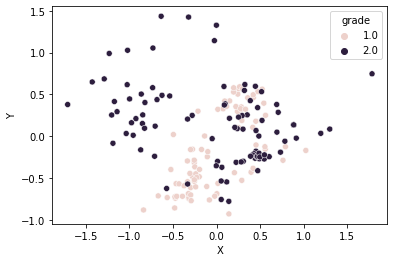

In [558]:
sns.scatterplot(data=pd.concat([X_two_dim, y], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

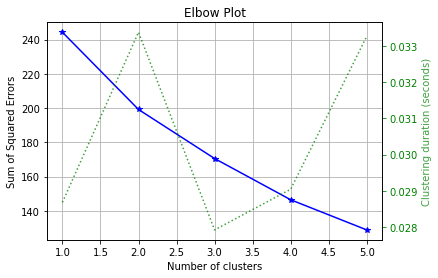

In [559]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X, cluster_ranges=range(1, 6))
plt.show()

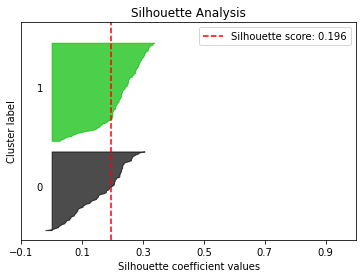

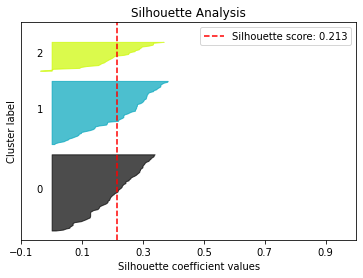

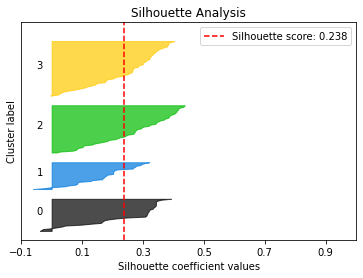

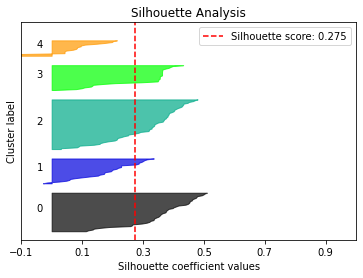

In [560]:
plot_multiple_silhouette(X, 5)
plt.show()

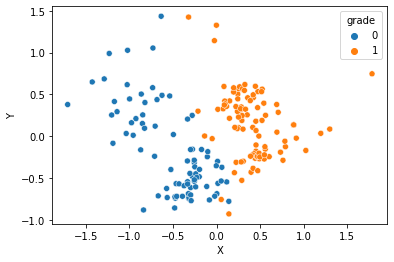

In [561]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices descriptivos y de legibilidad

### Dividiendo el dataset

In [562]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Descriptivos'] + indices['Legibilidad']]
X

DESPC     DESSC     DESWC     DESPL    DESPLd     DESSL    DESSLd  \
0    0.009281  0.026098  0.027683  0.145118  0.217045  0.477622  0.294133   
1    0.012303  0.018740  0.026075  0.063421  0.105339  0.625441  0.476487   
2    0.010360  0.010692  0.008490  0.031869  0.037316  0.355294  0.278242   
3    0.011440  0.012072  0.008357  0.033417  0.041149  0.310145  0.251216   
4    0.017483  0.021154  0.029675  0.043589  0.095931  0.630985  0.470038   
..        ...       ...       ...       ...       ...       ...       ...   
180  0.120009  0.180731  0.153059  0.063299  0.076448  0.382763  0.491590   
181  0.396072  0.518395  0.496979  0.050541  0.055604  0.433474  0.372363   
182  0.038204  0.325822  0.720696  0.517998  0.340476  1.000000  0.626127   
183  0.098424  0.110025  0.168940  0.038043  0.056994  0.693693  0.621368   
184  0.321822  0.463670  0.459928  0.059124  0.067774  0.448493  0.394840   

      DESWLsy  DESWLsyd   DESWLlt  DESWLltd    RDFHGL  
0    0.581022  0.663355  0.581341  0.642052  0.553702  
1    0.554769  0.676262  0.534959  0.639442  0.396620  
2    0.554881  0.689795  0.542600  0.667577  0.684185  
3    0.461312  0.665173  0.503065  0.656330  0.733202  
4    0.486498  0.691331  0.515246  0.666405  0.391416  
..        ...       ...       ...       ...       ...  
180  0.346787  0.651293  0.370864  0.591968  0.657071  
181  0.476349  0.690994  0.495079  0.638348  0.601767  
182  0.349967  0.654279  0.410148  0.612922  0.000000  
183  0.071891  0.563163  0.238580  0.507689  0.328899  
184  0.438670  0.663352  0.473042  0.610552  0.586164  

[184 rows x 12 columns]

In [563]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0   -0.277890 -0.069624
1   -0.406126  0.132100
2   -0.181843 -0.223317
3   -0.151311 -0.248554
4   -0.403326  0.150899
..        ...       ...
179 -0.068004  0.110891
180  0.375745  0.368907
181 -0.372630  1.086178
182 -0.374545  0.509395
183  0.270576  0.359176

[184 rows x 2 columns]

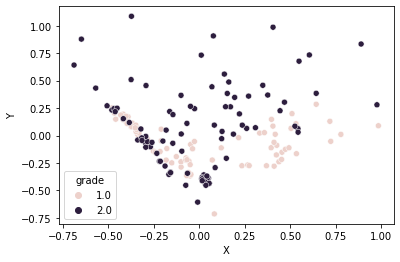

In [564]:
sns.scatterplot(data=pd.concat([X_two_dim, y], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

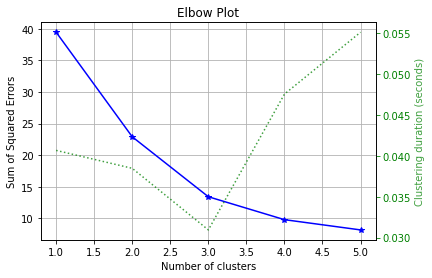

In [565]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

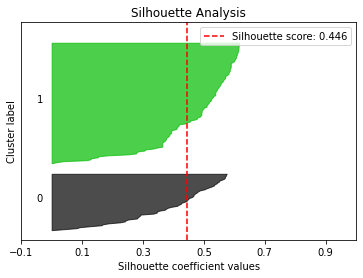

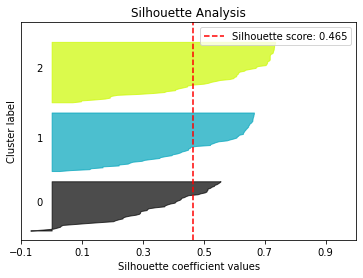

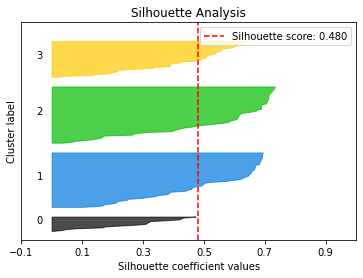

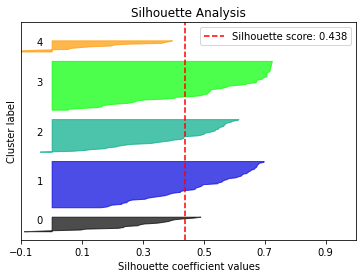

In [566]:
plot_multiple_silhouette(X_two_dim, 5)

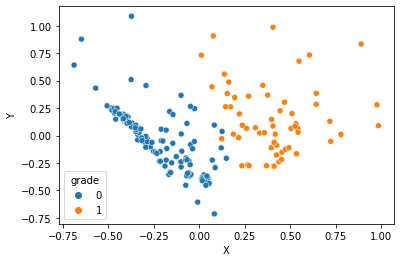

In [567]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de cohesion referencial

### Dividiendo el dataset

In [568]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Cohesion referencial']]
X

CRFNO1    CRFNOa    CRFAO1    CRFAOa    CRFSO1    CRFSOa   CRFCWO1  \
0    0.200256  0.066697  0.339996  0.256213  0.531754  0.582254  0.425646   
1    0.213404  0.132385  0.418478  0.340381  0.467500  0.445972  0.291937   
2    0.227444  0.198701  0.283181  0.258188  0.191053  0.182570  0.196105   
3    0.251512  0.153571  0.239130  0.245355  0.157143  0.134122  0.166133   
4    0.547090  0.207798  0.617391  0.470456  0.696000  0.519484  0.509932   
..        ...       ...       ...       ...       ...       ...       ...   
180  0.177901  0.035421  0.329019  0.224280  0.283705  0.248465  0.307401   
181  0.117661  0.061445  0.244616  0.180915  0.109426  0.063389  0.117719   
182  0.373810  0.125703  0.784432  0.657966  0.351611  0.154925  0.210732   
183  0.262773  0.085859  0.538936  0.388553  0.436716  0.178994  0.379918   
184  0.140225  0.041071  0.281678  0.199948  0.202610  0.122743  0.200935   

     CRFCWO1d   CRFCWOa  CRFCWOad   CRFANP1   CRFANPa  
0    0.463013  0.458473  0.562642  0.302586  0.289824  
1    0.371403  0.238096  0.349724  0.485598  0.435084  
2    0.316241  0.150240  0.320336  0.080007  0.072146  
3    0.262827  0.142864  0.337181  0.108581  0.142731  
4    0.467860  0.360718  0.642984  0.460647  0.622420  
..        ...       ...       ...       ...       ...  
180  0.442788  0.345495  0.594881  0.467523  0.413035  
181  0.289125  0.099111  0.253599  0.219540  0.186040  
182  0.236212  0.157026  0.235130  1.000000  0.927287  
183  0.458959  0.205287  0.338216  0.873510  0.702230  
184  0.366163  0.144830  0.311661  0.286636  0.273366  

[184 rows x 12 columns]

In [569]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0   -0.013794  0.072905
1   -0.059180  0.359010
2   -0.490693  0.005976
3   -0.533546  0.076872
4    0.515183  0.221791
..        ...       ...
179 -0.229239  0.263081
180 -0.685695  0.191030
181  0.239839  1.009990
182  0.068148  0.613094
183 -0.529829  0.198254

[184 rows x 2 columns]

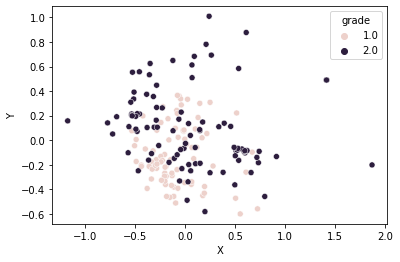

In [570]:
sns.scatterplot(data=pd.concat([X_two_dim, y], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

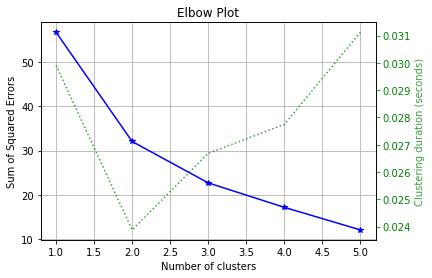

In [571]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

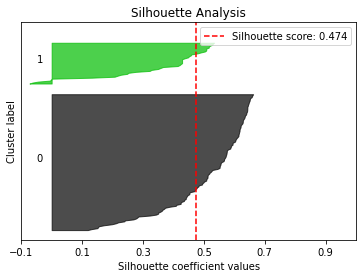

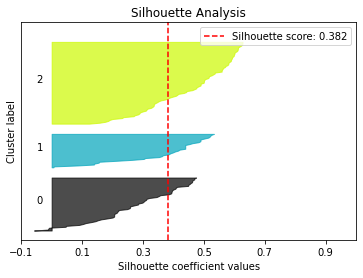

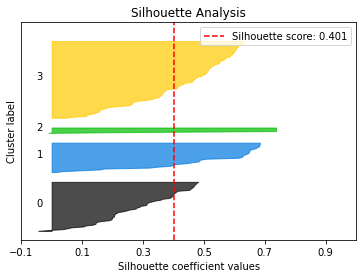

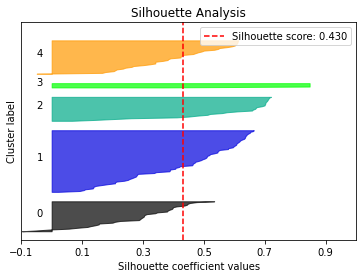

In [572]:
plot_multiple_silhouette(X_two_dim, 5)

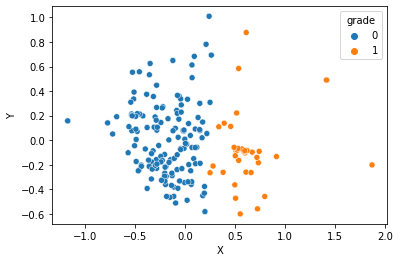

In [573]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de diversidad léxica

### Dividiendo el dataset

In [574]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Diversidad lexica']]
X

LDTTRa   LDTTRcw
0    0.244915  0.392305
1    0.290347  0.508323
2    0.375922  0.605121
3    0.385336  0.641420
4    0.196517  0.348158
..        ...       ...
180  0.102689  0.222838
181  0.086043  0.173501
182  0.041973  0.101599
183  0.114274  0.202591
184  0.068489  0.127056

[184 rows x 2 columns]

In [575]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0    0.090111 -0.000729
1    0.210570 -0.032570
2    0.339221 -0.020665
3    0.374075 -0.034501
4    0.025904 -0.013720
..        ...       ...
179 -0.130640 -0.015444
180 -0.180286  0.000255
181 -0.264337  0.007145
182 -0.140139  0.005861
183 -0.228134  0.013513

[184 rows x 2 columns]

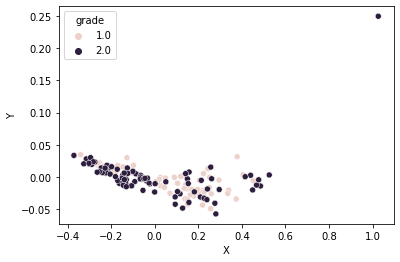

In [576]:
sns.scatterplot(data=pd.concat([X_two_dim, y], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

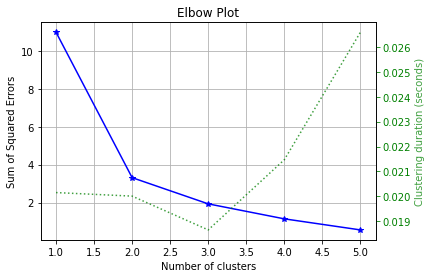

In [577]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

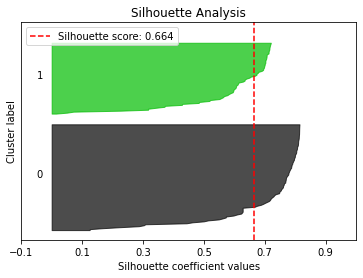

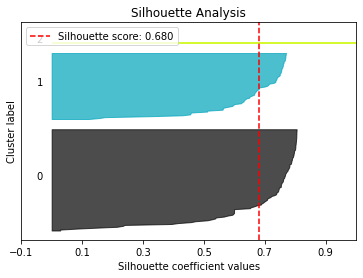

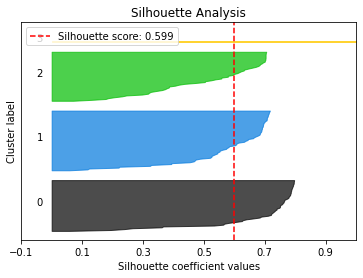

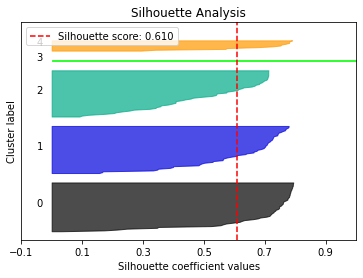

In [578]:
plot_multiple_silhouette(X_two_dim, 5)

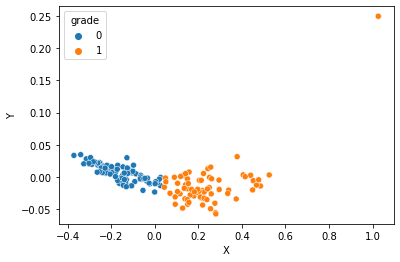

In [579]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de Conectivos

### Dividiendo el dataset

In [580]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Conectivos']]
X

CNCAll   CNCCaus  CNCLogic    CNCADC   CNCTemp    CNCAdd
0    0.604794  0.683853  0.467654  0.327205  0.300230  0.155964
1    0.588303  0.513225  0.522857  0.289486  0.159373  0.124187
2    0.691754  0.499783  0.634231  0.355633  0.244736  0.254272
3    0.755188  0.468667  0.685433  0.361283  0.745872  0.387467
4    0.590789  0.582960  0.471015  0.356119  0.070020  0.363742
..        ...       ...       ...       ...       ...       ...
180  0.556674  0.582181  0.382497  0.498104  0.420840  0.394924
181  0.528263  0.601603  0.399968  0.334150  0.347018  0.089049
182  0.718346  0.682065  0.625543  0.219950  0.484362  0.130302
183  0.877931  0.828854  0.808368  0.116171  0.307483  0.127785
184  0.581112  0.571293  0.478024  0.285572  0.465329  0.112651

[184 rows x 6 columns]

In [581]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0    0.034191  0.127909
1   -0.139980  0.019280
2   -0.060842  0.091521
3    0.408908  0.091796
4   -0.226523  0.246585
..        ...       ...
179  0.122859  0.349283
180  0.065467  0.078733
181  0.208498 -0.022695
182  0.065130 -0.072236
183  0.168828  0.013426

[184 rows x 2 columns]

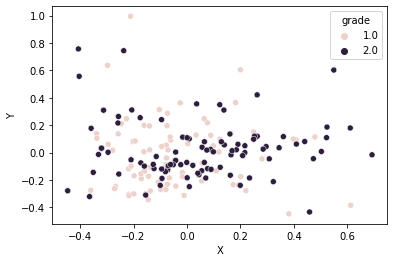

In [582]:
sns.scatterplot(data=pd.concat([X_two_dim, y], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

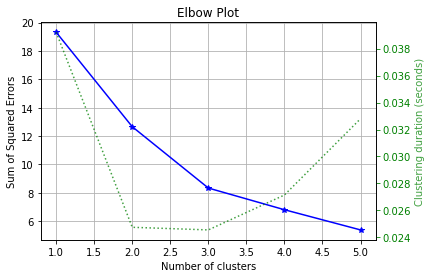

In [583]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

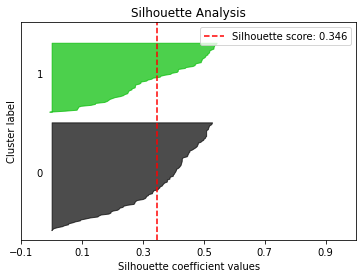

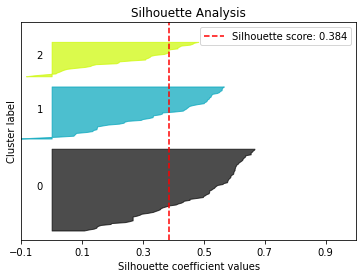

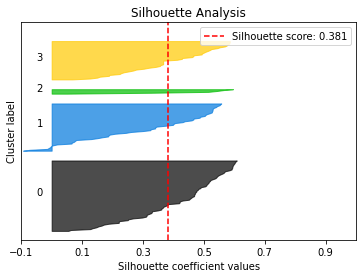

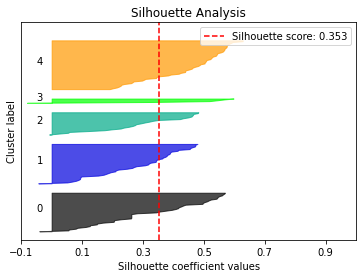

In [584]:
plot_multiple_silhouette(X_two_dim, 5)

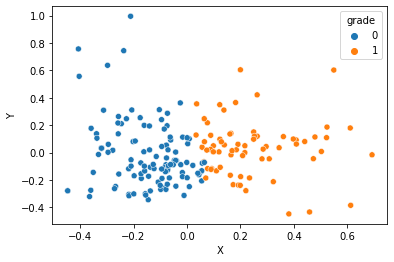

In [585]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de complejidad sintactica

### Dividiendo el dataset

In [586]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Complejidad sintactica']]
X

SYNNP     SYNLE
0    0.332508  0.399307
1    0.456002  0.492509
2    0.282603  0.328775
3    0.207729  0.236265
4    0.363198  0.525290
..        ...       ...
180  0.236768  0.400601
181  0.393110  0.400037
182  0.383187  0.731550
183  0.165318  0.743911
184  0.286306  0.409451

[184 rows x 2 columns]

In [587]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0    0.030312  0.048979
1    0.179625  0.008444
2   -0.056008  0.045228
3   -0.174994  0.047754
4    0.148696  0.101882
..        ...       ...
179 -0.027305  0.125452
180  0.068007  0.001521
181  0.323985  0.212412
182  0.200314  0.392204
183  0.010033  0.091713

[184 rows x 2 columns]

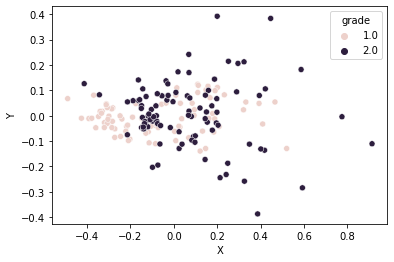

In [588]:
sns.scatterplot(data=pd.concat([X_two_dim, y], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

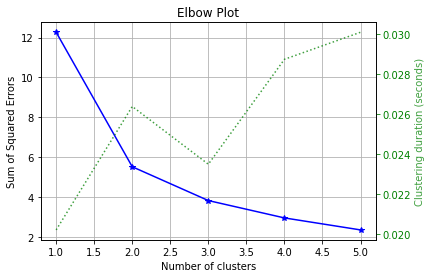

In [589]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

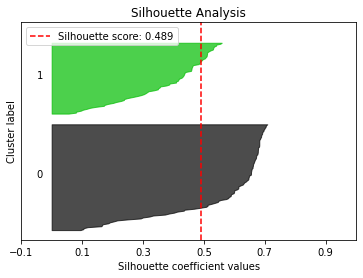

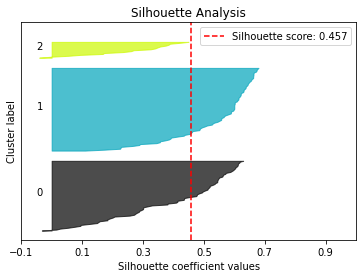

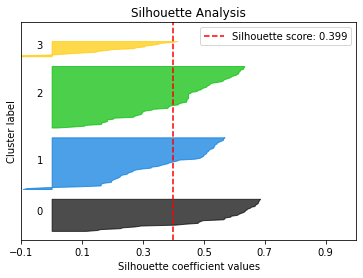

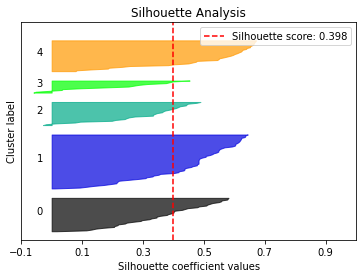

In [590]:
plot_multiple_silhouette(X_two_dim, 5)

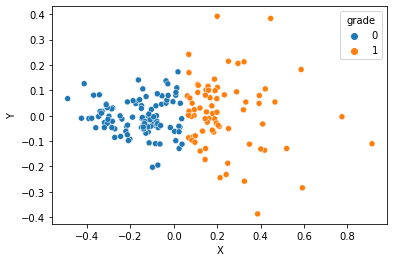

In [591]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de densidad de patrones sintacticos

### Dividiendo el dataset

In [592]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Densidad de patrones sintacticos']]
X

DRNP      DRVP     DRNEG
0    0.171921  0.324808  0.123741
1    0.118676  0.266840  0.122614
2    0.149049  0.353028  0.403475
3    0.185381  0.448296  0.573839
4    0.139430  0.288580  0.200089
..        ...       ...       ...
180  0.183149  0.372066  0.626660
181  0.149392  0.342041  0.463194
182  0.083438  0.328548  0.313073
183  0.133996  0.000000  0.517735
184  0.182756  0.345157  0.427517

[184 rows x 3 columns]

In [593]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0   -0.050157  0.042574
1   -0.094906 -0.006955
2    0.169968 -0.133571
3    0.361500 -0.176884
4   -0.022250 -0.041130
..        ...       ...
179  0.347374 -0.267309
180  0.205726 -0.182252
181  0.082508 -0.100383
182  0.009753 -0.463693
183  0.184671 -0.149669

[184 rows x 2 columns]

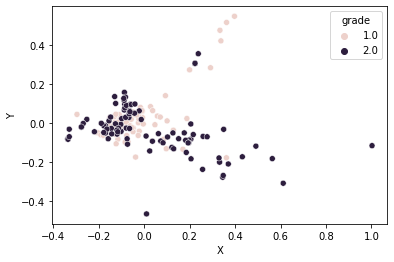

In [594]:
sns.scatterplot(data=pd.concat([X_two_dim, y], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

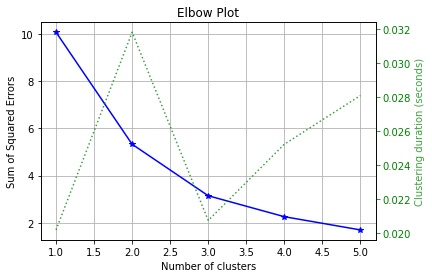

In [595]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

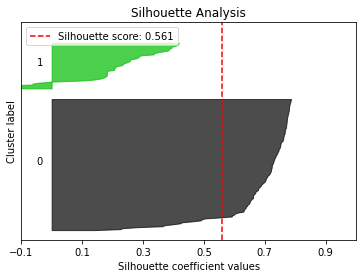

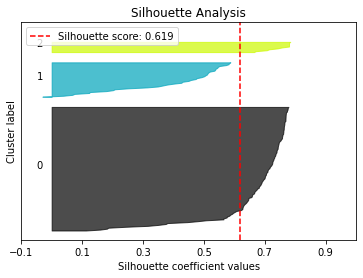

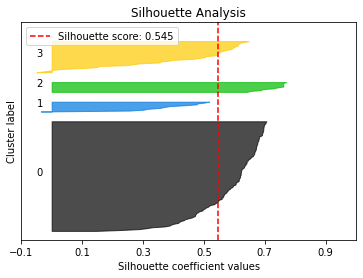

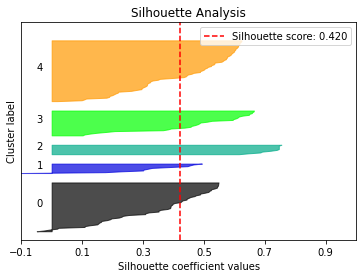

In [596]:
plot_multiple_silhouette(X_two_dim, 5)

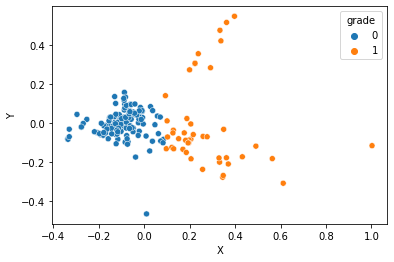

In [597]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de información de palabras

### Dividiendo el dataset

In [598]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Informacion de palabras']]
X

WRDNOUN   WRDVERB    WRDADJ    WRDADV    WRDPRO  WRDPRP1s  WRDPRP1p  \
0    0.202236  0.586216  0.509412  0.243812  0.349405  0.000000  0.000000   
1    0.162590  0.502393  0.540826  0.284413  0.345369  0.021403  0.057822   
2    0.129433  0.792212  0.419883  0.431843  0.290714  0.000000  0.000000   
3    0.114538  0.804798  0.345007  0.538410  0.478918  0.000000  0.000000   
4    0.186240  0.496798  0.475223  0.297649  0.348435  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
180  0.053430  0.626967  0.395602  0.828601  0.803679  0.459421  0.275817   
181  0.075393  0.577308  0.583129  0.608300  0.468453  0.387417  0.325624   
182  0.048134  0.604993  0.484895  0.586314  0.566009  0.788691  0.106694   
183  0.157891  0.543956  0.296040  0.634797  0.792491  0.865500  0.089246   
184  0.107386  0.590316  0.475086  0.613278  0.422648  0.077052  0.019669   

     WRDPRP2s  WRDPRP2p  WRDPRP3s  WRDPRP3p  
0    0.000000  0.000000  0.303517  0.207698  
1    0.055904  0.000000  0.262876  0.220507  
2    0.343387  0.000000  0.286481  0.150496  
3    0.639544  0.000000  0.291032  0.000000  
4    0.000000  0.000000  0.320403  0.150701  
..        ...       ...       ...       ...  
180  1.000000  0.978830  0.605304  0.208699  
181  0.136879  0.016443  0.277628  0.097698  
182  0.001348  0.071813  0.412042  0.305827  
183  0.155313  0.177363  0.687139  0.257149  
184  0.011621  0.290207  0.344704  0.125015  

[184 rows x 11 columns]

In [599]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0   -0.199774  0.051560
1   -0.186089  0.030961
2    0.032096 -0.099524
3    0.248774 -0.280269
4   -0.197073 -0.011738
..        ...       ...
179  1.181844 -0.483134
180  0.242895 -0.018345
181  0.499181  0.016686
182  0.812771 -0.089082
183  0.108432 -0.112479

[184 rows x 2 columns]

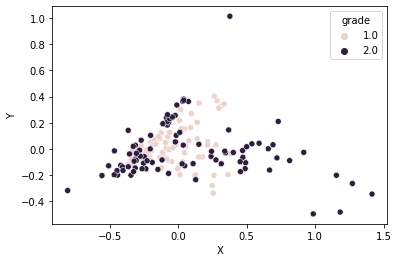

In [600]:
sns.scatterplot(data=pd.concat([X_two_dim, y], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

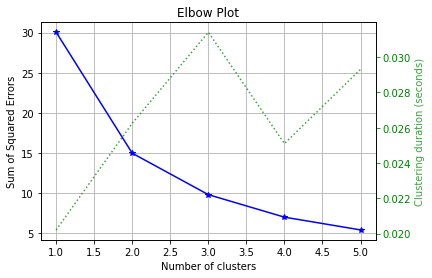

In [601]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

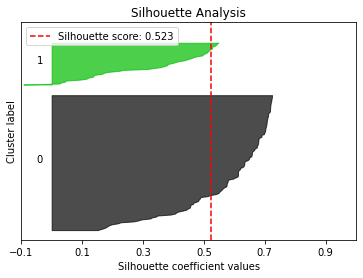

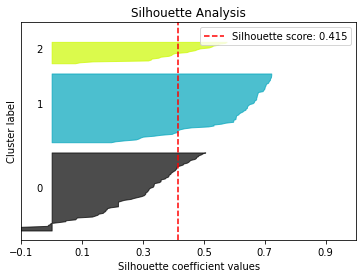

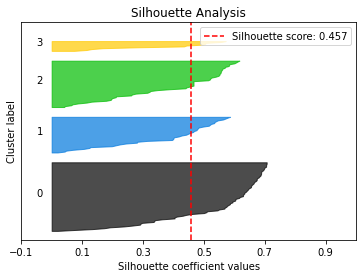

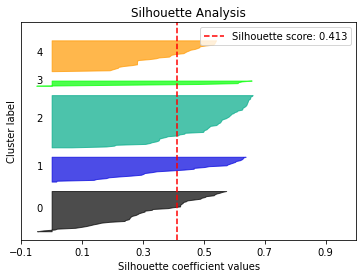

In [602]:
plot_multiple_silhouette(X_two_dim, 5)

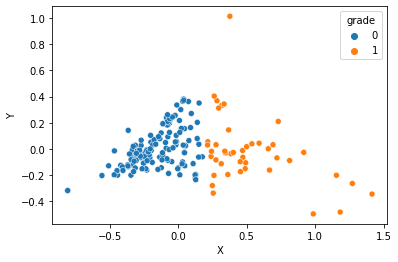

In [603]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

# Clustering por categoría

## Comunicación

## Obteniendo los datos

In [604]:
ot_da = ObtainedTextDA()
texts = ot_da.select_all_as_dataframe().drop(columns=['cluster_grade'])
texts = texts[texts['category'] == 'Comunicación']
texts.head()

CNCADC    CNCAdd     CNCAll   CNCCaus   CNCLogic   CNCTemp   CRFANP1  \
47  1.121964  0.593981  56.890180  6.929778  47.254488  0.989968  0.069312   
48  0.733328  0.431369  65.395566  4.227418  57.242688  2.760763  0.092777   
49  0.952436  0.317479  56.655507  6.032094  45.803510  3.549988  0.063739   
50  1.490241  0.865301  53.985194  4.855302  44.611095  2.163254  0.093656   
51  1.204443  0.758353  55.225945  8.297274  43.092296  1.873578  0.077408   

     CRFANPa    CRFAO1    CRFAOa  ...  WRDPRP1s  WRDPRP2p  WRDPRP2s  WRDPRP3p  \
47  0.028033  0.323136  0.082070  ...  6.599789  1.253960  2.408923  0.560982   
48  0.034539  0.263065  0.056593  ...  2.372530  1.639203  4.615650  1.423518   
49  0.026429  0.209632  0.045644  ...  2.308936  0.375202  2.915031  2.366659   
50  0.046554  0.297281  0.071110  ...  3.941929  0.192289  2.884338  2.836266   
51  0.035984  0.288417  0.067927  ...  2.542713  0.133827  4.683945  1.739751   

     WRDPRP3s     WRDVERB      category  \
47  12.902587  113.252376  Comunicación   
48  10.999914   94.771806  Comunicación   
49   8.196721  138.334103  Comunicación   
50  11.633497  138.400154  Comunicación   
51   8.654146  118.080029  Comunicación   

                                             filename  grade    id  
47  comunicacion-situaciones-comunicativas-portafo...    1.0  48.0  
48                 comunicacion1-cuaderno-trabajo.txt    1.0  49.0  
49                 comunicacion2-cuaderno-trabajo.txt    1.0  50.0  
50                 comunicacion3-cuaderno-trabajo.txt    1.0  51.0  
51                 comunicacion4-cuaderno-trabajo.txt    1.0  52.0  

[5 rows x 52 columns]

## Normalizando datos

In [605]:
columns = [c for c in texts.columns if c not in ['category', 'filename', 'grade', 'id']]
texts[columns] = MinMaxScaler().fit_transform(texts[columns])
texts

CNCADC    CNCAdd    CNCAll   CNCCaus  CNCLogic   CNCTemp   CRFANP1  \
47   0.119770  0.096225  0.612977  0.153471  0.755486  0.278865  0.136800   
48   0.078283  0.069882  0.806764  0.007475  1.000000  0.777682  0.214825   
49   0.101673  0.051432  0.607630  0.104974  0.719966  1.000000  0.118272   
50   0.159083  0.140179  0.546790  0.041397  0.690775  0.609369  0.217745   
51   0.128574  0.122853  0.575059  0.227351  0.653595  0.527770  0.163722   
..        ...       ...       ...       ...       ...       ...       ...   
180  0.519602  0.437205  0.384070  0.489879  0.201548  0.420840  0.417650   
181  0.348571  0.098583  0.329601  0.513592  0.229085  0.347018  0.146440   
182  0.229443  0.144252  0.694036  0.611829  0.584619  0.484362  1.000000   
183  0.121185  0.141466  1.000000  0.791046  0.872774  0.307483  0.861663   
184  0.297897  0.124711  0.430924  0.476586  0.352110  0.465329  0.219821   

      CRFANPa    CRFAO1    CRFAOa  ...  WRDPRP1s  WRDPRP2p  WRDPRP2s  \
47   0.070800  0.381946  0.107239  ...  0.249665  0.463069  0.158683   
48   0.096485  0.272111  0.050566  ...  0.089751  0.605334  0.304047   
49   0.064467  0.174411  0.026209  ...  0.087345  0.138557  0.192022   
50   0.143925  0.334672  0.082859  ...  0.149120  0.071010  0.190000   
51   0.102193  0.318466  0.075777  ...  0.096189  0.049420  0.308546   
..        ...       ...       ...  ...       ...       ...       ...   
180  0.408173  0.210403  0.214593  ...  0.459421  0.978830  1.000000   
181  0.161932  0.102842  0.158537  ...  0.387417  0.016443  0.136879   
182  0.966026  0.790768  0.775202  ...  0.788691  0.071813  0.001348   
183  0.721887  0.477915  0.426943  ...  0.865500  0.177363  0.155313   
184  0.256662  0.150072  0.183141  ...  0.077052  0.290207  0.011621   

     WRDPRP3p  WRDPRP3s   WRDVERB      category  \
47   0.093861  0.304296  0.501922  Comunicación   
48   0.238177  0.239590  0.308205  Comunicación   
49   0.395979  0.144259  0.764833  Comunicación   
50   0.474552  0.261137  0.765525  Comunicación   
51   0.291088  0.159815  0.552526  Comunicación   
..        ...       ...       ...           ...   
180  0.403171  0.552220  0.554466  Comunicación   
181  0.188735  0.180473  0.456278  Comunicación   
182  0.590804  0.332965  0.511019  Comunicación   
183  0.496768  0.645061  0.390332  Comunicación   
184  0.241507  0.256570  0.481999  Comunicación   

                                              filename  grade     id  
47   comunicacion-situaciones-comunicativas-portafo...    1.0   48.0  
48                  comunicacion1-cuaderno-trabajo.txt    1.0   49.0  
49                  comunicacion2-cuaderno-trabajo.txt    1.0   50.0  
50                  comunicacion3-cuaderno-trabajo.txt    1.0   51.0  
51                  comunicacion4-cuaderno-trabajo.txt    1.0   52.0  
..                                                 ...    ...    ...  
180                          seis_personajes_busca.txt    2.0  181.0  
181                            viaje_centro_tierra.txt    2.0  182.0  
182                                viajes_gulliver.txt    2.0  183.0  
183                          vida_lazarillo_tormes.txt    2.0  184.0  
184                                vuelta_mundo_80.txt    2.0  185.0  

[101 rows x 52 columns]

## Todos los índices

### Dividiendo el dataset

In [606]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X

CNCADC    CNCAdd    CNCAll   CNCCaus  CNCLogic   CNCTemp   CRFANP1  \
47   0.119770  0.096225  0.612977  0.153471  0.755486  0.278865  0.136800   
48   0.078283  0.069882  0.806764  0.007475  1.000000  0.777682  0.214825   
49   0.101673  0.051432  0.607630  0.104974  0.719966  1.000000  0.118272   
50   0.159083  0.140179  0.546790  0.041397  0.690775  0.609369  0.217745   
51   0.128574  0.122853  0.575059  0.227351  0.653595  0.527770  0.163722   
..        ...       ...       ...       ...       ...       ...       ...   
180  0.519602  0.437205  0.384070  0.489879  0.201548  0.420840  0.417650   
181  0.348571  0.098583  0.329601  0.513592  0.229085  0.347018  0.146440   
182  0.229443  0.144252  0.694036  0.611829  0.584619  0.484362  1.000000   
183  0.121185  0.141466  1.000000  0.791046  0.872774  0.307483  0.861663   
184  0.297897  0.124711  0.430924  0.476586  0.352110  0.465329  0.219821   

      CRFANPa    CRFAO1    CRFAOa  ...    WRDADV   WRDNOUN    WRDPRO  \
47   0.070800  0.381946  0.107239  ...  0.077290  0.654772  0.261576   
48   0.096485  0.272111  0.050566  ...  0.052771  0.670567  0.323330   
49   0.064467  0.174411  0.026209  ...  0.134544  0.592476  0.399818   
50   0.143925  0.334672  0.082859  ...  0.175474  0.480487  0.389473   
51   0.102193  0.318466  0.075777  ...  0.130323  0.565695  0.358499   
..        ...       ...       ...  ...       ...       ...       ...   
180  0.408173  0.210403  0.214593  ...  0.793206  0.196616  0.760925   
181  0.161932  0.102842  0.158537  ...  0.527411  0.277436  0.352698   
182  0.966026  0.790768  0.775202  ...  0.500885  0.177125  0.471499   
183  0.721887  0.477915  0.426943  ...  0.559380  0.581018  0.747302   
184  0.256662  0.150072  0.183141  ...  0.533417  0.395167  0.296917   

     WRDPRP1p  WRDPRP1s  WRDPRP2p  WRDPRP2s  WRDPRP3p  WRDPRP3s   WRDVERB  
47   0.084173  0.249665  0.463069  0.158683  0.093861  0.304296  0.501922  
48   0.071521  0.089751  0.605334  0.304047  0.238177  0.239590  0.308205  
49   0.213498  0.087345  0.138557  0.192022  0.395979  0.144259  0.764833  
50   0.190064  0.149120  0.071010  0.190000  0.474552  0.261137  0.765525  
51   0.261712  0.096189  0.049420  0.308546  0.291088  0.159815  0.552526  
..        ...       ...       ...       ...       ...       ...       ...  
180  0.516303  0.459421  0.978830  1.000000  0.403171  0.552220  0.554466  
181  0.609538  0.387417  0.016443  0.136879  0.188735  0.180473  0.456278  
182  0.199720  0.788691  0.071813  0.001348  0.590804  0.332965  0.511019  
183  0.167060  0.865500  0.177363  0.155313  0.496768  0.645061  0.390332  
184  0.036818  0.077052  0.290207  0.011621  0.241507  0.256570  0.481999  

[100 rows x 48 columns]

In [607]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.182030 -0.574582
1  -0.450891 -0.656324
2  -0.653011 -0.739457
3  -0.318678 -0.512190
4  -0.298576 -0.655150
..       ...       ...
95 -0.709021  0.660526
96 -1.026337 -0.033893
97 -0.645774  1.684313
98 -0.629376  1.191856
99 -0.818617  0.015793

[100 rows x 2 columns]

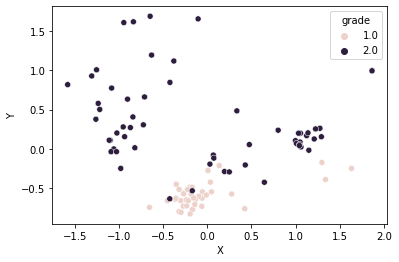

In [608]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

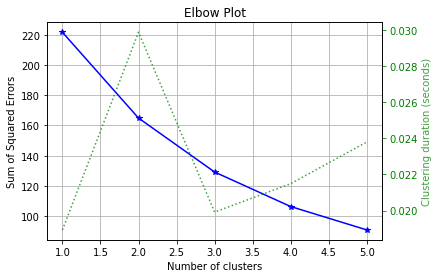

In [609]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X, cluster_ranges=range(1, 6))
plt.show()

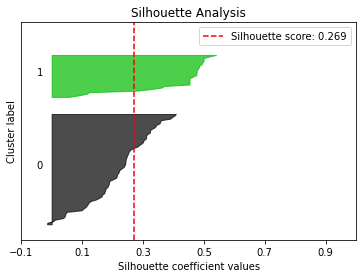

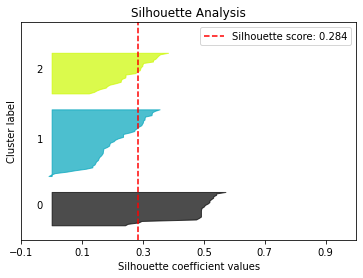

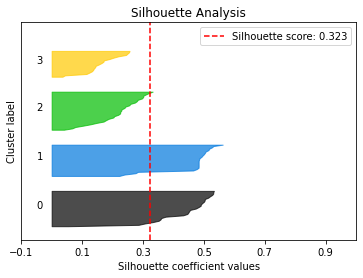

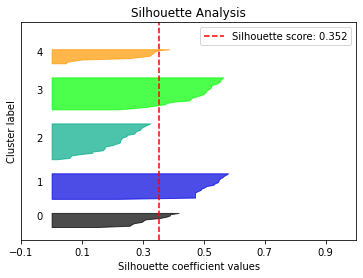

In [610]:
plot_multiple_silhouette(X, 5)
plt.show()

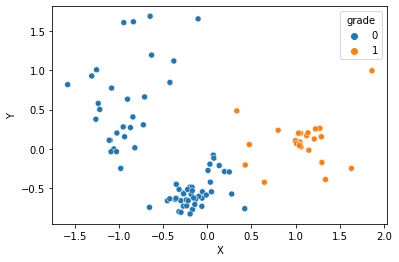

In [611]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices descriptivos y de legibilidad

### Dividiendo el dataset

In [612]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Descriptivos'] + indices['Legibilidad']]
X

DESPC     DESSC     DESWC     DESPL    DESPLd     DESSL    DESSLd  \
47   0.529247  0.357209  0.223532  0.009266  0.031708  0.282917  0.410399   
48   0.619901  0.412509  0.170998  0.008648  0.037638  0.187421  0.226063   
49   1.000000  0.686595  0.255575  0.010027  0.029058  0.168316  0.195137   
50   0.473775  0.307197  0.153442  0.007538  0.020576  0.225812  0.247246   
51   0.510037  0.325707  0.165355  0.006899  0.022079  0.229519  0.269232   
..        ...       ...       ...       ...       ...       ...       ...   
180  0.120009  0.180731  0.153059  0.063299  0.076448  0.382763  0.491590   
181  0.396072  0.518395  0.496979  0.050541  0.055604  0.433474  0.372363   
182  0.038204  0.325822  0.720696  0.517998  0.340476  1.000000  0.626127   
183  0.098424  0.110025  0.168940  0.038043  0.056994  0.693693  0.621368   
184  0.321822  0.463670  0.459928  0.059124  0.067774  0.448493  0.394840   

      DESWLsy  DESWLsyd   DESWLlt  DESWLltd    RDFHGL  
47   0.533367  0.428959  0.514898  0.418964  0.851514  
48   0.042772  0.251955  0.000000  0.348579  0.969950  
49   0.549103  0.324650  0.616370  0.305733  0.987754  
50   0.569931  0.362284  0.643416  0.348965  0.919122  
51   0.599528  0.383538  0.667861  0.362686  0.914422  
..        ...       ...       ...       ...       ...  
180  0.331819  0.251868  0.403099  0.208248  0.734646  
181  0.483700  0.337045  0.592508  0.298244  0.672812  
182  0.335547  0.258275  0.463001  0.248907  0.000000  
183  0.009567  0.062790  0.201387  0.044712  0.367730  
184  0.439530  0.277741  0.558906  0.244309  0.655368  

[100 rows x 12 columns]

In [613]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.020850  0.299973
1   0.279776 -0.020497
2  -0.029315  0.698756
3  -0.191688  0.220694
4  -0.197378  0.281379
..       ...       ...
95  0.187133 -0.235506
96  0.282235  0.344867
97  1.037659  0.005736
98  0.723132 -0.511346
99  0.320306  0.211583

[100 rows x 2 columns]

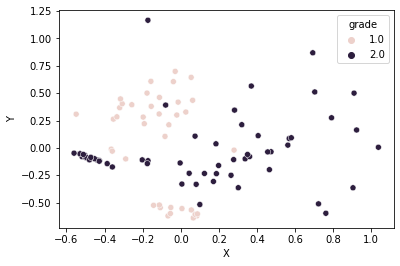

In [614]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

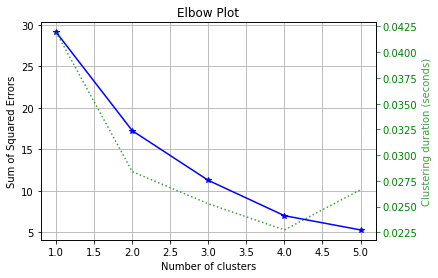

In [615]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

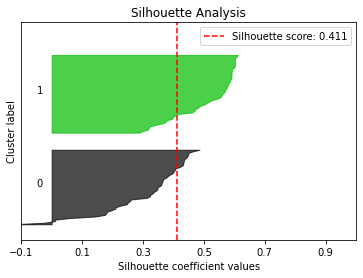

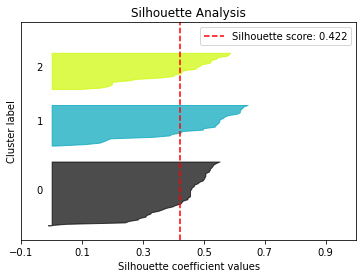

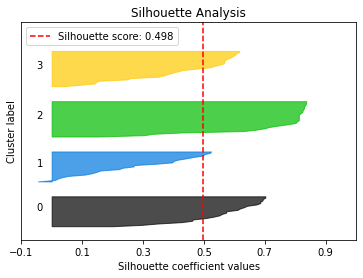

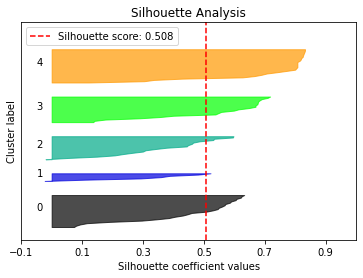

In [616]:
plot_multiple_silhouette(X_two_dim, 5)

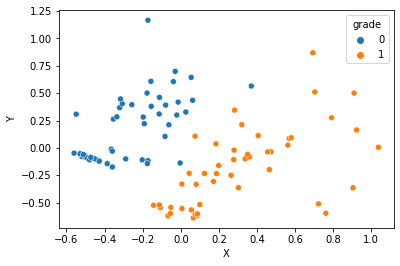

In [617]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de cohesion referencial

### Dividiendo el dataset

In [618]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Cohesion referencial']]
X

CRFNO1    CRFNOa    CRFAO1    CRFAOa    CRFSO1    CRFSOa   CRFCWO1  \
47   0.424836  0.084957  0.381946  0.107239  0.470610  0.129244  0.560882   
48   0.351644  0.059732  0.272111  0.050566  0.379144  0.080870  0.526075   
49   0.221142  0.043873  0.174411  0.026209  0.238626  0.057512  0.341140   
50   0.373134  0.056921  0.334672  0.082859  0.388352  0.053986  0.464491   
51   0.355714  0.062258  0.318466  0.075777  0.363843  0.060347  0.431241   
..        ...       ...       ...       ...       ...       ...       ...   
180  0.107744  0.015985  0.210403  0.214593  0.269885  0.351742  0.308538   
181  0.042364  0.053261  0.102842  0.158537  0.021682  0.049057  0.037828   
182  0.320372  0.145302  0.790768  0.775202  0.366596  0.198761  0.170574   
183  0.199860  0.088231  0.477915  0.426943  0.487800  0.238124  0.412032   
184  0.066853  0.024077  0.150072  0.183141  0.154391  0.146128  0.156592   

     CRFCWO1d   CRFCWOa  CRFCWOad   CRFANP1   CRFANPa  
47   0.577276  0.118955  0.295992  0.136800  0.070800  
48   0.576475  0.119498  0.347136  0.214825  0.096485  
49   0.486704  0.074404  0.264890  0.118272  0.064467  
50   0.515432  0.032530  0.115989  0.217745  0.143925  
51   0.479533  0.023389  0.088470  0.163722  0.102193  
..        ...       ...       ...       ...       ...  
180  0.273234  0.770976  0.800069  0.417650  0.408173  
181  0.072813  0.119318  0.083805  0.146440  0.161932  
182  0.003799  0.272497  0.045043  1.000000  0.966026  
183  0.294325  0.400142  0.261395  0.861663  0.721887  
184  0.173293  0.240240  0.205662  0.219821  0.256662  

[100 rows x 12 columns]

In [619]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.331128 -0.334109
1  -0.443175 -0.285828
2  -0.689773 -0.191792
3  -0.518201 -0.143217
4  -0.569868 -0.151157
..       ...       ...
95 -0.066242  0.180343
96 -0.905858  0.302108
97  0.119120  1.235797
98  0.026627  0.663668
99 -0.669313  0.259094

[100 rows x 2 columns]

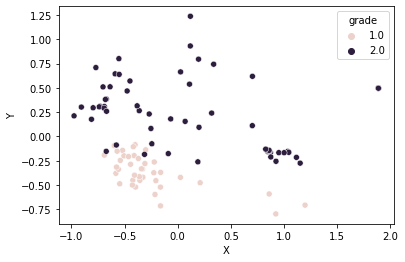

In [620]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

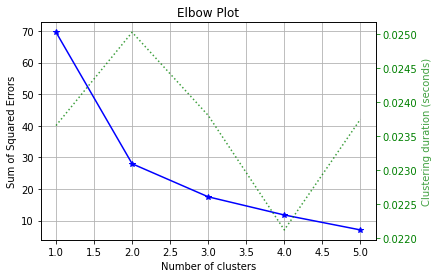

In [621]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

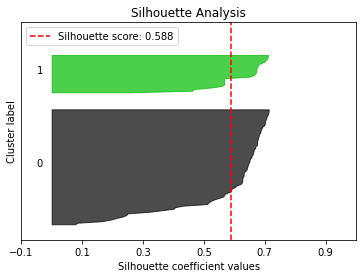

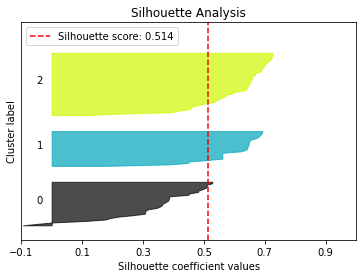

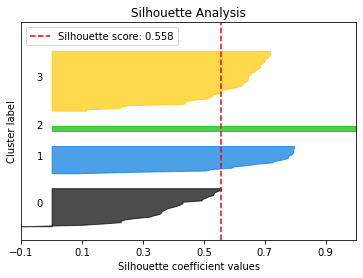

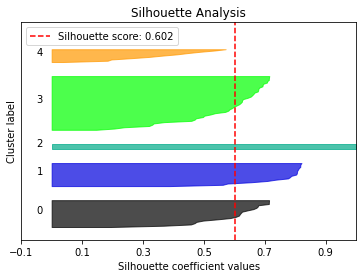

In [622]:
plot_multiple_silhouette(X_two_dim, 5)

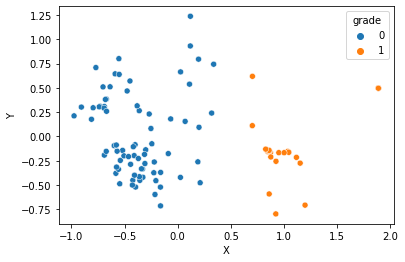

In [623]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de diversidad léxica

### Dividiendo el dataset

In [624]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Diversidad lexica']]
X

LDTTRa   LDTTRcw
47   0.098915  0.117704
48   0.082154  0.107342
49   0.044025  0.037922
50   0.210981  0.263853
51   0.249494  0.320321
..        ...       ...
180  0.232872  0.345501
181  0.195124  0.269006
182  0.095185  0.157525
183  0.259145  0.314109
184  0.155316  0.196996

[100 rows x 2 columns]

In [625]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.359206  0.019624
1  -0.378248  0.014558
2  -0.454893  0.034522
3  -0.176010  0.000704
4  -0.108516 -0.010085
..       ...       ...
95 -0.101630 -0.039460
96 -0.183156 -0.014361
97 -0.332823 -0.010436
98 -0.106403  0.001196
99 -0.262836  0.006162

[100 rows x 2 columns]

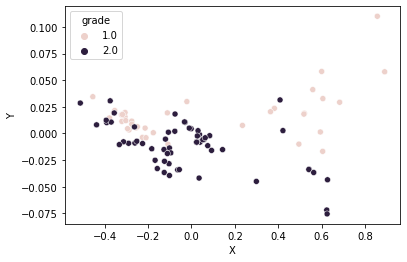

In [626]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

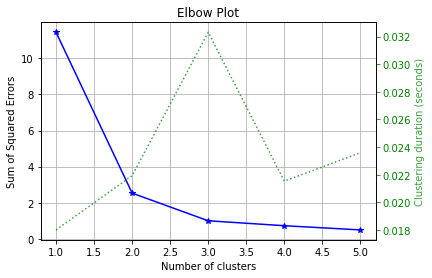

In [627]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

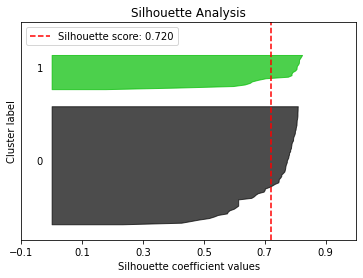

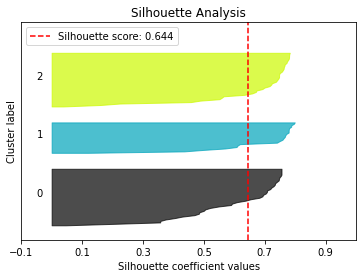

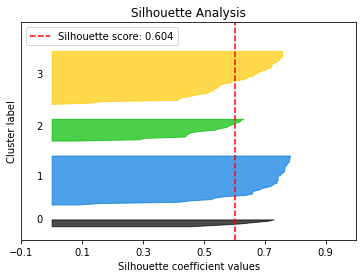

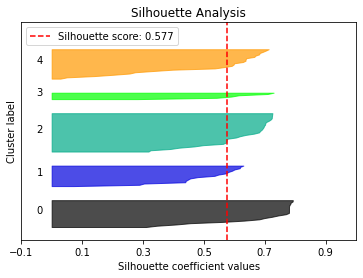

In [628]:
plot_multiple_silhouette(X_two_dim, 5)

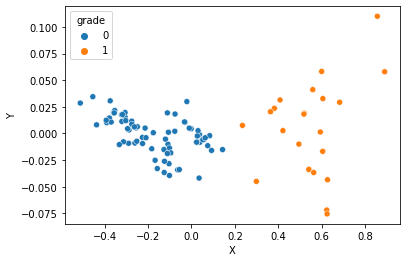

In [629]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de Conectivos

### Dividiendo el dataset

In [630]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Conectivos']]
X

CNCAll   CNCCaus  CNCLogic    CNCADC   CNCTemp    CNCAdd
47   0.612977  0.153471  0.755486  0.119770  0.278865  0.096225
48   0.806764  0.007475  1.000000  0.078283  0.777682  0.069882
49   0.607630  0.104974  0.719966  0.101673  1.000000  0.051432
50   0.546790  0.041397  0.690775  0.159083  0.609369  0.140179
51   0.575059  0.227351  0.653595  0.128574  0.527770  0.122853
..        ...       ...       ...       ...       ...       ...
180  0.384070  0.489879  0.201548  0.519602  0.420840  0.437205
181  0.329601  0.513592  0.229085  0.348571  0.347018  0.098583
182  0.694036  0.611829  0.584619  0.229443  0.484362  0.144252
183  1.000000  0.791046  0.872774  0.121185  0.307483  0.141466
184  0.430924  0.476586  0.352110  0.297897  0.465329  0.124711

[100 rows x 6 columns]

In [631]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.380366 -0.055725
1  -0.571750  0.460952
2  -0.205753  0.485008
3  -0.253809  0.146922
4  -0.195807  0.107480
..       ...       ...
95  0.460257 -0.050197
96  0.335248 -0.167855
97 -0.000973  0.196182
98 -0.319259  0.282604
99  0.214196 -0.011481

[100 rows x 2 columns]

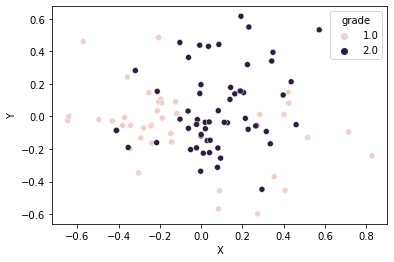

In [632]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

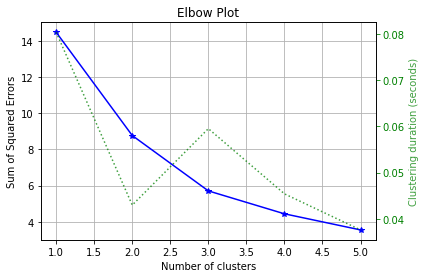

In [633]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

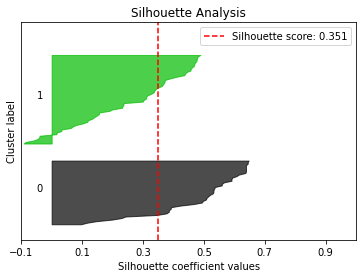

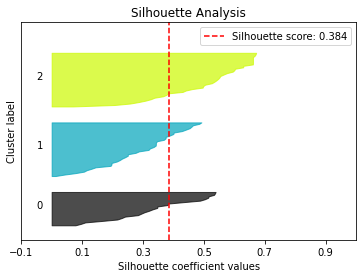

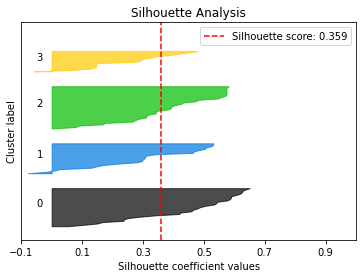

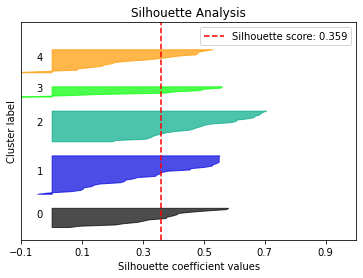

In [634]:
plot_multiple_silhouette(X_two_dim, 5)

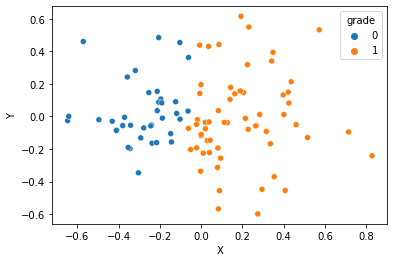

In [635]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de complejidad sintactica

### Dividiendo el dataset

In [636]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Complejidad sintactica']]
X

SYNNP     SYNLE
47   0.271758  0.229841
48   0.104532  0.069687
49   0.150500  0.098445
50   0.247786  0.152170
51   0.246070  0.159092
..        ...       ...
180  0.226590  0.417454
181  0.430116  0.416862
182  0.417197  0.764755
183  0.133577  0.777726
184  0.291079  0.426741

[100 rows x 2 columns]

In [637]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.072502 -0.018009
1  -0.299960  0.025311
2  -0.249871  0.004548
3  -0.149676 -0.043536
4  -0.145033 -0.038123
..       ...       ...
95  0.054123  0.127609
96  0.171698 -0.038522
97  0.447590  0.173799
98  0.293640  0.412353
99  0.099095  0.080465

[100 rows x 2 columns]

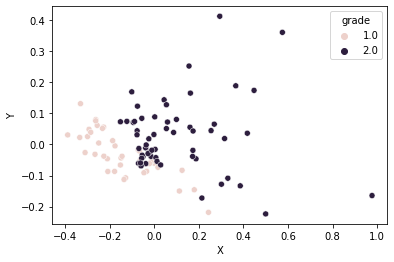

In [638]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

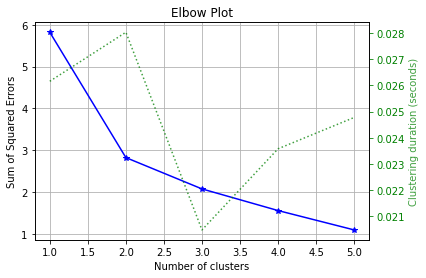

In [639]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

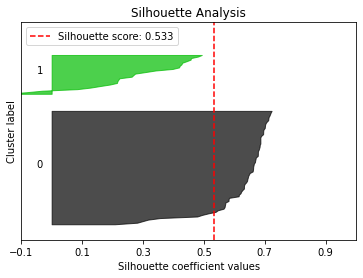

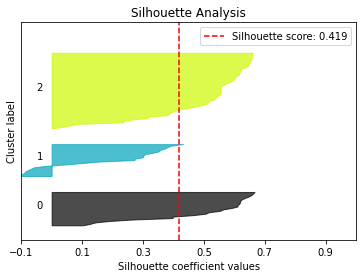

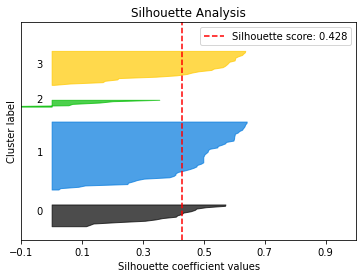

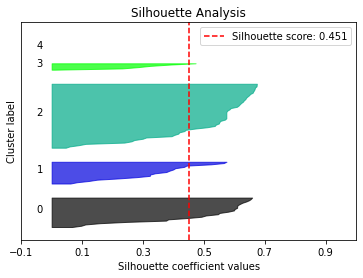

In [640]:
plot_multiple_silhouette(X_two_dim, 5)

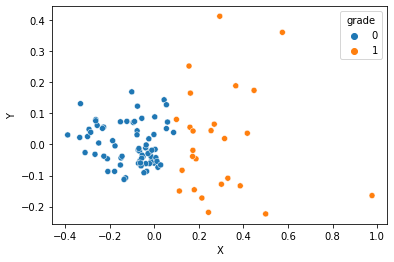

In [641]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de densidad de patrones sintacticos

### Dividiendo el dataset

In [642]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Densidad de patrones sintacticos']]
X

DRNP      DRVP     DRNEG
47   0.444006  0.358681  0.145955
48   0.738237  0.184044  0.092109
49   0.673342  0.304078  0.175219
50   0.500496  0.401134  0.159609
51   0.541749  0.313972  0.106157
..        ...       ...       ...
180  0.418312  0.372066  0.732188
181  0.341211  0.342041  0.534459
182  0.190572  0.328548  0.352874
183  0.306048  0.000000  0.600432
184  0.417415  0.345157  0.491305

[100 rows x 3 columns]

In [643]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.106696  0.020291
1  -0.217313 -0.187845
2  -0.105292 -0.170770
3  -0.087484 -0.047648
4  -0.161744 -0.054431
..       ...       ...
95  0.467875  0.054328
96  0.273842  0.131878
97  0.103954  0.271726
98  0.263142  0.294927
99  0.227695  0.059010

[100 rows x 2 columns]

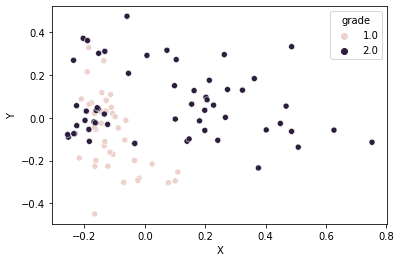

In [644]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

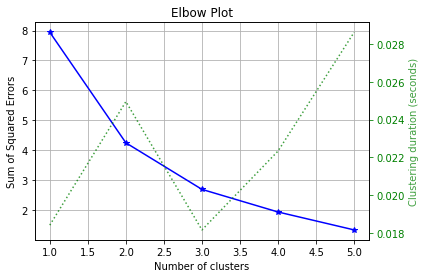

In [645]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

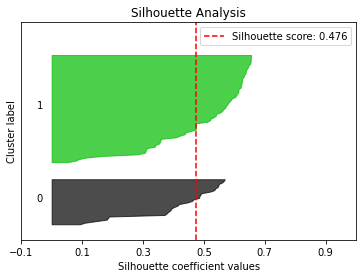

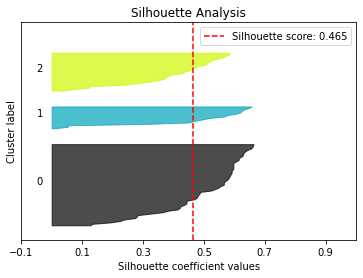

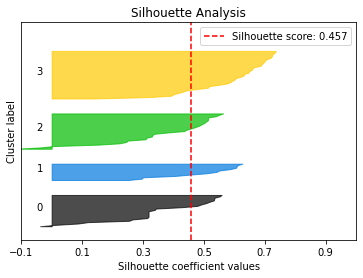

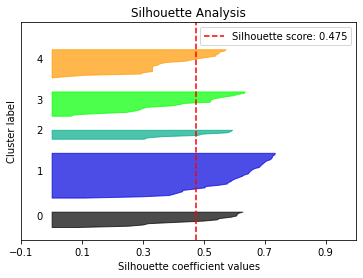

In [646]:
plot_multiple_silhouette(X_two_dim, 5)

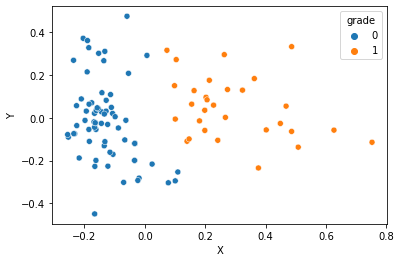

In [647]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de información de palabras

### Dividiendo el dataset

In [648]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Informacion de palabras']]
X

WRDNOUN   WRDVERB    WRDADJ    WRDADV    WRDPRO  WRDPRP1s  WRDPRP1p  \
47   0.654772  0.501922  0.497013  0.077290  0.261576  0.249665  0.084173   
48   0.670567  0.308205  0.195361  0.052771  0.323330  0.089751  0.071521   
49   0.592476  0.764833  0.341438  0.134544  0.399818  0.087345  0.213498   
50   0.480487  0.765525  0.494682  0.175474  0.389473  0.149120  0.190064   
51   0.565695  0.552526  0.537664  0.130323  0.358499  0.096189  0.261712   
..        ...       ...       ...       ...       ...       ...       ...   
180  0.196616  0.554466  0.441386  0.793206  0.760925  0.459421  0.516303   
181  0.277436  0.456278  0.830872  0.527411  0.352698  0.387417  0.609538   
182  0.177125  0.511019  0.626845  0.500885  0.471499  0.788691  0.199720   
183  0.581018  0.390332  0.234599  0.559380  0.747302  0.865500  0.167060   
184  0.395167  0.481999  0.606472  0.533417  0.296917  0.077052  0.036818   

     WRDPRP2s  WRDPRP2p  WRDPRP3s  WRDPRP3p  
47   0.158683  0.463069  0.304296  0.093861  
48   0.304047  0.605334  0.239590  0.238177  
49   0.192022  0.138557  0.144259  0.395979  
50   0.190000  0.071010  0.261137  0.474552  
51   0.308546  0.049420  0.159815  0.291088  
..        ...       ...       ...       ...  
180  1.000000  0.978830  0.552220  0.403171  
181  0.136879  0.016443  0.180473  0.188735  
182  0.001348  0.071813  0.332965  0.590804  
183  0.155313  0.177363  0.645061  0.496768  
184  0.011621  0.290207  0.256570  0.241507  

[100 rows x 11 columns]

In [649]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.167910 -0.327687
1  -0.195346 -0.326507
2  -0.092434  0.048374
3   0.007371  0.109618
4  -0.174602 -0.069782
..       ...       ...
95  1.076373 -0.343617
96  0.143732 -0.039436
97  0.469177  0.102015
98  0.647612 -0.192608
99 -0.023686 -0.229246

[100 rows x 2 columns]

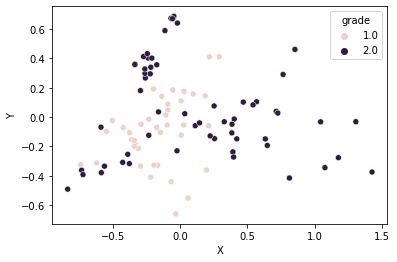

In [650]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

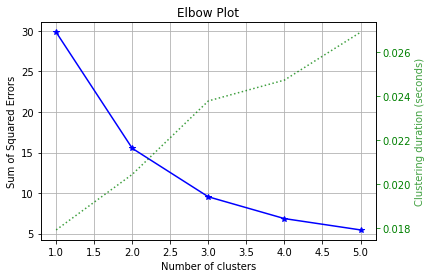

In [651]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

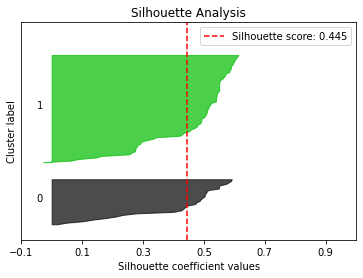

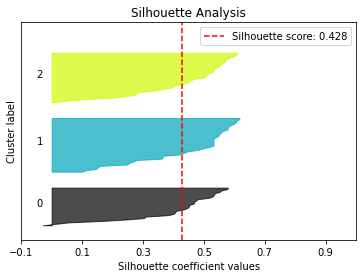

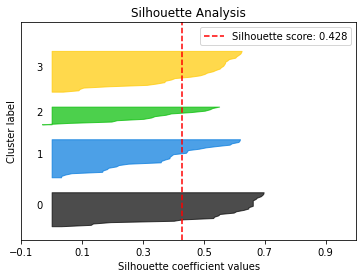

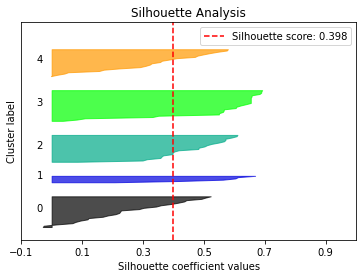

In [652]:
plot_multiple_silhouette(X_two_dim, 5)

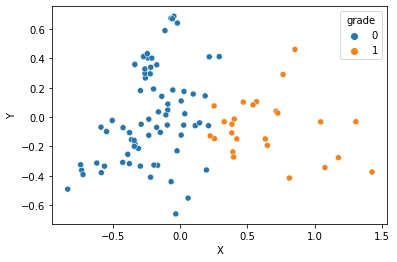

In [653]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Ciencia y tecnología

## Obteniendo los datos

In [654]:
ot_da = ObtainedTextDA()
texts = ot_da.select_all_as_dataframe().drop(columns=['cluster_grade'])
texts = texts[texts['category'] == 'CTA']
texts.head()

CNCADC    CNCAdd     CNCAll   CNCCaus   CNCLogic   CNCTemp   CRFANP1  \
34  0.000000  0.000000   0.000000  0.000000   0.000000  0.000000  0.000000   
35  2.056404  1.468860  53.613396  9.547591  39.512338  1.028202  0.138514   
36  0.303674  0.607349  50.409961  6.984513  42.514425  0.000000  0.077670   
37  2.857483  2.143112  60.245267  8.929634  45.362543  0.952494  0.104061   
38  4.093155  2.117149  65.772759  7.904023  50.105857  1.552576  0.072414   

     CRFANPa    CRFAO1    CRFAOa  ...  WRDPRP1s  WRDPRP2p  WRDPRP2s  WRDPRP3p  \
34  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
35  0.101761  0.422297  0.217308  ...  0.000000  0.000000  1.175088  1.909518   
36  0.083645  0.407767  0.303025  ...  0.607349  0.303674  0.607349  1.822047   
37  0.061967  0.530457  0.217439  ...  0.119062  0.000000  1.190618  1.666865   
38  0.056594  0.379310  0.189667  ...  0.000000  0.564573  1.976006  3.810868   

    WRDPRP3s     WRDVERB  category  \
34  0.000000    0.000000       CTA   
35  6.609871  103.701528       CTA   
36  6.680838   75.007592       CTA   
37  3.690916   95.963805       CTA   
38  6.633733  112.067749       CTA   

                                            filename  grade    id  
34     .~lock.guia_espacio_vida_estudiantes_iii.txt#    1.0  35.0  
35          ahorro-energia-eficiente-tecnologias.txt    1.0  36.0  
36  amigos-amigas-energia-3-4-cartilla-actividad.txt    1.0  37.0  
37    amigos-amigas-energia-3-4-cuaderno-trabajo.txt    1.0  38.0  
38                          areas-verdes-escuela.txt    1.0  39.0  

[5 rows x 52 columns]

## Normalizando datos

In [655]:
columns = [c for c in texts.columns if c not in ['category', 'filename', 'grade', 'id']]
texts[columns] = MinMaxScaler().fit_transform(texts[columns])
texts

CNCADC    CNCAdd    CNCAll   CNCCaus  CNCLogic   CNCTemp   CRFANP1  \
34   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
35   0.365479  0.608001  0.637127  0.602323  0.613702  0.583790  0.451158   
36   0.053971  0.251398  0.599058  0.440628  0.660330  0.000000  0.252982   
37   0.507853  0.887092  0.715938  0.563339  0.704567  0.540805  0.338941   
38   0.727465  0.876345  0.781625  0.498636  0.778240  0.881518  0.235862   
39   0.785431  1.000000  0.689733  0.739744  0.592137  0.769483  0.372107   
40   0.491231  0.526275  0.603054  0.456845  0.595862  0.627726  0.236515   
41   0.319565  0.572513  0.734720  0.558441  0.766929  0.235592  0.219158   
42   0.395780  0.409676  0.746868  0.632191  0.764778  0.210730  0.233635   
43   0.186960  0.301452  0.657749  0.413497  0.725191  0.183777  0.300705   
44   0.174348  0.406056  0.796313  0.357039  0.914194  0.299913  0.213157   
45   0.188871  0.263928  0.779619  0.540805  0.846195  0.482702  0.247978   
46   0.316321  0.378880  0.659905  0.407423  0.710053  0.375343  0.183020   
106  0.646704  0.722964  0.623547  0.647346  0.553863  0.661120  0.523084   
107  0.352051  0.505622  0.726598  0.379060  0.791723  0.543597  0.231074   
108  0.149439  0.180467  0.704637  0.426326  0.785036  0.406680  0.239225   
109  0.463475  0.596259  0.719269  0.490414  0.738715  0.648663  0.218105   
110  0.379411  0.412919  0.649643  0.558844  0.648274  0.532412  0.285986   
111  0.481326  0.556692  0.714832  0.635757  0.703642  0.407954  0.326109   
112  0.441155  0.553715  0.721548  0.629186  0.713352  0.565423  0.334009   
113  0.330382  0.470226  0.553502  0.436517  0.553394  0.586366  0.351771   
114  0.354578  0.516133  0.556828  0.466737  0.546580  0.582110  0.359639   
115  0.453574  0.685215  0.730745  0.461247  0.766525  0.352462  0.246095   
116  0.536362  0.446138  0.630178  0.652759  0.572528  0.979138  0.314610   
117  0.250693  0.389242  0.531746  0.568524  0.506330  0.444932  0.463300   
118  0.278242  0.243010  1.000000  1.000000  1.000000  1.000000  1.000000   
119  1.000000  0.846909  0.583548  0.742193  0.436959  0.871270  0.196213   
120  0.358247  0.595970  0.680983  0.513847  0.699636  0.373707  0.325413   
121  0.574402  0.594570  0.867518  0.488691  0.929859  0.407782  0.192778   
122  0.000000  0.000000  0.491317  0.407535  0.541811  0.000000  0.140092   

      CRFANPa    CRFAO1    CRFAOa  ...  WRDPRP1s  WRDPRP2p  WRDPRP2s  \
34   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
35   0.370373  0.747885  0.549346  ...  0.000000  0.000000  0.382725   
36   0.304436  0.722152  0.766034  ...  0.058761  0.352186  0.197813   
37   0.225540  0.939435  0.549677  ...  0.011519  0.000000  0.387783   
38   0.205983  0.671756  0.479471  ...  0.000000  0.654764  0.643583   
39   0.304260  0.709448  0.413886  ...  0.216634  0.068337  0.671702   
40   0.142032  0.744037  0.520114  ...  0.032090  0.192330  0.072017   
41   0.087261  0.714971  0.290361  ...  0.147199  0.160408  0.495531   
42   0.093533  0.713628  0.282853  ...  0.107726  0.286960  0.402943   
43   0.250172  0.663717  0.189676  ...  0.219210  0.187692  0.237198   
44   0.143713  0.504584  0.136226  ...  0.131414  0.087515  0.221196   
45   0.235729  0.622650  0.174209  ...  0.185069  0.164329  0.207672   
46   0.130969  0.645991  0.220622  ...  0.083638  0.000000  0.579683   
106  0.531375  0.891360  0.580721  ...  0.007041  0.168801  0.426649   
107  0.115258  0.726533  0.183491  ...  0.130959  0.076576  1.000000   
108  0.115560  0.813789  0.224536  ...  0.141610  0.036117  0.831718   
109  0.143464  0.717640  0.203618  ...  0.064878  0.057607  0.469167   
110  0.189506  0.808130  0.262382  ...  0.036676  0.208247  0.558839   
111  0.223856  0.822936  0.266001  ...  0.098035  0.128199  0.732056   
112  0.208588  0.804614  0.315306  ...  0.030199  0.000000  0.474420   
113  0.271673  0.715481  0.317887  ...  0.000000  0.119772  0.033636   
114  0.230357  0.945470  0.385377  

## Todos los índices

### Dividiendo el dataset

In [656]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X

CNCADC    CNCAdd    CNCAll   CNCCaus  CNCLogic   CNCTemp   CRFANP1  \
34   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
35   0.365479  0.608001  0.637127  0.602323  0.613702  0.583790  0.451158   
36   0.053971  0.251398  0.599058  0.440628  0.660330  0.000000  0.252982   
37   0.507853  0.887092  0.715938  0.563339  0.704567  0.540805  0.338941   
38   0.727465  0.876345  0.781625  0.498636  0.778240  0.881518  0.235862   
39   0.785431  1.000000  0.689733  0.739744  0.592137  0.769483  0.372107   
40   0.491231  0.526275  0.603054  0.456845  0.595862  0.627726  0.236515   
41   0.319565  0.572513  0.734720  0.558441  0.766929  0.235592  0.219158   
42   0.395780  0.409676  0.746868  0.632191  0.764778  0.210730  0.233635   
43   0.186960  0.301452  0.657749  0.413497  0.725191  0.183777  0.300705   
44   0.174348  0.406056  0.796313  0.357039  0.914194  0.299913  0.213157   
45   0.188871  0.263928  0.779619  0.540805  0.846195  0.482702  0.247978   
46   0.316321  0.378880  0.659905  0.407423  0.710053  0.375343  0.183020   
106  0.646704  0.722964  0.623547  0.647346  0.553863  0.661120  0.523084   
107  0.352051  0.505622  0.726598  0.379060  0.791723  0.543597  0.231074   
108  0.149439  0.180467  0.704637  0.426326  0.785036  0.406680  0.239225   
109  0.463475  0.596259  0.719269  0.490414  0.738715  0.648663  0.218105   
110  0.379411  0.412919  0.649643  0.558844  0.648274  0.532412  0.285986   
111  0.481326  0.556692  0.714832  0.635757  0.703642  0.407954  0.326109   
112  0.441155  0.553715  0.721548  0.629186  0.713352  0.565423  0.334009   
113  0.330382  0.470226  0.553502  0.436517  0.553394  0.586366  0.351771   
114  0.354578  0.516133  0.556828  0.466737  0.546580  0.582110  0.359639   
115  0.453574  0.685215  0.730745  0.461247  0.766525  0.352462  0.246095   
116  0.536362  0.446138  0.630178  0.652759  0.572528  0.979138  0.314610   
117  0.250693  0.389242  0.531746  0.568524  0.506330  0.444932  0.463300   
118  0.278242  0.243010  1.000000  1.000000  1.000000  1.000000  1.000000   
119  1.000000  0.846909  0.583548  0.742193  0.436959  0.871270  0.196213   
120  0.358247  0.595970  0.680983  0.513847  0.699636  0.373707  0.325413   
121  0.574402  0.594570  0.867518  0.488691  0.929859  0.407782  0.192778   
122  0.000000  0.000000  0.491317  0.407535  0.541811  0.000000  0.140092   

      CRFANPa    CRFAO1    CRFAOa  ...    WRDADV   WRDNOUN    WRDPRO  \
34   0.000000  0.000000  0.000000  ...  0.000000  1.000000  0.000000   
35   0.370373  0.747885  0.549346  ...  0.461900  0.144684  0.473856   
36   0.304436  0.722152  0.766034  ...  0.244703  0.267761  0.395781   
37   0.225540  0.939435  0.549677  ...  0.477365  0.169191  0.393313   
38   0.205983  0.671756  0.479471  ...  0.662988  0.119674  0.451687   
39   0.304260  0.709448  0.413886  ...  0.793288  0.053189  0.561905   
40   0.142032  0.744037  0.520114  ...  0.510631  0.150540  0.395182   
41   0.087261  0.714971  0.290361  ...  0.334360  0.135928  0.499742   
42   0.093533  0.713628  0.282853  ...  0.320959  0.129190  0.501283   
43   0.250172  0.663717  0.189676  ...  0.410317  0.078726  0.787316   
44   0.143713  0.504584  0.136226  ...  0.379670  0.103893  0.691357   
45   0.235729  0.622650  0.174209  ...  0.335570  0.097671  0.740508   
46   0.130969  0.645991  0.220622  ...  0.363794  0.175491  0.395685   
106  0.531375  0.891360  0.580721  ...  0.570692  0.116981  0.570028   
107  0.115258  0.726533  0.183491  ...  0.435382  0.148669  0.418774   
108  0.115560  0.813789  0.224536  ...  0.353770  0.142049  0.405876   
109  0.143464  0.717640  0.203618  ...  0.411489  0.144891  0.404133   
110  0.189506  0.808130  0.262382  ...  0.389767  0.127692  0.424797   
111  0.223856  0.822936  0.266001  ...  0.421834  0.130429  0.441950   
112  0.208588  0.804614  0.315306  ...  0.426210  0.133973  0.419464   
113  0.271673  0.715481  0.317887  ...  0.385648  0.129738  0.523731   
114  0.230357  0.945470  0.385377  

In [657]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0   2.832624 -0.464589
1  -0.182830  0.271348
2   0.432873  0.856660
3  -0.316129  0.408530
4  -0.386531  0.427981
5  -0.596033  0.404989
6  -0.204207  0.215582
7  -0.000615  0.055803
8  -0.021177  0.058245
9   0.504272 -0.101493
10  0.533430 -0.136327
11  0.430233 -0.266832
12  0.142637 -0.457962
13 -0.460844  0.431069
14 -0.255258 -0.809739
15 -0.205985 -1.021259
16 -0.259599 -0.833047
17 -0.344683 -0.699711
18 -0.460266 -0.747642
19 -0.563298 -0.825833
20  0.262211 -0.069453
21 -0.347217 -0.265930
22 -0.239625 -0.531839
23  0.217859  0.682855
24 -0.289604  0.237938
25 -0.890139  2.453646
26 -0.216375  0.461933
27 -0.375396 -0.533201
28 -0.655943 -0.259838
29  1.915614  1.058115

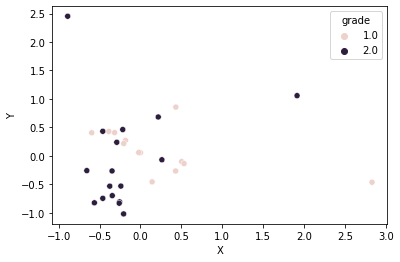

In [658]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

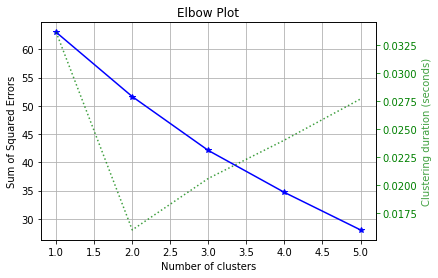

In [659]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X, cluster_ranges=range(1, 6))
plt.show()

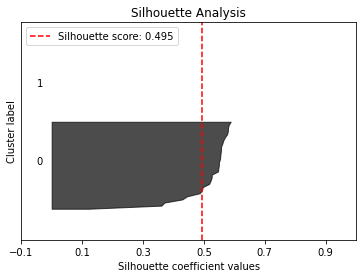

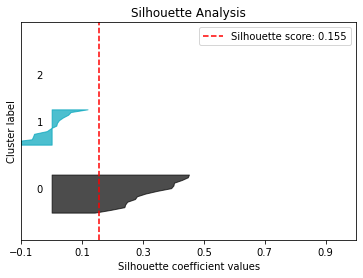

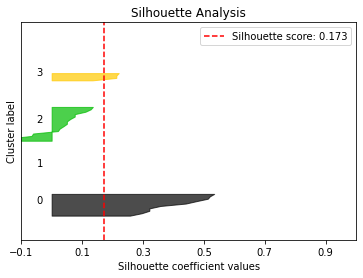

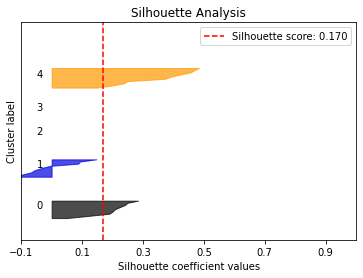

In [660]:
plot_multiple_silhouette(X, 5)
plt.show()

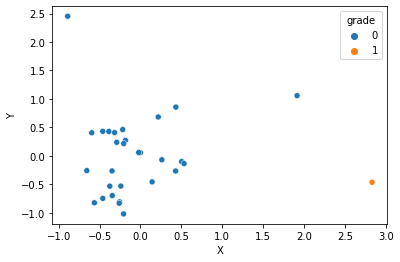

In [661]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices descriptivos y de legibilidad

### Dividiendo el dataset

In [662]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Descriptivos'] + indices['Legibilidad']]
X

DESPC     DESSC     DESWC     DESPL    DESPLd     DESSL    DESSLd  \
34   0.000000  0.000000  0.000000  0.639008  0.000000  0.000000  0.000000   
35   0.088889  0.092108  0.101137  0.255751  0.416796  0.457302  0.451669   
36   0.130736  0.101381  0.048889  0.000000  0.161239  0.162109  0.467725   
37   0.173160  0.161962  0.124786  0.156297  0.286614  0.300823  0.366415   
38   0.088023  0.089841  0.105255  0.240544  0.409003  0.492504  0.437519   
39   0.111400  0.179477  0.252204  0.818270  0.460029  0.605906  0.443862   
40   0.220202  0.260045  0.268837  0.396865  0.480979  0.427740  0.401644   
41   0.118038  0.132495  0.107410  0.339909  1.000000  0.319955  0.366653   
42   0.124964  0.138883  0.120089  0.329000  0.973885  0.345935  0.371565   
43   0.406926  0.335463  0.183634  0.047023  0.183194  0.193919  0.222992   
44   0.455411  0.365753  0.196923  0.026131  0.175531  0.189608  0.208723   
45   0.561905  0.449207  0.209751  0.022436  0.149669  0.155259  0.234850   
46   0.349784  0.344735  0.292248  0.205157  0.398080  0.338403  0.422643   
106  0.133045  0.163404  0.204192  0.443345  0.498354  0.531015  0.450556   
107  0.570563  0.516382  0.450182  0.126024  0.352897  0.350113  0.602035   
108  0.891775  0.731094  0.477250  0.042318  0.244593  0.244774  0.535647   
109  0.824820  0.763651  0.598439  0.146352  0.295418  0.307773  0.356291   
110  0.781530  0.741191  0.744972  0.168480  0.319867  0.414362  0.432984   
111  0.813276  0.812281  0.806763  0.217913  0.365592  0.408657  0.570427   
112  1.000000  1.000000  1.000000  0.219085  0.352087  0.411966  0.535646   
113  0.240115  0.214919  0.143872  0.116602  0.222136  0.252441  0.238427   
114  0.476190  0.566454  0.536381  0.405143  0.594197  0.386285  0.402937   
115  0.451082  0.456831  0.430948  0.231732  0.378843  0.384501  0.453178   
116  0.089177  0.079332  0.068896  0.112317  0.225836  0.346977  0.336511   
117  0.340837  0.282300  0.189625  0.050902  0.152530  0.253656  0.232364   
118  0.018759  0.033794  0.075897  1.000000  0.977886  1.000000  1.000000   
119  0.016739  0.019576  0.029000  0.389590  0.425076  0.630739  0.420454   
120  0.388167  0.377086  0.361278  0.191279  0.419576  0.391518  0.466898   
121  0.235498  0.221306  0.289692  0.160407  0.232121  0.559917  0.508673   
122  0.025974  0.022666  0.011446  0.099971  0.150522  0.170611  0.182295   

      DESWLsy  DESWLsyd   DESWLlt  DESWLltd    RDFHGL  
34   0.674751  0.837669  1.000000  0.495873  1.000000  
35   0.817163  0.742120  0.691878  0.699106  0.539360  
36   0.000000  0.205418  0.000000  0.598801  0.844336  
37   0.425066  0.389740  0.400833  0.613109  0.700593  
38   0.654100  0.584520  0.592828  0.527413  0.505732  
39   0.800505  0.826826  0.651844  0.743344  0.390334  
40   0.748404  0.612066  0.663346  0.615122  0.569764  
41   0.798598  0.661073  0.632345  0.655673  0.677455  
42   0.827522  0.689071  0.646400  0.669674  0.651066  
43   0.719740  0.591316  0.637471  0.531780  0.804828  
44   0.740847  0.649252  0.640539  0.614373  0.808934  
45   0.800658  0.723917  0.671353  0.676609  0.842792  
46   0.886744  0.796765  0.696849  0.788614  0.658006  
106  0.593403  0.648322  0.538359  0.588029  0.467704  
107  0.875369  0.914926  0.659511  0.936859  0.646368  
108  0.820919  0.890168  0.627786  0.922064  0.752704  
109  0.760750  0.822410  0.602440  0.853062  0.690084  
110  0.733405  0.755125  0.590055  0.784870  0.583354  
111  0.731213  0.774038  0.594588  0.777208  0.589105  
112  0.774177  0.802466  0.610578  0.812964  0.585331  
113  0.787975  0.799103  0.639397  0.733933  0.745353  
114  0.673291  0.763611  0.561489  0.675386  0.612176  
115  0.837833  0.959472  0.659535  0.934320  0.612236  
116  0.215122  0.216423  0.251763  0.382829  0.656462  
117  0.640966  0.672394  0.498525  0.635321  0.745679  
118  0.292227  0.000000  0.395896  0.000000  0.000000  
119  0.853366  0.757368  0.690665  0.707694  0.364845  
120  0.888456  1.000000  0.683634  0.983321  0.60465

In [663]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0   0.341872 -0.513562
1   0.235400  0.104501
2   0.640911 -0.633844
3   0.391725 -0.282831
4   0.407766  0.063540
5   0.218352  0.527994
6   0.152092  0.165316
7   0.315887  0.266179
8   0.279481  0.284546
9  -0.028092 -0.417667
10 -0.131239 -0.422202
11 -0.303810 -0.427003
12 -0.184052  0.032430
13  0.344776  0.248359
14 -0.536942  0.101343
15 -0.816180 -0.096598
16 -0.744851 -0.033784
17 -0.691725  0.116286
18 -0.755695  0.220580
19 -1.047099  0.264438
20 -0.010033 -0.289574
21 -0.255492  0.252766
22 -0.420990  0.126557
23  0.700603 -0.390207
24  0.007669 -0.391796
25  1.271349  1.145763
26  0.368042  0.294682
27 -0.374878  0.138592
28 -0.219340  0.189686
29  0.844494 -0.644488

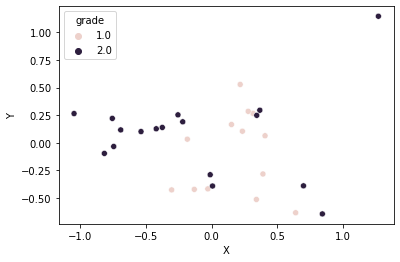

In [664]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

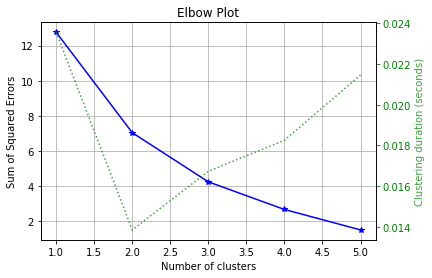

In [665]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

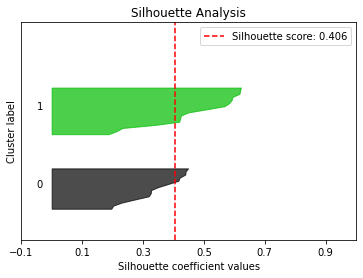

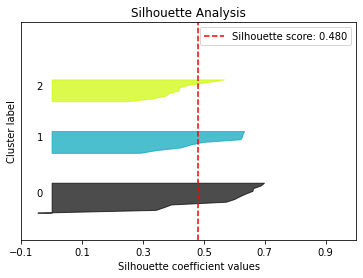

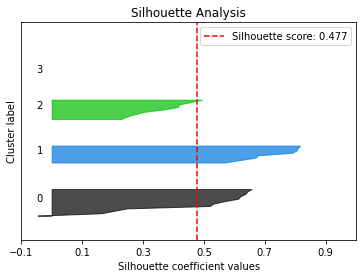

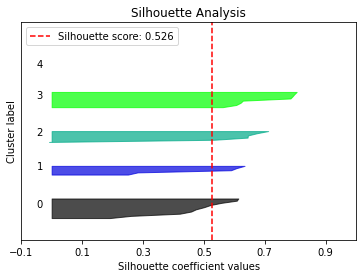

In [666]:
plot_multiple_silhouette(X_two_dim, 5)

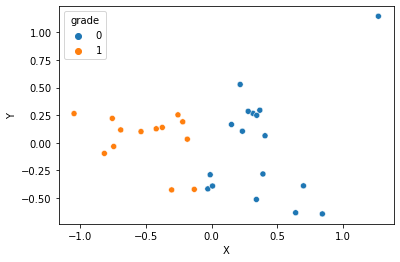

In [667]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de cohesion referencial

### Dividiendo el dataset

In [668]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Cohesion referencial']]
X

CRFNO1    CRFNOa    CRFAO1    CRFAOa    CRFSO1    CRFSOa   CRFCWO1  \
34   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
35   0.636610  0.472046  0.747885  0.549346  0.704525  0.421491  0.536033   
36   0.688515  1.000000  0.722152  0.766034  0.792989  1.000000  0.590463   
37   0.884534  0.673057  0.939435  0.549677  0.943896  0.610516  0.824344   
38   0.565939  0.508433  0.671756  0.479471  0.641199  0.427857  0.548988   
39   0.577197  0.283982  0.709448  0.413886  0.603341  0.285148  0.420705   
40   0.712533  0.640780  0.744037  0.520114  0.757145  0.544452  0.620405   
41   0.686370  0.269923  0.714971  0.290361  0.802384  0.350516  0.903948   
42   0.718147  0.239263  0.713628  0.282853  0.835917  0.378024  0.897002   
43   0.635271  0.175777  0.663717  0.189676  0.630638  0.152328  0.890273   
44   0.481890  0.130796  0.504584  0.136226  0.522874  0.165813  0.759787   
45   0.566782  0.150934  0.622650  0.174209  0.621396  0.191651  0.822747   
46   0.582774  0.156806  0.645991  0.220622  0.650444  0.172198  0.610362   
106  0.815177  0.431616  0.891360  0.580721  0.802738  0.313866  0.592320   
107  0.698733  0.117449  0.726533  0.183491  0.709711  0.131301  0.901667   
108  0.821673  0.168060  0.813789  0.224536  0.829095  0.183789  1.000000   
109  0.701339  0.121512  0.717640  0.203618  0.702490  0.129455  0.683453   
110  0.759825  0.149002  0.808130  0.262382  0.807278  0.155544  0.664692   
111  0.734569  0.112219  0.822936  0.266001  0.792090  0.122168  0.655150   
112  0.749935  0.181218  0.804614  0.315306  0.813150  0.198859  0.629615   
113  0.595703  0.187680  0.715481  0.317887  0.726412  0.222343  0.545458   
114  0.950250  0.361115  0.945470  0.385377  0.906994  0.311102  0.758318   
115  0.603358  0.246113  0.629686  0.264573  0.720877  0.315071  0.601628   
116  0.541088  0.238659  0.714434  0.338879  0.770174  0.285344  0.445668   
117  1.000000  0.866466  1.000000  0.792014  1.000000  0.731341  0.908661   
118  0.604306  0.641905  0.885496  1.000000  0.670741  0.569230  0.414939   
119  0.463829  0.312576  0.512094  0.399571  0.690944  0.485023  0.483124   
120  0.725384  0.329192  0.740507  0.356292  0.786122  0.319427  0.668012   
121  0.789494  0.576149  0.775219  0.465506  0.801415  0.442440  0.626784   
122  0.021787  0.080539  0.133301  0.144009  0.056059  0.098910  0.175272   

     CRFCWO1d   CRFCWOa  CRFCWOad   CRFANP1   CRFANPa  
34   0.000000  0.000000  0.000000  0.000000  0.000000  
35   0.604309  0.284410  0.339972  0.451158  0.370373  
36   0.585943  1.000000  1.000000  0.252982  0.304436  
37   0.624528  0.622985  0.612327  0.338941  0.225540  
38   0.672307  0.326832  0.349052  0.235862  0.205983  
39   0.397642  0.305185  0.355310  0.372107  0.304260  
40   0.565282  0.456327  0.465373  0.236515  0.142032  
41   0.754169  0.391694  0.544822  0.219158  0.087261  
42   0.705502  0.402486  0.533998  0.233635  0.093533  
43   0.851340  0.276708  0.546273  0.300705  0.250172  
44   0.772320  0.406250  0.808459  0.213157  0.143713  
45   0.817731  0.316203  0.565504  0.247978  0.235729  
46   0.650160  0.156065  0.321520  0.183020  0.130969  
106  0.508660  0.308267  0.357950  0.523084  0.531375  
107  0.910349  0.130447  0.295703  0.231074  0.115258  
108  1.000000  0.157049  0.331762  0.239225  0.115560  
109  0.692257  0.111276  0.238140  0.218105  0.143464  
110  0.596358  0.121369  0.246389  0.285986  0.189506  
111  0.595431  0.099594  0.213426  0.326109  0.223856  
112  0.558799  0.181767  0.355611  0.334009  0.208588  
113  0.541579  0.186722  0.313323  0.351771  0.271673  
114  0.604510  0.254995  0.374349  0.359639  0.230357  
115  0.602324  0.247517  0.341746  0.246095  0.142329  
116  0.412795  0.302965  0.512510  0.314610  0.248391  
117  0.645161  0.709223  0.718142  0.463300  0.403168  
118  0.339455  0.517999  0.404247  1.000000  1.000000  
119  0.415402  0.424386  0.556593  0.196213  0.192110  
120  0.584632  0.261215  0.350140  0.325413  0.2142

In [669]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0   1.529526  0.676345
1  -0.182008  0.135464
2  -0.999202  0.721378
3  -0.707601  0.003153
4  -0.053651  0.134716
5   0.127464  0.216350
6  -0.321794  0.160661
7  -0.069353 -0.251873
8  -0.082567 -0.250023
9   0.143125 -0.296547
10  0.305467 -0.029424
11  0.200431 -0.205030
12  0.348170 -0.169744
13 -0.331548  0.031378
14  0.226813 -0.529663
15  0.018769 -0.663830
16  0.304063 -0.344995
17  0.166087 -0.331235
18  0.199631 -0.337948
19  0.081878 -0.221020
20  0.186730 -0.058299
21 -0.265789 -0.315406
22  0.182837 -0.066674
23  0.117548  0.145273
24 -1.119018  0.100237
25 -0.750435  0.689663
26  0.095481  0.340537
27 -0.031577 -0.115952
28 -0.225795 -0.006828
29  0.906317  0.839335

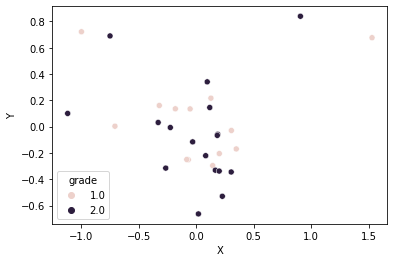

In [670]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

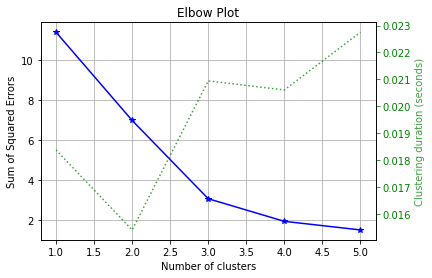

In [671]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

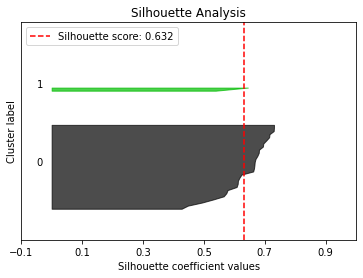

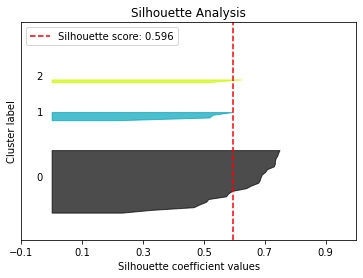

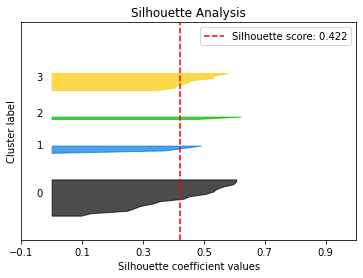

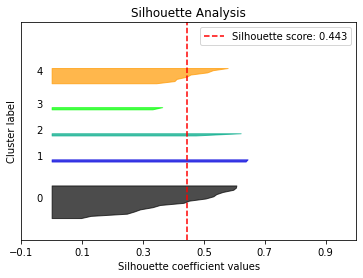

In [672]:
plot_multiple_silhouette(X_two_dim, 5)

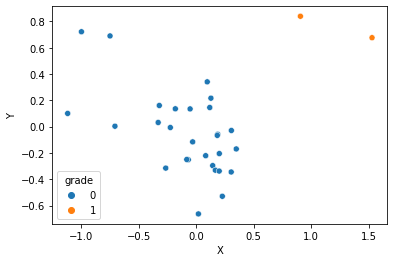

In [673]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de diversidad léxica

### Dividiendo el dataset

In [674]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Diversidad lexica']]
X

LDTTRa   LDTTRcw
34   1.000000  1.000000
35   0.177824  0.304350
36   0.115005  0.157352
37   0.098576  0.164775
38   0.164442  0.292754
39   0.073673  0.153540
40   0.079601  0.128824
41   0.109599  0.184241
42   0.109660  0.191872
43   0.038733  0.074610
44   0.033625  0.057787
45   0.038296  0.077700
46   0.104167  0.180411
106  0.106099  0.211001
107  0.050978  0.089692
108  0.017271  0.032050
109  0.050663  0.096208
110  0.030005  0.067056
111  0.040400  0.084592
112  0.000000  0.000000
113  0.145195  0.271765
114  0.020028  0.036553
115  0.049233  0.086706
116  0.192608  0.332225
117  0.013323  0.024461
118  0.189779  0.390491
119  0.270234  0.413481
120  0.060683  0.106363
121  0.073235  0.130849
122  0.337005  0.493009

In [675]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0   1.184704  0.092831
1   0.115565 -0.036950
2  -0.034932  0.016950
3  -0.040661 -0.000143
4   0.097963 -0.038877
5  -0.065833 -0.010763
6  -0.079924  0.010390
7  -0.018893 -0.005298
8  -0.013257 -0.010443
9  -0.147465  0.017292
10 -0.163273  0.024986
11 -0.145496  0.014870
12 -0.025395 -0.006677
13 -0.001652 -0.026062
14 -0.128080  0.016014
15 -0.193265  0.030497
16 -0.123516  0.011352
17 -0.158938  0.016029
18 -0.139012  0.011726
19 -0.228508  0.039627
20  0.069486 -0.038716
21 -0.188088  0.029456
22 -0.131456  0.016765
23  0.146056 -0.045065
24 -0.201514  0.032762
25  0.186854 -0.086761
26  0.258420 -0.043404
27 -0.109257  0.011793
28 -0.082768  0.004346
29  0.362135 -0.048527

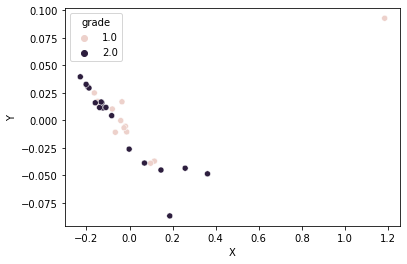

In [676]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

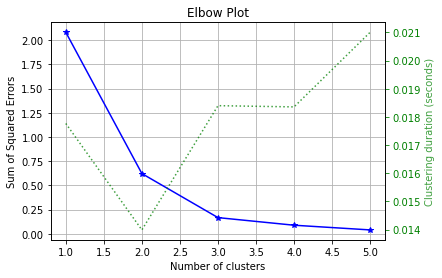

In [677]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

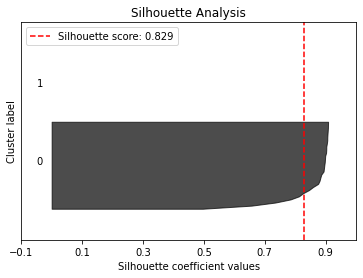

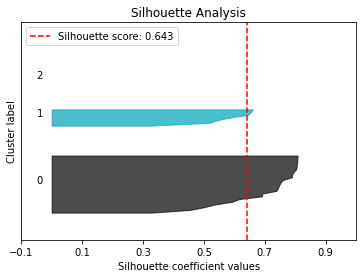

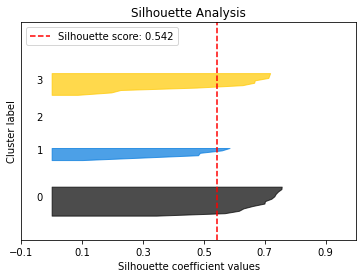

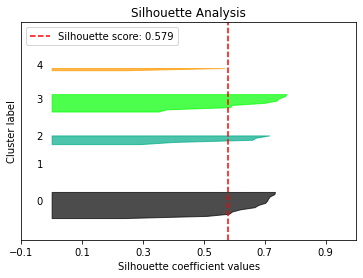

In [678]:
plot_multiple_silhouette(X_two_dim, 5)

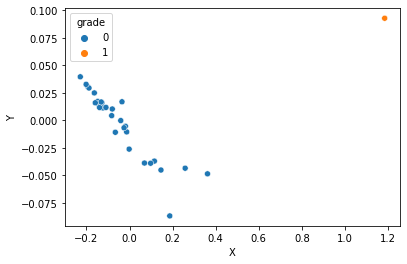

In [679]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de Conectivos

### Dividiendo el dataset

In [680]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Conectivos']]
X

CNCAll   CNCCaus  CNCLogic    CNCADC   CNCTemp    CNCAdd
34   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
35   0.637127  0.602323  0.613702  0.365479  0.583790  0.608001
36   0.599058  0.440628  0.660330  0.053971  0.000000  0.251398
37   0.715938  0.563339  0.704567  0.507853  0.540805  0.887092
38   0.781625  0.498636  0.778240  0.727465  0.881518  0.876345
39   0.689733  0.739744  0.592137  0.785431  0.769483  1.000000
40   0.603054  0.456845  0.595862  0.491231  0.627726  0.526275
41   0.734720  0.558441  0.766929  0.319565  0.235592  0.572513
42   0.746868  0.632191  0.764778  0.395780  0.210730  0.409676
43   0.657749  0.413497  0.725191  0.186960  0.183777  0.301452
44   0.796313  0.357039  0.914194  0.174348  0.299913  0.406056
45   0.779619  0.540805  0.846195  0.188871  0.482702  0.263928
46   0.659905  0.407423  0.710053  0.316321  0.375343  0.378880
106  0.623547  0.647346  0.553863  0.646704  0.661120  0.722964
107  0.726598  0.379060  0.791723  0.352051  0.543597  0.505622
108  0.704637  0.426326  0.785036  0.149439  0.406680  0.180467
109  0.719269  0.490414  0.738715  0.463475  0.648663  0.596259
110  0.649643  0.558844  0.648274  0.379411  0.532412  0.412919
111  0.714832  0.635757  0.703642  0.481326  0.407954  0.556692
112  0.721548  0.629186  0.713352  0.441155  0.565423  0.553715
113  0.553502  0.436517  0.553394  0.330382  0.586366  0.470226
114  0.556828  0.466737  0.546580  0.354578  0.582110  0.516133
115  0.730745  0.461247  0.766525  0.453574  0.352462  0.685215
116  0.630178  0.652759  0.572528  0.536362  0.979138  0.446138
117  0.531746  0.568524  0.506330  0.250693  0.444932  0.389242
118  1.000000  1.000000  1.000000  0.278242  1.000000  0.243010
119  0.583548  0.742193  0.436959  1.000000  0.871270  0.846909
120  0.680983  0.513847  0.699636  0.358247  0.373707  0.595970
121  0.867518  0.488691  0.929859  0.574402  0.407782  0.594570
122  0.491317  0.407535  0.541811  0.000000  0.000000  0.000000

In [681]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0   1.129254  0.696954
1  -0.113553  0.062754
2   0.607855 -0.115257
3  -0.320988  0.079153
4  -0.627390  0.082142
5  -0.678865  0.249705
6  -0.106291  0.146986
7   0.095173 -0.121358
8   0.128707 -0.164108
9   0.395719 -0.126946
10  0.240084 -0.293733
11  0.158313 -0.307588
12  0.185525 -0.050833
13 -0.358644  0.217919
14 -0.011577 -0.088318
15  0.324486 -0.232425
16 -0.197502 -0.013721
17  0.012528 -0.005563
18 -0.086167 -0.034628
19 -0.155722 -0.051100
20  0.050155  0.144292
21  0.008412  0.158943
22 -0.065680 -0.022258
23 -0.351620  0.105965
24  0.184217  0.107674
25 -0.383885 -0.606778
26 -0.721078  0.443740
27  0.020456 -0.012102
28 -0.175927 -0.202567
29  0.814002 -0.046943

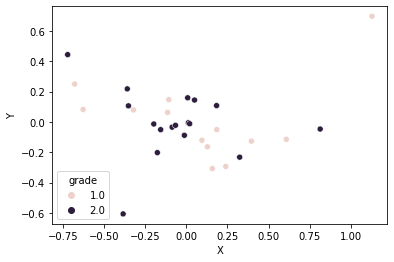

In [682]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

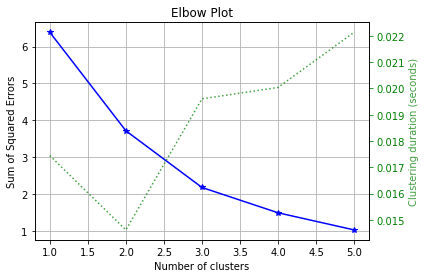

In [683]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

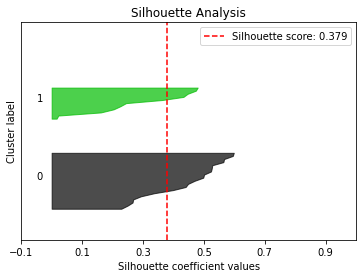

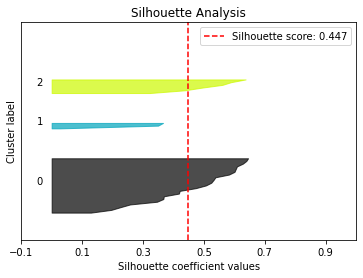

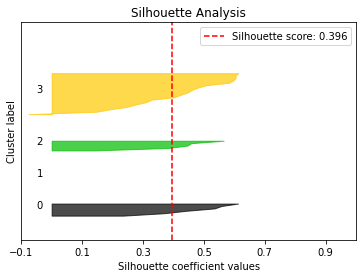

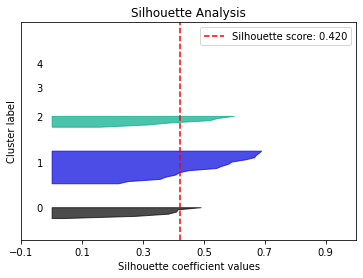

In [684]:
plot_multiple_silhouette(X_two_dim, 5)

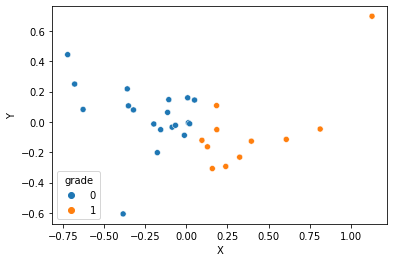

In [685]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de complejidad sintactica

### Dividiendo el dataset

In [686]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Complejidad sintactica']]
X

SYNNP     SYNLE
34   0.000000  0.000000
35   0.549169  0.639702
36   0.256077  0.271448
37   0.431163  0.482425
38   0.546626  0.686857
39   0.669133  0.919770
40   0.579261  0.541324
41   0.390929  0.269018
42   0.412930  0.299232
43   0.181908  0.152995
44   0.209364  0.153207
45   0.200482  0.118647
46   0.429308  0.439800
106  0.478992  0.641377
107  0.427279  0.321075
108  0.490927  0.238195
109  0.499651  0.404704
110  0.503121  0.519943
111  0.506362  0.531304
112  0.510183  0.498865
113  0.403887  0.430806
114  0.444123  0.461721
115  0.614056  0.501007
116  0.298937  0.184487
117  0.494053  0.434516
118  0.394286  0.999869
119  0.564632  1.000000
120  0.719411  0.516261
121  1.000000  0.906618
122  0.082514  0.176826

In [687]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.628119  0.107258
1   0.209888  0.014796
2  -0.259520  0.048996
3   0.013455  0.023483
4   0.247385  0.043502
5   0.508804  0.073775
6   0.145644 -0.065557
7  -0.185439 -0.063711
8  -0.148080 -0.064827
9  -0.399165  0.043396
10 -0.383498  0.020848
11 -0.417044  0.008681
12 -0.022783  0.000963
13  0.171676  0.073680
14 -0.121950 -0.064350
15 -0.154465 -0.163662
16 -0.012069 -0.076914
17  0.085032 -0.014758
18  0.096241 -0.011024
19  0.071613 -0.032482
20 -0.044552  0.016877
21  0.003674  0.001101
22  0.131991 -0.117032
23 -0.307134 -0.035456
24  0.009385 -0.055472
25  0.419858  0.345888
26  0.516081  0.205321
27  0.204029 -0.195408
28  0.684632 -0.206815
29 -0.435572  0.138904

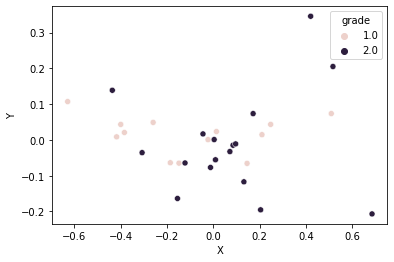

In [688]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

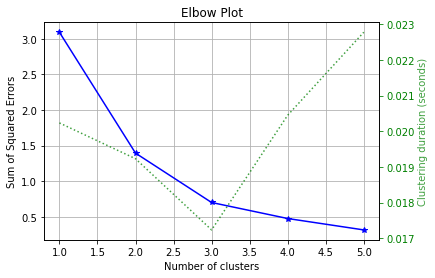

In [689]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

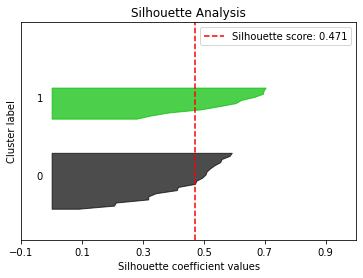

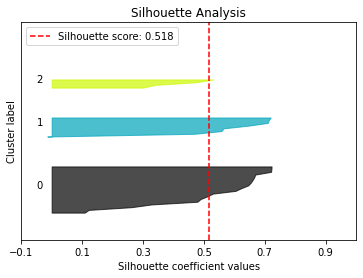

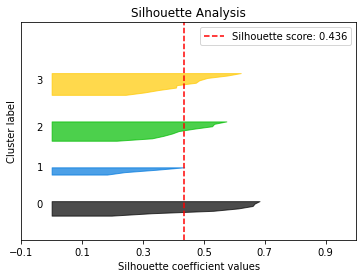

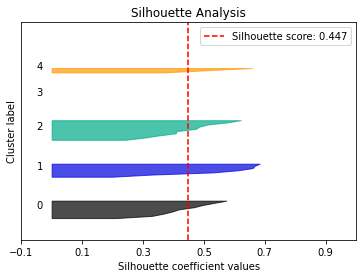

In [690]:
plot_multiple_silhouette(X_two_dim, 5)

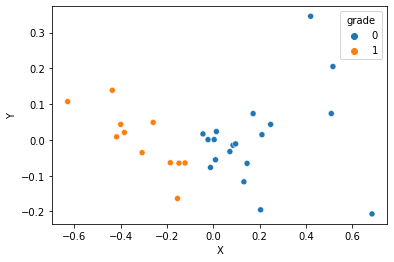

In [691]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de densidad de patrones sintacticos

### Dividiendo el dataset

In [692]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Densidad de patrones sintacticos']]
X

DRNP      DRVP     DRNEG
34   1.000000  0.000000  0.000000
35   0.082918  0.301626  0.209189
36   0.017964  0.191873  0.084616
37   0.119295  0.278342  0.129015
38   0.038009  0.363406  0.161682
39   0.035416  0.411396  0.220739
40   0.107548  0.225282  0.193393
41   0.131759  0.297129  0.068515
42   0.121308  0.291178  0.068945
43   0.291428  0.258195  0.192905
44   0.257985  0.227665  0.184564
45   0.287008  0.926604  0.146959
46   0.130839  0.275515  0.124375
106  0.106533  0.256349  0.141946
107  0.153127  0.287341  0.161495
108  0.129590  0.829371  0.110878
109  0.153720  0.209885  0.093040
110  0.113475  0.234156  0.101302
111  0.114732  0.259293  0.122633
112  0.127893  0.243469  0.125627
113  0.167966  0.342574  0.079934
114  0.125993  0.336149  0.118387
115  0.086475  0.169421  0.057658
116  0.227037  0.207707  0.146825
117  0.157629  0.186912  0.101898
118  0.072030  0.367850  0.357464
119  0.041919  0.234313  0.063345
120  0.071573  0.225480  0.086605
121  0.000000  0.235808  0.114355
122  0.302809  1.000000  1.000000

In [693]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.397184  0.822966
1   0.015201 -0.069416
2  -0.142468 -0.146206
3  -0.051267 -0.042155
4   0.041232 -0.120780
5   0.114324 -0.117446
6  -0.057726 -0.045262
7  -0.070804 -0.037196
8  -0.074928 -0.047404
9  -0.040138  0.136613
10 -0.068290  0.103047
11  0.483204  0.113451
12 -0.056801 -0.031175
13 -0.061360 -0.052882
14 -0.027121 -0.004960
15  0.390682 -0.045111
16 -0.129660 -0.010782
17 -0.103018 -0.050271
18 -0.070315 -0.047046
19 -0.082274 -0.033311
20 -0.028787 -0.000826
21 -0.010138 -0.037901
22 -0.179641 -0.080861
23 -0.104572  0.068325
24 -0.143702 -0.005408
25  0.154346 -0.064304
26 -0.120869 -0.125747
27 -0.116400 -0.093416
28 -0.088585 -0.161467
29  1.027062  0.226932

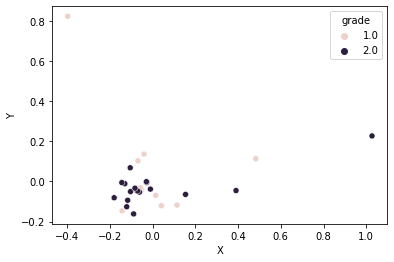

In [694]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

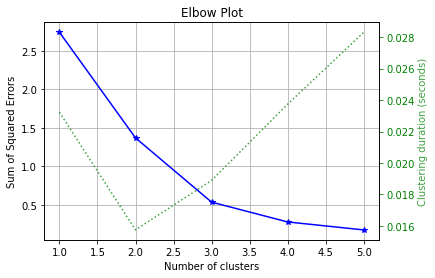

In [695]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

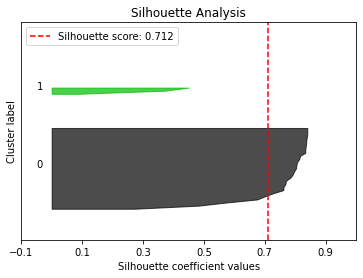

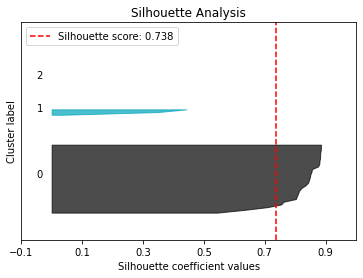

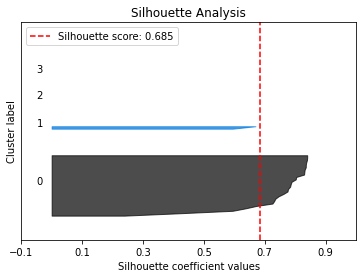

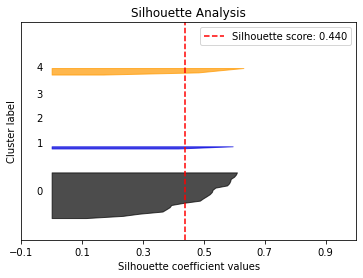

In [696]:
plot_multiple_silhouette(X_two_dim, 5)

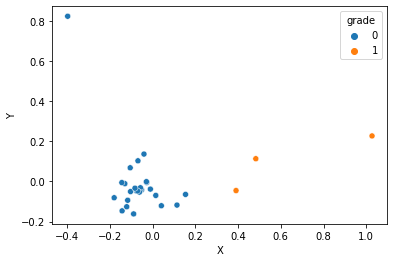

In [697]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de información de palabras

### Dividiendo el dataset

In [698]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Informacion de palabras']]
X

WRDNOUN   WRDVERB    WRDADJ    WRDADV    WRDPRO  WRDPRP1s  WRDPRP1p  \
34   1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
35   0.144684  0.549760  0.753418  0.461900  0.473856  0.000000  0.010008   
36   0.267761  0.397643  0.302947  0.244703  0.395781  0.058761  0.103452   
37   0.169191  0.508740  0.621212  0.477365  0.393313  0.011519  0.186578   
38   0.119674  0.594113  0.669135  0.662988  0.451687  0.000000  0.028850   
39   0.053189  0.594143  0.781344  0.793288  0.561905  0.216634  0.232852   
40   0.150540  0.507572  0.785718  0.510631  0.395182  0.032090  0.082860   
41   0.135928  0.630592  0.611757  0.334360  0.499742  0.147199  0.282711   
42   0.129190  0.621762  0.619284  0.320959  0.501283  0.107726  0.295022   
43   0.078726  0.761445  0.434345  0.410317  0.787316  0.219210  0.374904   
44   0.103893  0.699675  0.481655  0.379670  0.691357  0.131414  0.323906   
45   0.097671  0.681310  0.453458  0.335570  0.740508  0.185069  0.323410   
46   0.175491  0.530002  0.654102  0.363794  0.395685  0.083638  0.093547   
106  0.116981  0.433261  0.685529  0.570692  0.570028  0.007041  0.039667   
107  0.148669  0.537488  0.666863  0.435382  0.418774  0.130959  0.042738   
108  0.142049  0.486535  0.728296  0.353770  0.405876  0.141610  0.044558   
109  0.144891  0.442000  0.799428  0.411489  0.404133  0.064878  0.047381   
110  0.127692  0.496798  0.708776  0.389767  0.424797  0.036676  0.091076   
111  0.130429  0.491275  0.726872  0.421834  0.441950  0.098035  0.061507   
112  0.133973  0.478769  0.769868  0.426210  0.419464  0.030199  0.094181   
113  0.129738  0.531068  0.676509  0.385648  0.523731  0.000000  0.028146   
114  0.156890  0.439516  0.665875  0.508106  0.388669  0.000000  0.007552   
115  0.168241  0.399303  0.771217  0.332128  0.379609  0.003337  0.075192   
116  0.134609  0.453685  0.551891  0.809201  0.586927  0.145991  0.279054   
117  0.120821  0.453240  0.781760  0.381957  0.390327  0.000000  0.010678   
118  0.000000  0.590309  0.570128  1.000000  1.000000  0.075734  1.000000   
119  0.191565  0.401331  0.695430  0.623293  0.270622  0.000000  0.000000   
120  0.158847  0.393421  0.884687  0.320975  0.341326  0.003980  0.053253   
121  0.131315  0.462609  1.000000  0.346839  0.253540  0.000000  0.024467   
122  0.065730  1.000000  0.307966  0.939525  0.816922  1.000000  0.176055   

     WRDPRP2s  WRDPRP2p  WRDPRP3s  WRDPRP3p  
34   0.000000  0.000000  0.000000  0.000000  
35   0.382725  0.000000  0.562941  0.165384  
36   0.197813  0.352186  0.568985  0.157808  
37   0.387783  0.000000  0.314343  0.144367  
38   0.643583  0.654764  0.564973  0.330060  
39   0.671702  0.068337  0.617259  0.199033  
40   0.072017  0.192330  0.338972  0.086179  
41   0.495531  0.160408  0.671438  0.071876  
42   0.402943  0.286960  0.642728  0.085721  
43   0.237198  0.187692  0.992394  0.147177  
44   0.221196  0.087515  0.996139  0.274496  
45   0.207672  0.164329  0.923167  0.128857  
46   0.579683  0.000000  0.415764  0.066064  
106  0.426649  0.168801  0.371880  0.258425  
107  1.000000  0.076576  0.539848  0.120093  
108  0.831718  0.036117  0.493320  0.097100  
109  0.469167  0.057607  0.372276  0.137668  
110  0.558839  0.208247  0.506358  0.105407  
111  0.732056  0.128199  0.502097  0.106908  
112  0.474420  0.000000  0.505083  0.097837  
113  0.033636  0.119772  0.782798  0.304115  
114  0.126348  0.257087  0.401184  0.033599  
115  0.336976  0.839935  0.340714  0.173244  
116  0.561671  1.000000  0.330459  0.429410  
117  0.076569  0.000000  0.707442  0.047510  
118  0.191213  0.000000  1.000000  1.000000  
119  0.000000  0.000000  0.392072  0.088604  
120  0.522533  0.858756  0.287287  0.046318  
121  0.334170  0.000000  0.471862  0.048875  
122  0.000000  0.000000  0.880276  0.111899

In [699]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -1.035221  0.885860
1  -0.043394  0.063336
2  -0.173700  0.208331
3  -0.145884  0.091073
4  -0.001521 -0.529158
5   0.278481 -0.237389
6  -0.169233  0.109202
7   0.095121  0.000698
8   0.068439 -0.031990
9   0.562583  0.173763
10  0.492218  0.222421
11  0.424867  0.217354
12 -0.185615  0.020203
13 -0.068873 -0.105828
14 -0.120044 -0.292294
15 -0.177976 -0.172679
16 -0.214084 -0.030453
17 -0.144109 -0.132428
18 -0.133497 -0.193229
19 -0.117549  0.018359
20  0.127375  0.235781
21 -0.219376  0.096872
22 -0.354629 -0.406901
23  0.073645 -0.706889
24 -0.066223  0.286090
25  1.270424 -0.030549
26 -0.205357  0.304741
27 -0.470302 -0.552326
28 -0.285144  0.050252
29  0.938578  0.437779

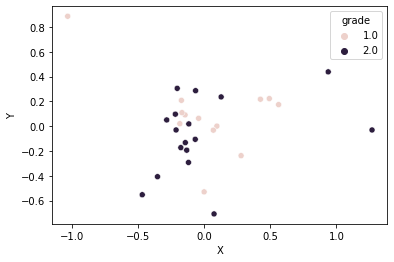

In [700]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

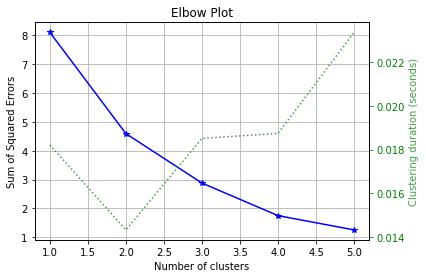

In [701]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

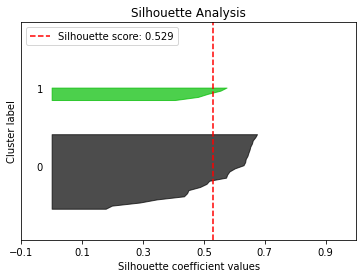

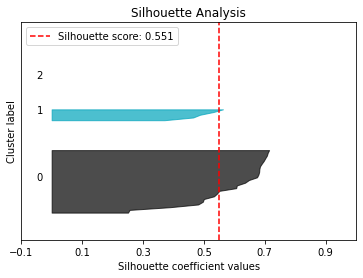

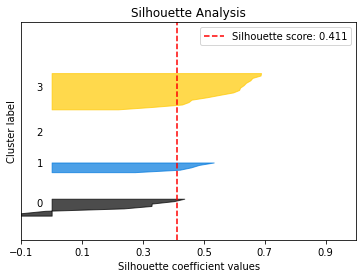

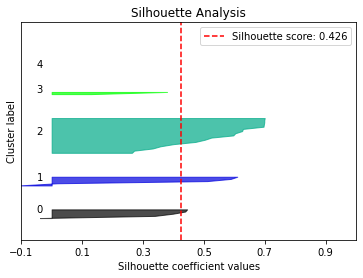

In [702]:
plot_multiple_silhouette(X_two_dim, 5)

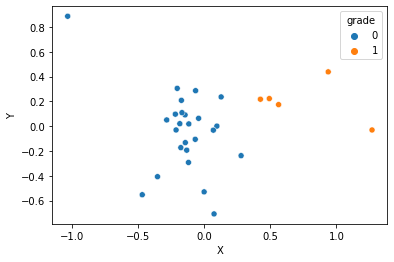

In [703]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Historia, Geografía y Economía

## Obteniendo los datos

In [704]:
ot_da = ObtainedTextDA()
texts = ot_da.select_all_as_dataframe().drop(columns=['cluster_grade'])
texts = texts[texts['category'] == 'Historia, Geografía y Economía']
texts.head()

CNCADC    CNCAdd     CNCAll    CNCCaus   CNCLogic   CNCTemp   CRFANP1  \
0  3.197442  1.065814  50.892619  15.454303  30.109246  1.065814  0.099526   
1  2.828854  0.848656  49.504950  11.598303  33.663366  0.565771  0.159722   
2  3.475239  1.737619  58.210252  11.294526  40.834057  0.868810  0.026316   
3  3.530450  2.647838  63.548102  10.591350  44.130627  2.647838  0.035714   
4  3.479990  2.485707  49.714144  13.174248  30.325628  0.248571  0.151515   

    CRFANPa    CRFAO1    CRFAOa  ...  WRDPRP1s  WRDPRP2p  WRDPRP2s  WRDPRP3p  \
0  0.079630  0.236967  0.148887  ...  0.000000       0.0  0.000000  2.398082   
1  0.119540  0.291667  0.197797  ...  0.565771       0.0  0.848656  2.545969   
2  0.019822  0.197368  0.150034  ...  0.000000       0.0  5.212858  1.737619   
3  0.039216  0.166667  0.142577  ...  0.000000       0.0  9.708738  0.000000   
4  0.171011  0.430303  0.273384  ...  0.000000       0.0  0.000000  1.739995   

    WRDPRP3s     WRDVERB                        category  \
0  10.125233  110.578204  Historia, Geografía y Economía   
1   8.769448   94.766620  Historia, Geografía y Economía   
2   9.556907  149.435274  Historia, Geografía y Economía   
3   9.708738  151.809356  Historia, Geografía y Economía   
4  10.688541   93.711161  Historia, Geografía y Economía   

                     filename  grade   id  
0               atahualpa.txt    1.0  1.0  
1         avelino_caceres.txt    1.0  2.0  
2  cartilla_fenomeno_nino.txt    1.0  3.0  
3   cartilla_inundaciones.txt    1.0  4.0  
4          enrique_meiggs.txt    1.0  5.0  

[5 rows x 52 columns]

## Normalizando datos

In [705]:
columns = [c for c in texts.columns if c not in ['category', 'filename', 'grade', 'id']]
texts[columns] = MinMaxScaler().fit_transform(texts[columns])
texts

CNCADC    CNCAdd    CNCAll   CNCCaus  CNCLogic   CNCTemp   CRFANP1  \
0    0.327205  0.155964  0.701894  0.793549  0.498308  0.352784  0.532464   
1    0.289486  0.124187  0.682756  0.595551  0.557129  0.187270  0.854514   
2    0.355633  0.254272  0.802816  0.579952  0.675804  0.287576  0.140789   
3    0.361283  0.387467  0.876434  0.543846  0.730362  0.876434  0.191071   
4    0.356119  0.363742  0.685641  0.676473  0.501889  0.082277  0.810606   
5    0.299220  0.388977  0.700215  0.586913  0.510314  0.967836  0.496392   
6    0.400634  0.286447  0.779059  0.603082  0.615534  0.555369  0.527465   
7    0.499829  0.489032  0.712629  0.594001  0.510540  0.340360  0.404360   
8    0.242439  0.312011  0.640409  0.523091  0.517555  0.156835  0.486364   
9    0.304693  0.248972  0.897544  0.808116  0.739154  0.000000  0.402688   
10   0.143224  0.102403  0.791404  0.592893  0.706473  0.347446  0.372174   
11   0.332972  0.000000  0.628254  0.612613  0.502603  0.000000  0.348913   
12   0.361474  0.310138  0.628444  0.417169  0.526139  0.000000  0.458571   
13   0.097229  0.278068  0.635530  0.561048  0.518907  0.314489  0.472059   
14   0.265505  0.162713  0.715654  0.704181  0.558210  0.245367  0.812054   
15   0.332323  0.411850  0.749450  0.611419  0.587616  0.286642  0.852473   
16   0.538799  0.275166  0.700216  0.617954  0.510380  0.248966  0.360096   
17   0.237783  0.123645  0.760377  0.705033  0.625782  0.139839  0.806164   
18   0.394240  0.241607  0.774216  0.621716  0.614818  0.455421  0.546505   
19   0.322310  0.288058  0.722162  0.586258  0.566870  0.521260  0.604783   
20   0.095509  0.111743  0.850716  0.313683  0.870609  0.421263  0.419397   
21   0.094396  0.085898  0.831548  0.387533  0.835480  0.249811  0.358178   
22   0.102487  0.087932  0.864655  0.462827  0.846975  0.298348  0.324547   
23   0.206895  0.121375  0.817919  0.543028  0.748997  0.205910  0.495490   
24   0.554152  0.792419  0.796631  0.741489  0.537726  0.000000  0.243182   
25   0.266216  0.190340  0.717569  0.707973  0.551093  0.344433  0.320359   
26   0.243402  0.099445  0.674822  0.540874  0.562351  0.449881  0.850000   
27   0.428651  0.245183  0.862701  0.559223  0.744080  0.277297  0.668750   
28   0.341111  0.162593  0.755988  0.570534  0.649741  0.000000  0.348913   
29   0.451928  0.323121  0.768953  0.807850  0.543596  0.182722  0.927333   
30   0.436966  0.327301  0.633777  0.448957  0.498048  0.201911  0.711697   
31   0.294787  0.180658  0.584585  0.507142  0.456317  0.272428  0.362712   
32   0.241281  0.172512  0.768236  0.696143  0.614589  0.487769  0.361486   
33   0.336422  0.174935  0.803758  0.675229  0.667738  0.098924  0.839216   
86   0.276079  0.394784  0.632531  0.554116  0.461376  0.595324  0.082308   
87   0.341491  0.271289  0.628986  0.514052  0.484779  0.368187  0.501563   
88   0.266493  0.000000  0.538737  0.267438  0.517187  0.000000  0.000000   
89   0.290111  0.144295  0.868673  1.000000  0.628300  0.571182  1.000000   
90   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
91   0.350457  0.000000  0.425086  0.351699  0.340068  0.000000  0.465217   
92   0.378503  0.319827  0.707206  0.725158  0.506406  0.222596  0.622629   
93   0.518965  0.371051  0.747504  0.585905  0.577021  0.104913  0.578378   
94   0.314056  0.215796  0.692607  0.523918  0.564639  0.448545  0.580995   
95   0.298348  0.426628  0.924806  0.898218  0.723761  0.000000  0.668750   
96   0.699317  1.000000  0.471241  0.233932  0.263895  0.000000  0.501563   
97   0.618328  0.442095  1.000000  0.155130  1.000000  0.000000  0.137179   
98   0.171413  0.245114  0.762353  0.860102  0.554439  0.554439  0.648485   
99   0.110750  0.158369  0.597042  0.722430  0.447781  0.000000  0.159701   
100  0.357309  0.306564  0.871610  0.806796  0.693436  0.000000  0.321000   
101  0.515348  0.456195  0.757384  0.640312  0.547698  0.396882  0.590798   
102  0.501634  0.358660  0.743668  0.503413  0.600343  0.162255  0.408051   
103

## Todos los índices

### Dividiendo el dataset

In [706]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X

CNCADC    CNCAdd    CNCAll   CNCCaus  CNCLogic   CNCTemp   CRFANP1  \
0    0.327205  0.155964  0.701894  0.793549  0.498308  0.352784  0.532464   
1    0.289486  0.124187  0.682756  0.595551  0.557129  0.187270  0.854514   
2    0.355633  0.254272  0.802816  0.579952  0.675804  0.287576  0.140789   
3    0.361283  0.387467  0.876434  0.543846  0.730362  0.876434  0.191071   
4    0.356119  0.363742  0.685641  0.676473  0.501889  0.082277  0.810606   
5    0.299220  0.388977  0.700215  0.586913  0.510314  0.967836  0.496392   
6    0.400634  0.286447  0.779059  0.603082  0.615534  0.555369  0.527465   
7    0.499829  0.489032  0.712629  0.594001  0.510540  0.340360  0.404360   
8    0.242439  0.312011  0.640409  0.523091  0.517555  0.156835  0.486364   
9    0.304693  0.248972  0.897544  0.808116  0.739154  0.000000  0.402688   
10   0.143224  0.102403  0.791404  0.592893  0.706473  0.347446  0.372174   
11   0.332972  0.000000  0.628254  0.612613  0.502603  0.000000  0.348913   
12   0.361474  0.310138  0.628444  0.417169  0.526139  0.000000  0.458571   
13   0.097229  0.278068  0.635530  0.561048  0.518907  0.314489  0.472059   
14   0.265505  0.162713  0.715654  0.704181  0.558210  0.245367  0.812054   
15   0.332323  0.411850  0.749450  0.611419  0.587616  0.286642  0.852473   
16   0.538799  0.275166  0.700216  0.617954  0.510380  0.248966  0.360096   
17   0.237783  0.123645  0.760377  0.705033  0.625782  0.139839  0.806164   
18   0.394240  0.241607  0.774216  0.621716  0.614818  0.455421  0.546505   
19   0.322310  0.288058  0.722162  0.586258  0.566870  0.521260  0.604783   
20   0.095509  0.111743  0.850716  0.313683  0.870609  0.421263  0.419397   
21   0.094396  0.085898  0.831548  0.387533  0.835480  0.249811  0.358178   
22   0.102487  0.087932  0.864655  0.462827  0.846975  0.298348  0.324547   
23   0.206895  0.121375  0.817919  0.543028  0.748997  0.205910  0.495490   
24   0.554152  0.792419  0.796631  0.741489  0.537726  0.000000  0.243182   
25   0.266216  0.190340  0.717569  0.707973  0.551093  0.344433  0.320359   
26   0.243402  0.099445  0.674822  0.540874  0.562351  0.449881  0.850000   
27   0.428651  0.245183  0.862701  0.559223  0.744080  0.277297  0.668750   
28   0.341111  0.162593  0.755988  0.570534  0.649741  0.000000  0.348913   
29   0.451928  0.323121  0.768953  0.807850  0.543596  0.182722  0.927333   
30   0.436966  0.327301  0.633777  0.448957  0.498048  0.201911  0.711697   
31   0.294787  0.180658  0.584585  0.507142  0.456317  0.272428  0.362712   
32   0.241281  0.172512  0.768236  0.696143  0.614589  0.487769  0.361486   
33   0.336422  0.174935  0.803758  0.675229  0.667738  0.098924  0.839216   
86   0.276079  0.394784  0.632531  0.554116  0.461376  0.595324  0.082308   
87   0.341491  0.271289  0.628986  0.514052  0.484779  0.368187  0.501563   
88   0.266493  0.000000  0.538737  0.267438  0.517187  0.000000  0.000000   
89   0.290111  0.144295  0.868673  1.000000  0.628300  0.571182  1.000000   
90   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
91   0.350457  0.000000  0.425086  0.351699  0.340068  0.000000  0.465217   
92   0.378503  0.319827  0.707206  0.725158  0.506406  0.222596  0.622629   
93   0.518965  0.371051  0.747504  0.585905  0.577021  0.104913  0.578378   
94   0.314056  0.215796  0.692607  0.523918  0.564639  0.448545  0.580995   
95   0.298348  0.426628  0.924806  0.898218  0.723761  0.000000  0.668750   
96   0.699317  1.000000  0.471241  0.233932  0.263895  0.000000  0.501563   
97   0.618328  0.442095  1.000000  0.155130  1.000000  0.000000  0.137179   
98   0.171413  0.245114  0.762353  0.860102  0.554439  0.554439  0.648485   
99   0.110750  0.158369  0.597042  0.722430  0.447781  0.000000  0.159701   
100  0.357309  0.306564  0.871610  0.806796  0.693436  0.000000  0.321000   
101  0.515348  0.456195  0.757384  0.640312  0.547698  0.396882  0.590798   
102  0.501634  0.358660  0.743668  0.503413  0.600343  0.162255  0.408051   
103

In [707]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.099168 -0.242531
1  -0.153371 -0.373213
2   0.443373  0.299926
3   0.721660  0.091812
4  -0.331265 -0.580356
5   0.431206 -0.150726
6  -0.283644 -0.311130
7  -0.002277 -0.241026
8  -0.112135 -0.263713
9  -0.098832 -0.236510
10 -0.120703 -0.028449
11 -0.287248  0.195927
12 -0.156377  0.044816
13 -0.195097  0.020660
14 -0.092113 -0.496298
15 -0.191984 -0.586716
16 -0.403845 -0.030778
17 -0.043766 -0.554505
18  0.208461 -0.370426
19  0.151696 -0.120930
20  1.720041  0.152266
21  2.084554  0.199537
22  1.921851  0.225538
23  1.975688  0.018727
24 -0.243305 -0.066158
25 -0.187528 -0.210955
26 -0.372955 -0.290298
27 -0.088403 -0.561393
28 -0.399099 -0.216642
29 -0.399177 -0.290891
30 -0.068411 -0.294534
31 -0.417971  0.078024
32 -0.186185 -0.127541
33  0.149180 -0.556011
34 -0.120316  0.393321
35 -0.470418 -0.223895
36 -0.280436  0.506182
37 -0.055805 -1.095198
38  0.320020  2.499397
39 -0.307376  0.924016
40 -0.352504 -0.461644
41 -0.501515 -0.271211
42  0.825557 -0.407748
43 -0.519627  0.265636
44 -0.904422  0.950159
45  0.031200  1.157320
46 -1.387980 -0.110408
47 -0.640641  0.615936
48  0.010044  0.062281
49  0.109017 -0.673248
50  0.733210 -0.357845
51 -0.334539  0.662453
52 -0.464214  0.359676
53 -0.562107  1.079317

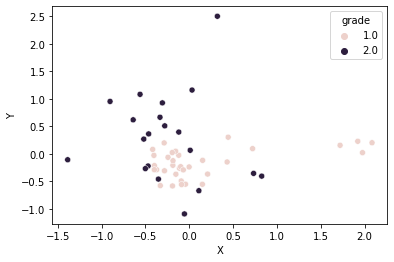

In [708]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

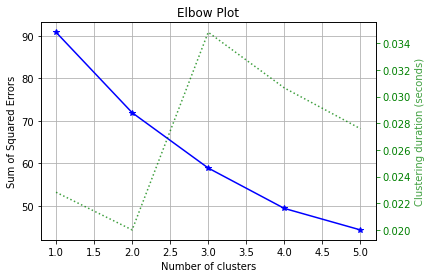

In [709]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X, cluster_ranges=range(1, 6))
plt.show()

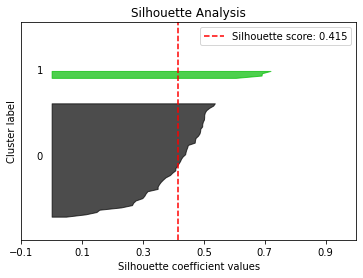

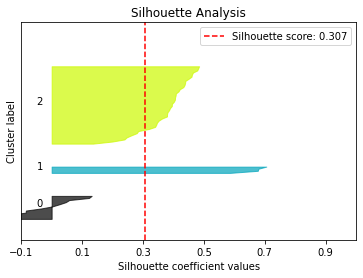

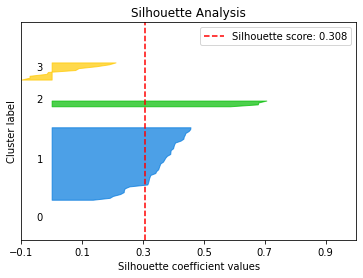

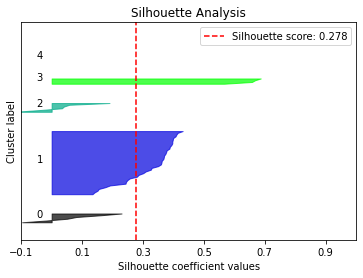

In [710]:
plot_multiple_silhouette(X, 5)
plt.show()

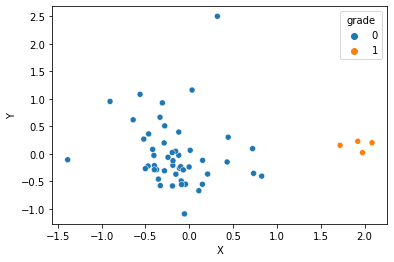

In [711]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices descriptivos y de legibilidad

### Dividiendo el dataset

In [712]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Descriptivos'] + indices['Legibilidad']]
X

DESPC     DESSC     DESWC     DESPL    DESPLd     DESSL    DESSLd  \
0    0.015676  0.073415  0.149480  1.000000  0.925982  0.512025  0.425867   
1    0.020780  0.052717  0.140790  0.437031  0.449409  0.705809  0.689892   
2    0.017499  0.030078  0.045761  0.219610  0.159200  0.351658  0.402858   
3    0.019322  0.033959  0.045043  0.230274  0.175553  0.292470  0.363729   
4    0.029530  0.059508  0.160242  0.300371  0.409271  0.713077  0.680554   
5    0.031717  0.070828  0.149839  0.358696  0.229317  0.536350  0.520060   
6    0.020416  0.051423  0.142424  0.432113  0.424957  0.736055  0.677383   
7    0.036456  0.065653  0.154941  0.243866  0.263882  0.611235  0.637535   
8    0.037186  0.066624  0.168135  0.241452  0.324583  0.661548  0.830564   
9    0.021145  0.037193  0.093594  0.231024  0.237583  0.656829  0.802190   
10   0.021874  0.043661  0.113804  0.294013  0.341127  0.685261  0.746714   
11   0.010937  0.015847  0.036633  0.146564  0.132029  0.587322  0.515566   
12   0.022603  0.049806  0.112728  0.349206  0.499615  0.580647  0.621470   
13   0.012395  0.036223  0.083788  0.532919  0.575027  0.594486  0.527154   
14   0.014947  0.043014  0.107426  0.523810  0.544654  0.651773  0.592409   
15   0.032811  0.067270  0.184000  0.310081  0.285685  0.726563  0.750955   
16   0.018593  0.040750  0.105872  0.344900  0.422318  0.682306  0.711463   
17   0.021145  0.076649  0.188584  0.725497  0.837828  0.642507  0.555834   
18   0.019686  0.065653  0.144736  0.647826  0.526669  0.563499  0.673105   
19   0.022603  0.045602  0.101128  0.299862  0.382295  0.566299  0.440141   
20   0.565075  0.546248  0.469685  0.021431  0.051319  0.151166  0.264026   
21   0.760117  0.741591  0.475226  0.023844  0.052158  0.083623  0.254287   
22   1.000000  1.000000  0.795910  0.030414  0.066763  0.131482  0.299204   
23   0.819905  0.862872  0.768805  0.044531  0.092218  0.160807  0.324051   
24   0.003281  0.007439  0.021964  0.334783  0.367594  0.763950  0.771021   
25   0.025520  0.061125  0.153107  0.400796  0.620525  0.655472  0.833530   
26   0.016770  0.039457  0.117192  0.386679  0.428578  0.796036  0.790176   
27   0.017135  0.052717  0.142624  0.577899  0.601140  0.716478  0.778844   
28   0.021145  0.036223  0.107506  0.218865  0.313478  0.794779  0.853534   
29   0.025155  0.056921  0.144298  0.365528  0.388850  0.664501  0.673099   
30   0.037550  0.079884  0.195918  0.331104  0.330382  0.640221  0.591199   
31   0.019322  0.043014  0.096743  0.354267  0.349747  0.575695  0.461764   
32   0.022238  0.057891  0.135130  0.455119  0.444495  0.602918  0.616641   
33   0.022968  0.056274  0.133256  0.414742  0.429599  0.613189  0.625764   
86   0.009843  0.021345  0.044206  0.333075  0.340955  0.517217  0.590511   
87   0.017135  0.036223  0.107386  0.323822  0.293726  0.793770  0.957897   
88   0.003646  0.007762  0.015187  0.304348  0.146345  0.470162  0.386642   
89   0.041925  0.089263  0.323275  0.331897  0.300112  1.000000  1.000000   
90   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
91   0.003646  0.007439  0.011520  0.282609  0.156450  0.348691  0.238856   
92   0.021874  0.079560  0.236975  0.729152  0.857128  0.801899  0.863640   
93   0.018957  0.038810  0.125643  0.306809  0.414081  0.877726  0.770052   
94   0.218374  0.437257  1.000000  0.300109  0.311364  0.591277  0.725139   
95   0.004010  0.007762  0.013553  0.259058  0.115484  0.407778  0.483589   
96   0.005104  0.010349  0.017380  0.286957  0.177391  0.391917  0.359159   
97   0.004739  0.012613  0.013075  0.444099  0.112914  0.200656  0.342662   
98   0.005833  0.010673  0.023678  0.239130  0.138039  0.553803  0.422720   
99   0.012395  0.021992  0.036712  0.232298  0.152050  0.395275  0.448807   
100  0.021874  0.054334  0.114043  0.423378  0.544207  0.530520  0.477318   
101  0.028801  0.059185  0.166102  0.310870  0.435183  0.747963  0.854796   
102  0.015312  0.043014  0.081197  0.506067  1.000000  0.464984  0.516538   
103 

In [713]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.285921 -0.085317
1  -0.280981  0.025281
2   0.251909 -0.199381
3   0.255311 -0.132689
4  -0.261399  0.098394
5   0.013244 -0.031142
6  -0.288917  0.020224
7  -0.107665  0.076142
8  -0.267586  0.190088
9  -0.228309  0.084070
10 -0.239381  0.042327
11 -0.054257 -0.003664
12 -0.155128 -0.011614
13 -0.281767  0.044540
14 -0.303680  0.035959
15 -0.285442  0.168402
16 -0.238491 -0.010008
17 -0.473519  0.214491
18 -0.308542  0.115913
19 -0.040896 -0.053553
20  0.984421  0.381227
21  1.181773  0.518903
22  1.373109  0.857251
23  1.224919  0.713808
24 -0.292799 -0.120135
25 -0.412662  0.204238
26 -0.356976  0.006502
27 -0.435763  0.097956
28 -0.363206  0.111370
29 -0.166758 -0.034031
30 -0.176813  0.147673
31 -0.076286 -0.038370
32 -0.215521  0.055983
33 -0.219048  0.070077
34 -0.004651 -0.186590
35 -0.325172 -0.027419
36  0.033226 -0.073920
37 -0.485265  0.214832
38  0.927979 -0.641580
39  0.401301 -0.458723
40 -0.551245  0.086127
41 -0.427539  0.084330
42  0.153542  0.784947
43  0.151340 -0.191906
44  0.495177 -0.694092
45  0.554127 -0.620143
46  0.146366 -0.306281
47  0.416732 -0.538429
48 -0.089003 -0.056427
49 -0.425786  0.241185
50 -0.395191  0.216071
51  0.259694 -0.409456
52  0.278500 -0.394026
53  0.418897 -0.589416

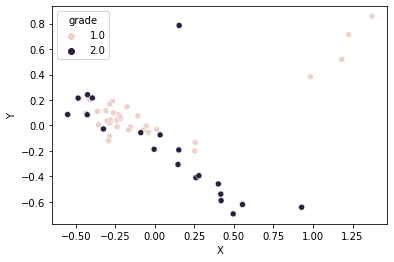

In [714]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

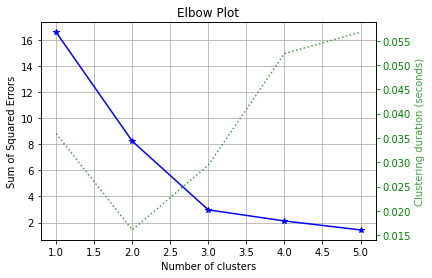

In [715]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

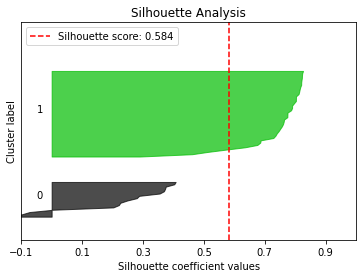

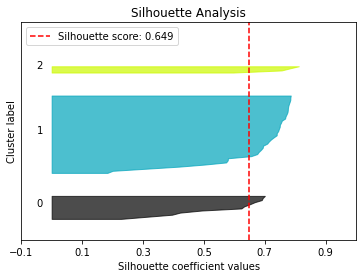

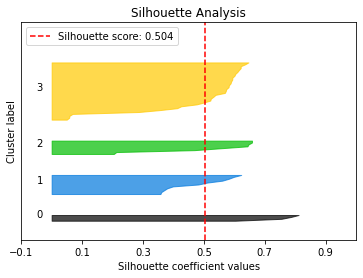

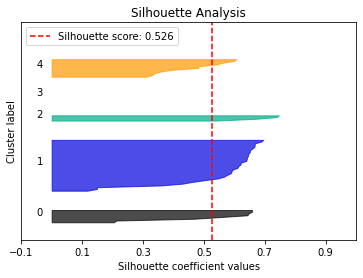

In [716]:
plot_multiple_silhouette(X_two_dim, 5)

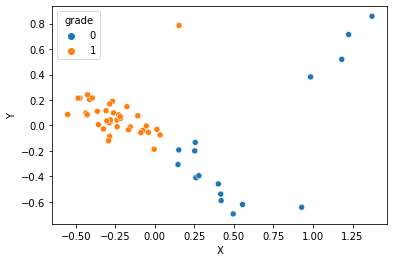

In [717]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de cohesion referencial

### Dividiendo el dataset

In [718]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Cohesion referencial']]
X

CRFNO1    CRFNOa    CRFAO1    CRFAOa    CRFSO1    CRFSOa   CRFCWO1  \
0    0.202398  0.066697  0.339996  0.256213  0.531754  0.582254  0.425646   
1    0.215686  0.132385  0.418478  0.340381  0.467500  0.445972  0.291937   
2    0.229876  0.198701  0.283181  0.258188  0.191053  0.182570  0.196105   
3    0.254202  0.153571  0.239130  0.245355  0.157143  0.134122  0.166133   
4    0.552941  0.207798  0.617391  0.470456  0.696000  0.519484  0.509932   
5    0.220133  0.111356  0.310623  0.230631  0.299381  0.191461  0.178810   
6    0.273405  0.110509  0.394060  0.377460  0.483380  0.410362  0.294777   
7    0.462722  0.190590  0.442113  0.362840  0.583256  0.341041  0.457653   
8    0.341176  0.142442  0.426087  0.316527  0.480000  0.298488  0.372915   
9    0.250474  0.197769  0.431978  0.344880  0.468387  0.365827  0.431975   
10   0.236317  0.067286  0.349338  0.226782  0.401739  0.364825  0.264182   
11   0.253197  0.117946  0.405482  0.326342  0.717391  0.631351  0.457428   
12   0.305042  0.147264  0.461180  0.371196  0.509143  0.400226  0.519670   
13   0.323529  0.135437  0.436061  0.357734  0.504706  0.275153  0.323324   
14   0.190651  0.155950  0.409938  0.321981  0.471429  0.454279  0.324714   
15   0.373303  0.141641  0.543956  0.443106  0.543956  0.373461  0.437996   
16   0.391968  0.167198  0.386288  0.294059  0.545769  0.389392  0.359536   
17   0.203868  0.078331  0.412746  0.355958  0.554521  0.399599  0.323021   
18   0.104364  0.076833  0.347125  0.281021  0.454194  0.460448  0.308365   
19   0.219437  0.149865  0.324386  0.335916  0.390261  0.296253  0.260586   
20   0.384333  0.098581  0.396548  0.151169  0.323698  0.129673  0.507967   
21   0.271436  0.068841  0.282093  0.106753  0.225966  0.097648  0.382787   
22   0.430968  0.086369  0.410963  0.141162  0.369006  0.109026  0.442936   
23   0.318438  0.074000  0.330903  0.127453  0.278862  0.091893  0.353099   
24   0.264706  0.181423  0.456522  0.469325  0.240000  0.303655  0.185253   
25   0.325467  0.110885  0.386618  0.258963  0.450539  0.361961  0.337518   
26   0.163277  0.067523  0.402275  0.318678  0.518131  0.497212  0.286502   
27   0.242647  0.147284  0.607790  0.449171  0.513333  0.440838  0.260295   
28   0.337596  0.154383  0.405482  0.371686  0.502174  0.411366  0.456665   
29   0.440000  0.114384  0.593043  0.344780  0.616000  0.365528  0.353323   
30   0.329466  0.108427  0.447547  0.344590  0.551009  0.414491  0.442101   
31   0.493519  0.287651  0.571481  0.417653  0.469831  0.376614  0.277782   
32   0.236089  0.106154  0.368390  0.302469  0.579730  0.569885  0.415979   
33   0.177624  0.075541  0.431373  0.337569  0.362353  0.246739  0.415224   
86   0.209050  0.167622  0.220736  0.201369  0.406154  0.247379  0.361415   
87   0.262868  0.161566  0.313859  0.310095  0.646250  0.601297  0.385635   
88   0.675192  0.369565  0.561437  0.448920  0.688696  0.420763  0.707768   
89   0.208631  0.216814  0.516254  0.518838  0.259065  0.268168  0.130045   
90   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
91   0.168798  0.101630  0.249527  0.174580  0.401739  0.362503  0.265873   
92   0.343053  0.096328  0.476199  0.328153  0.500690  0.374670  0.306446   
93   0.384738  0.157529  0.465335  0.423847  0.570811  0.463039  0.431289   
94   0.354858  0.059049  0.431084  0.178162  0.350009  0.074434  0.235541   
95   0.242647  0.204000  0.358696  0.309755  0.440000  0.327548  0.636081   
96   0.788603  0.565057  0.627717  0.514954  0.536250  0.504180  0.596838   
97   0.248869  0.075192  0.220736  0.088249  0.304615  0.151176  0.343571   
98   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
99   0.782265  0.607836  0.663855  0.608873  0.630448  0.619593  0.768631   
100  0.129412  0.083311  0.220000  0.213797  0.272800  0.203352  0.254255   
101  0.428726  0.155679  0.475327  0.358180  0.574969  0.379354  0.438835   
102  0.180957  0.072276  0.303979  0.183826  0.268475  0.149882  0.191728   
103

In [719]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0   0.090168 -0.035337
1   0.030807 -0.483454
2  -0.569985  0.307416
3  -0.597476  0.191028
4   0.646472 -0.419447
5  -0.436312 -0.119068
6  -0.044838 -0.223305
7   0.238571 -0.004582
8   0.049887 -0.072391
9  -0.016694  0.219894
10 -0.283478  0.036275
11  0.161652  0.185287
12  0.139299  0.119471
13 -0.091920 -0.044437
14  0.058075 -0.361107
15  0.407257 -0.506520
16 -0.099052  0.069780
17  0.053106 -0.471303
18 -0.083829 -0.121415
19 -0.180398 -0.266857
20 -0.124703  0.227581
21 -0.249708  0.274971
22 -0.178475  0.343938
23 -0.249987  0.098090
24 -0.301921  0.156295
25 -0.162643  0.108851
26  0.013740 -0.469903
27  0.046320 -0.344120
28  0.056842  0.129532
29  0.205015 -0.527238
30  0.259555 -0.295510
31  0.057654  0.049572
32  0.045069  0.112945
33  0.091129 -0.354419
34 -0.384125  0.409116
35  0.087690 -0.112748
36  0.497709  0.584277
37 -0.065226 -0.755308
38 -1.327286  0.197556
39 -0.276281  0.005825
40 -0.000459 -0.282477
41  0.258196 -0.180101
42 -0.415569 -0.126269
43  0.281558  0.021372
44  0.658129  0.445544
45 -0.463202  0.448612
46  1.994436  0.323611
47  0.780261  0.764302
48 -0.450523  0.066894
49  0.213309 -0.117037
50 -0.497883  0.030450
51 -0.144001  0.136324
52  0.251358 -0.067441
53  0.022709  0.696986

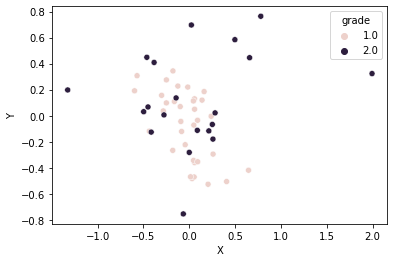

In [720]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

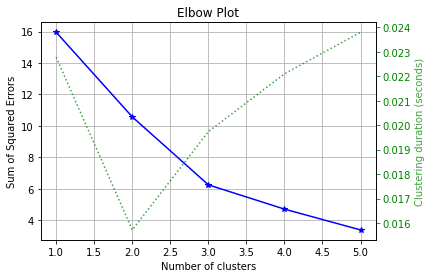

In [721]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

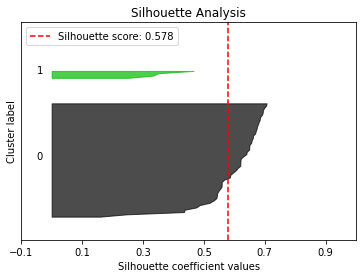

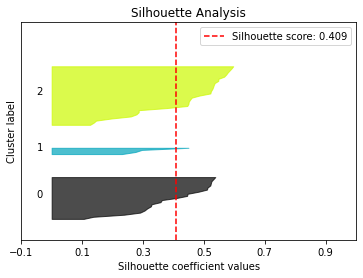

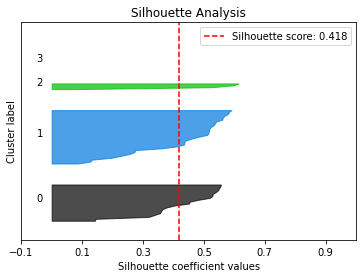

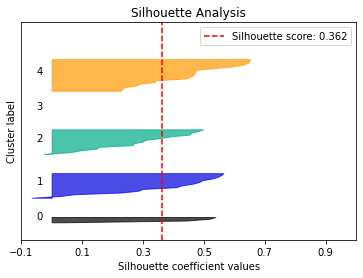

In [722]:
plot_multiple_silhouette(X_two_dim, 5)

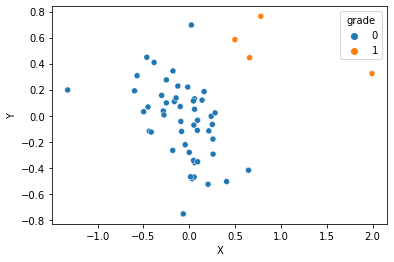

In [723]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de diversidad léxica

### Dividiendo el dataset

In [724]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Diversidad lexica']]
X

LDTTRa   LDTTRcw
0    0.196398  0.317585
1    0.244749  0.447868
2    0.335823  0.556567
3    0.345842  0.597330
4    0.144890  0.268009
5    0.218455  0.383679
6    0.227664  0.418207
7    0.156396  0.260420
8    0.162363  0.315910
9    0.235163  0.415231
10   0.240771  0.463768
11   0.328851  0.556436
12   0.197717  0.337171
13   0.257610  0.451280
14   0.241099  0.426789
15   0.154057  0.286047
16   0.250128  0.457603
17   0.198731  0.400838
18   0.218826  0.372045
19   0.259041  0.446910
20   0.028943  0.052807
21   0.011922  0.022137
22   0.002656  0.010713
23   0.000000  0.000000
24   0.419430  0.649266
25   0.198141  0.383845
26   0.258739  0.500726
27   0.218329  0.401665
28   0.262810  0.456888
29   0.203910  0.394522
30   0.140799  0.253597
31   0.248998  0.434718
32   0.210050  0.369848
33   0.229951  0.401782
86   0.309385  0.516796
87   0.245138  0.446224
88   0.405187  0.656257
89   0.178956  0.383731
90   1.000000  1.000000
91   0.473199  0.709989
92   0.190644  0.358289
93   0.204756  0.404152
94   0.119742  0.250715
95   0.419025  0.632686
96   0.301853  0.474117
97   0.401483  0.611721
98   0.269950  0.432714
99   0.231930  0.373523
100  0.234630  0.415934
101  0.186213  0.345296
102  0.276228  0.467348
103  0.433169  0.684902
104  0.423020  0.667583
105  0.436244  0.670948

In [725]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.121411  0.023145
1   0.010039 -0.021938
2   0.151839 -0.020288
3   0.189731 -0.038348
4  -0.192397  0.014676
5  -0.056290 -0.001639
6  -0.023737 -0.016377
7  -0.190985  0.028387
8  -0.144260 -0.002135
9  -0.021291 -0.008689
10  0.019825 -0.035086
11  0.147322 -0.025601
12 -0.105417  0.011763
13  0.020824 -0.014145
14 -0.008587 -0.011414
15 -0.172632  0.010348
16  0.020979 -0.023940
17 -0.055501 -0.027770
18 -0.065059  0.006015
19  0.018348 -0.010271
20 -0.432375  0.061220
21 -0.466891  0.067470
22 -0.481599  0.067533
23 -0.491573  0.072261
24  0.276527 -0.014285
25 -0.069026 -0.017466
26  0.059807 -0.044584
27 -0.042451 -0.013127
28  0.028457 -0.013672
29 -0.057110 -0.019763
30 -0.206142  0.020637
31  0.002553 -0.010322
32 -0.072317  0.000615
33 -0.035000 -0.004206
34  0.104316 -0.015564
35  0.009013 -0.020596
36  0.272918 -0.029735
37 -0.081263 -0.032242
38  0.915627  0.212931
39  0.357573 -0.011125
40 -0.093553 -0.007085
41 -0.049121 -0.025206
42 -0.221708  0.006165
43  0.263438 -0.004098
44  0.066516  0.005634
45  0.236104 -0.004398
46  0.014269  0.007162
47 -0.055617  0.015221
48 -0.021084 -0.009547
49 -0.106414 -0.002286
50  0.045050 -0.009912
51  0.312808 -0.026218
52  0.292976 -0.023106
53  0.303955 -0.015002

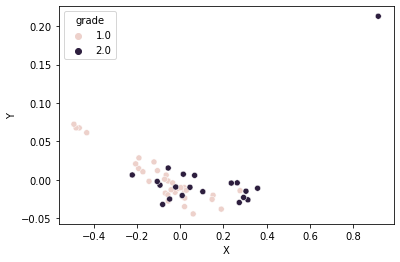

In [726]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

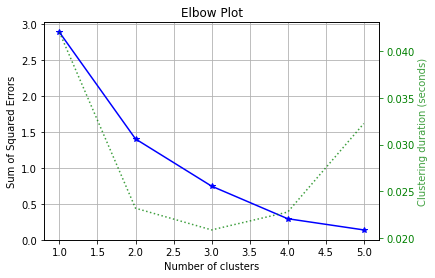

In [727]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

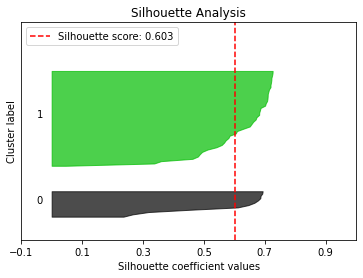

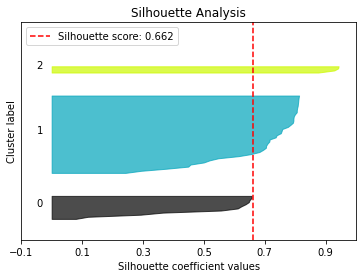

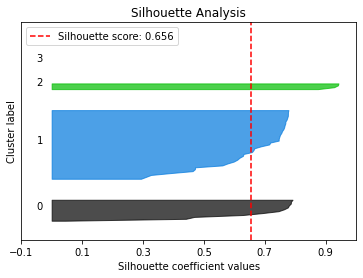

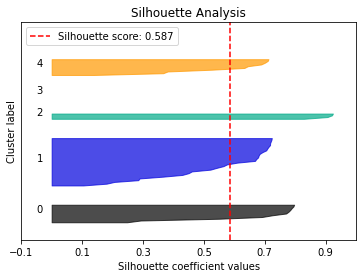

In [728]:
plot_multiple_silhouette(X_two_dim, 5)

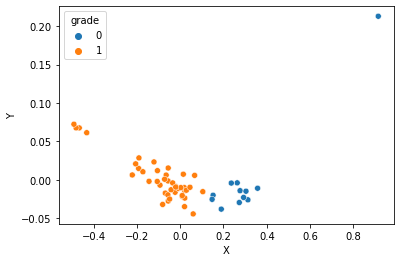

In [729]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de Conectivos

### Dividiendo el dataset

In [730]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Conectivos']]
X

CNCAll   CNCCaus  CNCLogic    CNCADC   CNCTemp    CNCAdd
0    0.701894  0.793549  0.498308  0.327205  0.352784  0.155964
1    0.682756  0.595551  0.557129  0.289486  0.187270  0.124187
2    0.802816  0.579952  0.675804  0.355633  0.287576  0.254272
3    0.876434  0.543846  0.730362  0.361283  0.876434  0.387467
4    0.685641  0.676473  0.501889  0.356119  0.082277  0.363742
5    0.700215  0.586913  0.510314  0.299220  0.967836  0.388977
6    0.779059  0.603082  0.615534  0.400634  0.555369  0.286447
7    0.712629  0.594001  0.510540  0.499829  0.340360  0.489032
8    0.640409  0.523091  0.517555  0.242439  0.156835  0.312011
9    0.897544  0.808116  0.739154  0.304693  0.000000  0.248972
10   0.791404  0.592893  0.706473  0.143224  0.347446  0.102403
11   0.628254  0.612613  0.502603  0.332972  0.000000  0.000000
12   0.628444  0.417169  0.526139  0.361474  0.000000  0.310138
13   0.635530  0.561048  0.518907  0.097229  0.314489  0.278068
14   0.715654  0.704181  0.558210  0.265505  0.245367  0.162713
15   0.749450  0.611419  0.587616  0.332323  0.286642  0.411850
16   0.700216  0.617954  0.510380  0.538799  0.248966  0.275166
17   0.760377  0.705033  0.625782  0.237783  0.139839  0.123645
18   0.774216  0.621716  0.614818  0.394240  0.455421  0.241607
19   0.722162  0.586258  0.566870  0.322310  0.521260  0.288058
20   0.850716  0.313683  0.870609  0.095509  0.421263  0.111743
21   0.831548  0.387533  0.835480  0.094396  0.249811  0.085898
22   0.864655  0.462827  0.846975  0.102487  0.298348  0.087932
23   0.817919  0.543028  0.748997  0.206895  0.205910  0.121375
24   0.796631  0.741489  0.537726  0.554152  0.000000  0.792419
25   0.717569  0.707973  0.551093  0.266216  0.344433  0.190340
26   0.674822  0.540874  0.562351  0.243402  0.449881  0.099445
27   0.862701  0.559223  0.744080  0.428651  0.277297  0.245183
28   0.755988  0.570534  0.649741  0.341111  0.000000  0.162593
29   0.768953  0.807850  0.543596  0.451928  0.182722  0.323121
30   0.633777  0.448957  0.498048  0.436966  0.201911  0.327301
31   0.584585  0.507142  0.456317  0.294787  0.272428  0.180658
32   0.768236  0.696143  0.614589  0.241281  0.487769  0.172512
33   0.803758  0.675229  0.667738  0.336422  0.098924  0.174935
86   0.632531  0.554116  0.461376  0.276079  0.595324  0.394784
87   0.628986  0.514052  0.484779  0.341491  0.368187  0.271289
88   0.538737  0.267438  0.517187  0.266493  0.000000  0.000000
89   0.868673  1.000000  0.628300  0.290111  0.571182  0.144295
90   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
91   0.425086  0.351699  0.340068  0.350457  0.000000  0.000000
92   0.707206  0.725158  0.506406  0.378503  0.222596  0.319827
93   0.747504  0.585905  0.577021  0.518965  0.104913  0.371051
94   0.692607  0.523918  0.564639  0.314056  0.448545  0.215796
95   0.924806  0.898218  0.723761  0.298348  0.000000  0.426628
96   0.471241  0.233932  0.263895  0.699317  0.000000  1.000000
97   1.000000  0.155130  1.000000  0.618328  0.000000  0.442095
98   0.762353  0.860102  0.554439  0.171413  0.554439  0.245114
99   0.597042  0.722430  0.447781  0.110750  0.000000  0.158369
100  0.871610  0.806796  0.693436  0.357309  0.000000  0.306564
101  0.757384  0.640312  0.547698  0.515348  0.396882  0.456195
102  0.743668  0.503413  0.600343  0.501634  0.162255  0.358660
103  0.666667  0.310260  0.650000  0.000000  1.000000  0.000000
104  0.808632  0.669031  0.539088  1.000000  0.000000  0.476656
105  0.850785  0.166715  0.752273  0.664502  0.000000  0.950216

In [731]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0   0.145343 -0.033964
1   0.044195  0.124837
2   0.026573 -0.087345
3   0.374511 -0.409789
4  -0.177226  0.032968
5   0.454743 -0.268039
6   0.176243 -0.190099
7  -0.134590 -0.142045
8  -0.060595  0.143450
9  -0.118584 -0.131031
10  0.250452  0.005458
11 -0.049539  0.274329
12 -0.238988  0.214785
13  0.141823  0.128165
14  0.090061  0.031016
15 -0.045604 -0.094916
16 -0.108049 -0.037133
17  0.053858  0.045762
18  0.133065 -0.137325
19  0.182686 -0.098134
20  0.302369  0.013395
21  0.200012  0.081180
22  0.239112  0.005799
23  0.108144  0.022871
24 -0.534253 -0.268668
25  0.145875 -0.017750
26  0.258680  0.074865
27 -0.007709 -0.150939
28 -0.127456  0.101415
29 -0.112914 -0.133665
30 -0.139330  0.102442
31  0.055128  0.195554
32  0.272121 -0.102898
33 -0.047819 -0.015884
34  0.191270 -0.054037
35  0.058411  0.071386
36 -0.056280  0.482682
37  0.358085 -0.325032
38 -0.002852  1.157655
39 -0.101402  0.547937
40 -0.060585 -0.043162
41 -0.246748 -0.051473
42  0.163977  0.003790
43 -0.195456 -0.247096
44 -0.788641  0.093119
45 -0.418383 -0.181489
46  0.330161 -0.179322
47 -0.014726  0.270027
48 -0.176498 -0.138886
49 -0.077113 -0.212313
50 -0.199211 -0.034736
51  0.794969  0.050332
52 -0.597125 -0.255703
53 -0.714191 -0.232345

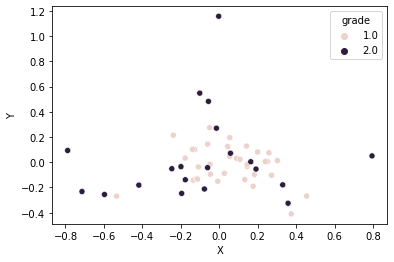

In [732]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

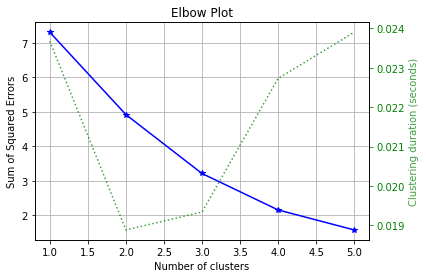

In [733]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

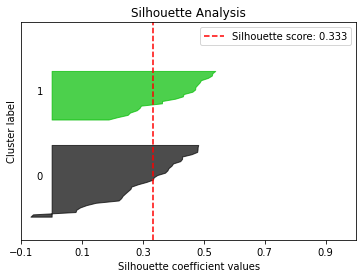

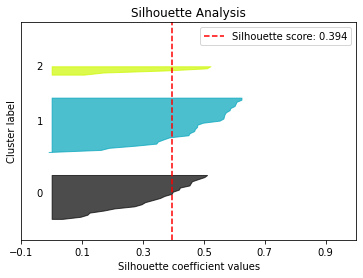

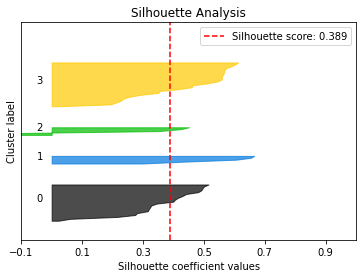

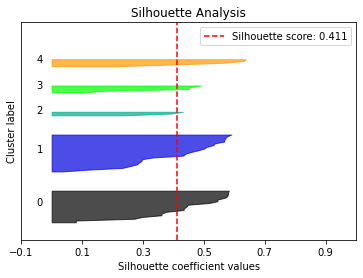

In [734]:
plot_multiple_silhouette(X_two_dim, 5)

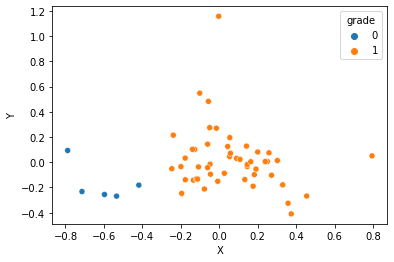

In [735]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de complejidad sintactica

### Dividiendo el dataset

In [736]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Complejidad sintactica']]
X

SYNNP     SYNLE
0    0.332508  0.381232
1    0.456002  0.477238
2    0.282603  0.308578
3    0.207729  0.213284
4    0.363198  0.511006
5    0.322181  0.493570
6    0.531345  0.601949
7    0.291833  0.328101
8    0.368469  0.522626
9    0.513687  0.630157
10   0.478085  0.471432
11   0.348239  0.473619
12   0.392030  0.417781
13   0.384604  0.347981
14   0.387785  0.559876
15   0.327309  0.493252
16   0.555220  0.676324
17   0.274523  0.406605
18   0.239062  0.318394
19   0.409642  0.402554
20   0.137067  0.067753
21   0.122082  0.000000
22   0.178577  0.048345
23   0.189722  0.064842
24   0.481897  0.395119
25   0.391420  0.543060
26   0.430481  0.567329
27   0.357716  0.527406
28   0.595743  0.739559
29   0.460714  0.450500
30   0.294696  0.384417
31   0.773860  0.667770
32   0.399286  0.506553
33   0.365619  0.425839
86   0.495659  0.467384
87   0.527676  0.736032
88   0.228030  0.450723
89   0.568299  0.918460
90   0.000000  0.069125
91   0.433468  0.457719
92   0.463870  0.496312
93   0.402827  0.443250
94   0.429547  0.493030
95   0.716667  0.580466
96   0.895833  0.395953
97   0.453516  0.117523
98   1.000000  1.000000
99   0.702333  0.569516
100  0.467500  0.435291
101  0.353797  0.569535
102  0.257552  0.330859
103  0.653431  0.409909
104  0.684091  0.375791
105  0.756481  0.427827

In [737]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.114377 -0.022821
1   0.040490 -0.000816
2  -0.201293 -0.008172
3  -0.321842  0.004271
4   0.000233 -0.090995
5  -0.040817 -0.108351
6   0.182509 -0.033376
7  -0.180844 -0.015113
8   0.012250 -0.095285
9   0.190504 -0.065680
10  0.051671  0.019093
11 -0.037038 -0.075751
12 -0.046723 -0.005453
13 -0.102053  0.037741
14  0.052453 -0.107302
15 -0.037480 -0.104445
16  0.252564 -0.067929
17 -0.136457 -0.082138
18 -0.224512 -0.046291
19 -0.045421  0.017792
20 -0.475570  0.054673
21 -0.534685  0.091011
22 -0.460657  0.098001
23 -0.441052  0.094540
24 -0.000526  0.074893
25  0.042894 -0.092998
26  0.087496 -0.081798
27  0.008209 -0.106338
28  0.326188 -0.082772
29  0.024549  0.021162
30 -0.138378 -0.052212
31  0.398436  0.095160
32  0.022125 -0.061962
33 -0.059294 -0.030038
34  0.060982  0.034538
35  0.276327 -0.129241
36 -0.137074 -0.146228
37  0.435687 -0.226885
38 -0.569887 -0.044795
39  0.010794 -0.003440
40  0.059670 -0.008423
41 -0.020910 -0.015402
42  0.033446 -0.030810
43  0.295922  0.114756
44  0.287882  0.371819
45 -0.219774  0.247506
46  0.794451  0.026693
47  0.278086  0.112067
48  0.018336  0.036614
49  0.035764 -0.138446
50 -0.202697 -0.041669
51  0.129371  0.187895
52  0.126168  0.233653
53  0.213900  0.249501

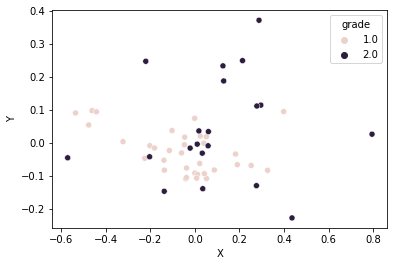

In [738]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

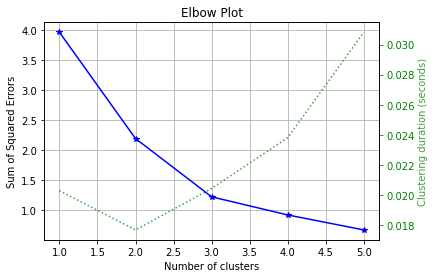

In [739]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

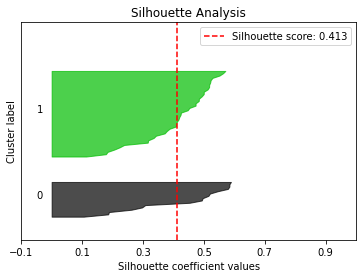

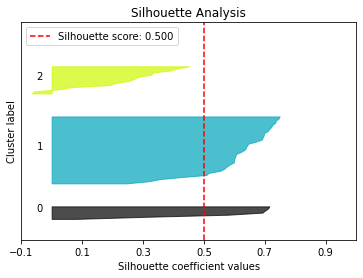

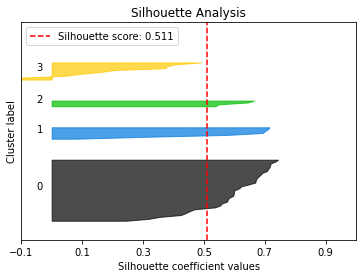

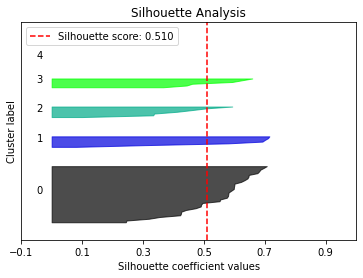

In [740]:
plot_multiple_silhouette(X_two_dim, 5)

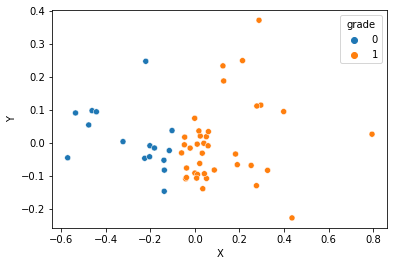

In [741]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de densidad de patrones sintacticos

### Dividiendo el dataset

In [742]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Densidad de patrones sintacticos']]
X

DRNP      DRVP     DRNEG
0    0.270601  0.348442  0.215637
1    0.173553  0.286255  0.213673
2    0.228913  0.378715  0.703115
3    0.295134  0.480914  1.000000
4    0.211380  0.309578  0.348686
5    0.278565  0.368299  0.286828
6    0.125888  0.269913  0.226310
7    0.224515  0.352178  0.305129
8    0.106473  0.276615  0.153383
9    0.069167  0.245007  0.344230
10   0.077114  0.223332  0.151021
11   0.160893  0.168849  0.117033
12   0.160875  0.252958  0.209635
13   0.198245  0.266244  0.102522
14   0.199869  0.207726  0.279960
15   0.142266  0.310077  0.292013
16   0.080784  0.316159  0.121743
17   0.268539  0.269659  0.227936
18   0.326122  0.359852  0.252391
19   0.237913  0.300325  0.148688
20   0.530051  0.268139  0.238039
21   0.559727  1.000000  0.176448
22   0.437475  0.699269  0.259360
23   0.420233  0.778798  0.360801
24   0.175056  0.196706  0.486935
25   0.138949  0.190346  0.294745
26   0.150939  0.232751  0.164992
27   0.198107  0.299968  0.210928
28   0.000000  0.190274  0.119894
29   0.181572  0.313678  0.134025
30   0.238499  0.341873  0.186497
31   0.031388  0.288294  0.088811
32   0.164249  0.266118  0.222615
33   0.196796  0.358257  0.532107
86   0.142956  0.377997  0.097037
87   0.104724  0.375199  0.280064
88   0.244476  0.364872  0.000000
89   0.064279  0.356912  0.518709
90   1.000000  0.000000  0.000000
91   0.433774  0.159944  0.000000
92   0.129370  0.285289  0.199555
93   0.109114  0.231915  0.119704
94   0.147803  0.319548  0.479529
95   0.176903  0.045387  0.000000
96   0.143713  0.141849  0.000000
97   0.344982  0.141099  0.000000
98   0.114289  0.052154  0.000000
99   0.199847  0.252725  0.116780
100  0.142768  0.309836  0.169543
101  0.149408  0.369597  0.465776
102  0.321032  0.267096  0.264472
103  0.161199  0.141099  0.000000
104  0.278533  0.253549  0.175741
105  0.260618  0.050545  0.000000

In [743]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0   0.027956  0.065477
1  -0.015316 -0.041335
2   0.437277 -0.116924
3   0.740623 -0.117473
4   0.109454 -0.043263
5   0.097545  0.056736
6  -0.017244 -0.093011
7   0.099981 -0.002266
8  -0.073254 -0.084063
9   0.060362 -0.189620
10 -0.108008 -0.128341
11 -0.162980 -0.063976
12 -0.038802 -0.063225
13 -0.115531  0.008763
14 -0.006469 -0.068232
15  0.060282 -0.085247
16 -0.076967 -0.081950
17 -0.008471  0.031067
18  0.067305  0.106323
19 -0.056116  0.040965
20  0.012746  0.255854
21  0.394235  0.567754
22  0.278137  0.324838
23  0.405848  0.306021
24  0.152926 -0.160575
25 -0.007979 -0.132564
26 -0.087256 -0.064883
27 -0.008173 -0.014001
28 -0.156673 -0.197746
29 -0.063126  0.001293
30 -0.001152  0.044411
31 -0.122562 -0.124656
32 -0.020411 -0.059669
33  0.285417 -0.097372
34 -0.057304  0.002837
35  0.086859 -0.090535
36 -0.137978  0.118051
37  0.266737 -0.209383
38 -0.311885  0.645791
39 -0.248189  0.209002
40 -0.029644 -0.075762
41 -0.126560 -0.087164
42  0.217608 -0.137343
43 -0.329144 -0.057191
44 -0.274284 -0.051126
45 -0.263989  0.124534
46 -0.328511 -0.109462
47 -0.111865  0.000656
48 -0.038761 -0.045460
49  0.235967 -0.113312
50  0.022338  0.064255
51 -0.273792 -0.036114
52 -0.059558  0.050751
53 -0.321650  0.017862

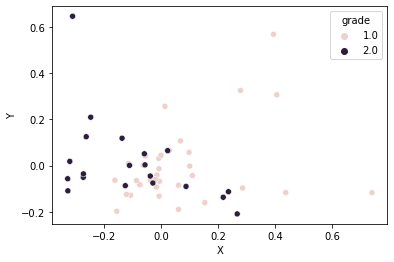

In [744]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

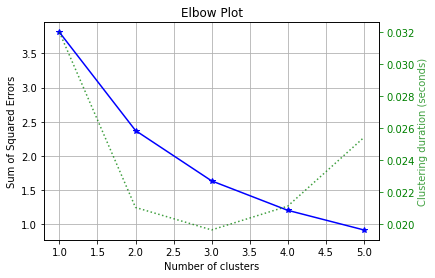

In [745]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

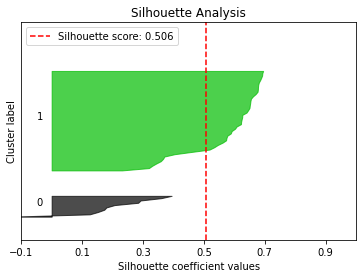

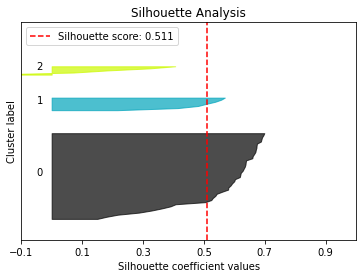

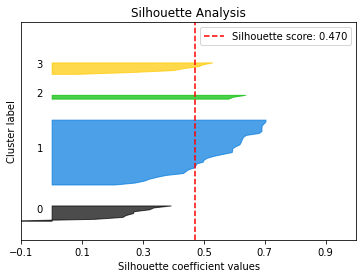

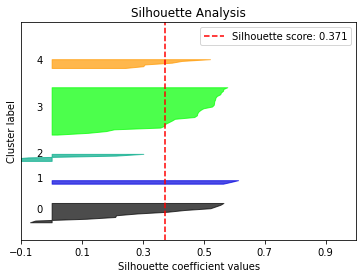

In [746]:
plot_multiple_silhouette(X_two_dim, 5)

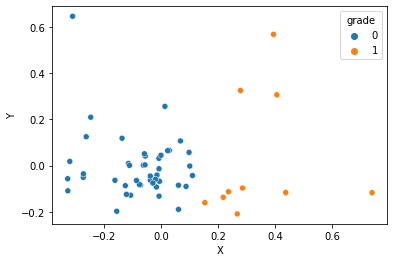

In [747]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')

## Índices de información de palabras

### Dividiendo el dataset

In [748]:
X, y = drop_dataset_unnecessary_columns(texts, ['filename', 'category', 'grade', 'id'], 'grade')
X = X[indices['Informacion de palabras']]
X

WRDNOUN   WRDVERB    WRDADJ    WRDADV    WRDPRO  WRDPRP1s  WRDPRP1p  \
0    0.129203  0.728402  0.509412  0.448976  0.555768  0.000000  0.000000   
1    0.085927  0.624248  0.540826  0.523742  0.549349  0.060746  0.114969   
2    0.049735  0.984361  0.419883  0.795233  0.462413  0.000000  0.000000   
3    0.033477  1.000000  0.345007  0.991473  0.761772  0.000000  0.000000   
4    0.111743  0.617295  0.475223  0.548116  0.554224  0.000000  0.000000   
5    0.069010  0.765181  0.525196  0.663559  0.581204  0.171242  0.036010   
6    0.077636  0.606038  0.602199  0.570093  0.474666  0.030025  0.000000   
7    0.105735  0.623160  0.398292  0.684506  0.669319  0.000000  0.104477   
8    0.117239  0.525916  0.422623  0.487907  0.514595  0.000000  0.000000   
9    0.104251  0.568781  0.529030  0.628236  0.446657  0.411023  0.000000   
10   0.123614  0.511673  0.482430  0.363936  0.442919  0.037568  0.047401   
11   0.162035  0.507258  0.408545  0.338437  0.452450  0.000000  0.000000   
12   0.157564  0.502592  0.456906  0.514369  0.436981  0.037926  0.191411   
13   0.128375  0.675932  0.459179  0.444710  0.362183  0.000000  0.000000   
14   0.086277  0.556666  0.497869  0.709354  0.661125  0.000000  0.050212   
15   0.122919  0.561888  0.430829  0.490903  0.579254  0.069735  0.058658   
16   0.114950  0.495465  0.553283  0.586759  0.394919  0.000000  0.000000   
17   0.086952  0.647033  0.388836  0.474583  0.595568  0.090721  0.028617   
18   0.119159  0.754067  0.365723  0.532372  0.661052  0.147728  0.037279   
19   0.103539  0.671688  0.537233  0.499589  0.577657  0.295897  0.160005   
20   0.054456  0.885299  0.334071  0.547157  0.971517  0.601249  1.000000   
21   0.050577  0.937400  0.300973  0.429135  1.000000  0.855346  0.840660   
22   0.057114  0.864221  0.337385  0.414593  0.846377  0.424742  0.746211   
23   0.046120  0.903906  0.371016  0.484207  0.974647  0.573300  0.877859   
24   0.094822  0.594513  0.628610  0.826095  0.519307  0.000000  0.000000   
25   0.112838  0.563786  0.478863  0.481641  0.400409  0.027931  0.035242   
26   0.116278  0.579710  0.480571  0.487726  0.381249  0.000000  0.092063   
27   0.082967  0.708203  0.436630  0.604152  0.634683  0.089948  0.037831   
28   0.134239  0.458665  0.547513  0.639486  0.474166  0.039766  0.000000   
29   0.093598  0.572722  0.547307  0.488054  0.468509  0.000000  0.000000   
30   0.129141  0.620146  0.414752  0.444138  0.564511  0.021832  0.027546   
31   0.093832  0.460834  0.704865  0.607812  0.455815  0.044185  0.055749   
32   0.145426  0.601838  0.471296  0.459827  0.432434  0.000000  0.000000   
33   0.112574  0.629978  0.450303  0.590629  0.709352  0.000000  0.000000   
86   0.100445  0.681231  0.556044  0.523806  0.478631  0.000000  0.000000   
87   0.102531  0.659454  0.563933  0.485933  0.378688  0.000000  0.000000   
88   0.132822  0.548934  0.296131  0.433387  0.449525  0.000000  0.000000   
89   0.000000  0.680400  0.660518  1.000000  0.586881  0.397024  0.584432   
90   1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
91   0.121037  0.451179  0.754525  0.641175  0.394104  0.000000  0.000000   
92   0.128367  0.598032  0.500654  0.458160  0.466756  0.036102  0.045552   
93   0.113501  0.607568  0.430258  0.389018  0.378427  0.000000  0.000000   
94   0.070955  0.619339  0.509595  0.784345  0.603714  0.376581  0.167382   
95   0.117423  0.345684  0.808101  0.303244  0.503258  0.000000  0.000000   
96   0.076568  0.315106  0.987553  0.284318  0.360439  0.000000  0.000000   
97   0.153025  0.358217  0.622680  0.251391  0.391128  0.000000  0.000000   
98   0.060809  0.253779  1.000000  0.348452  0.433713  0.000000  0.000000   
99   0.051317  0.513289  0.876855  0.495299  0.280223  0.000000  0.000000   
100  0.112582  0.535901  0.565792  0.566550  0.502263  0.000000  0.047301   
101  0.092870  0.609751  0.438018  0.653510  0.710616  0.617948  0.097461   
102  0.112216  0.710385  0.397164  0.693419  0.733343  1.000000  0.199222   
10

In [749]:
X_two_dim = pd.DataFrame(pca(X, 2), columns=['X', 'Y'])
X_two_dim

X         Y
0  -0.007420 -0.046071
1   0.027796 -0.042214
2   0.187393  0.464718
3   0.383571  0.951496
4  -0.026468  0.042643
5   0.356068 -0.096557
6  -0.141845  0.040330
7   0.060045 -0.116503
8  -0.055950 -0.034469
9   0.094413 -0.292061
10 -0.188510 -0.020387
11 -0.222037 -0.118227
12 -0.111945 -0.095820
13 -0.296585  0.069366
14  0.174198 -0.044040
15 -0.025849  0.148424
16 -0.283070 -0.017978
17  0.044990 -0.034879
18  0.260098 -0.298734
19  0.199720 -0.243340
20  1.172317 -0.201976
21  1.250267 -0.181703
22  0.892816 -0.312080
23  1.159920 -0.137392
24  0.063125  0.364555
25 -0.219493  0.124221
26 -0.260360  0.167204
27  0.183361 -0.108314
28 -0.118511  0.114412
29 -0.309679  0.173629
30 -0.040779  0.132315
31 -0.281170 -0.008205
32 -0.187264 -0.048359
33  0.286203 -0.398104
34 -0.261381 -0.123133
35 -0.236218  0.125786
36 -0.264976 -0.161192
37  0.399778 -0.010202
38 -0.861494 -0.145264
39 -0.525388  0.165902
40 -0.145797 -0.032988
41 -0.314679 -0.021841
42  0.487270  0.141949
43 -0.419252  0.086349
44 -0.607485  0.060548
45 -0.405020 -0.285163
46 -0.501731 -0.112373
47 -0.396806  0.065545
48 -0.119910 -0.242622
49  0.489670  0.518810
50  0.957795  0.376445
51 -0.516534  0.131964
52 -0.270018 -0.620209
53 -0.507186  0.185790

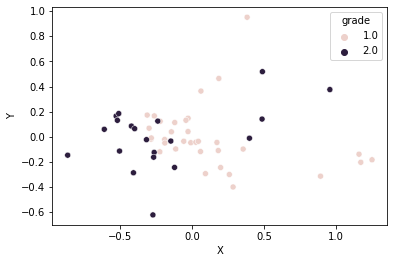

In [750]:
sns.scatterplot(data=pd.concat([X_two_dim, y.reset_index(drop=True)], axis=1), x='X', y='Y', hue='grade')
plt.show()

### Realizando clustering

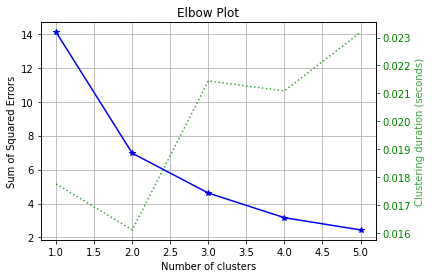

In [751]:
plot_elbow_curve(clf=KMeans(random_state=43), X=X_two_dim, cluster_ranges=range(1, 6))
plt.show()

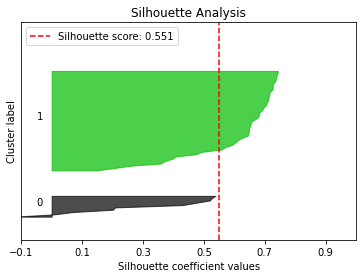

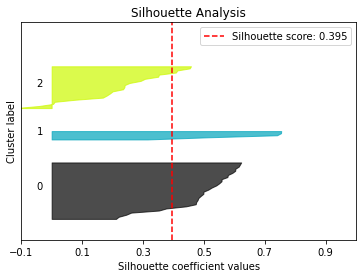

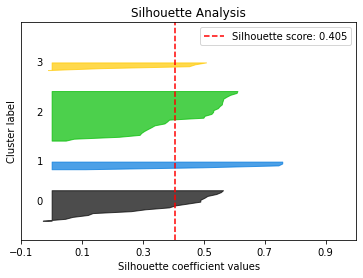

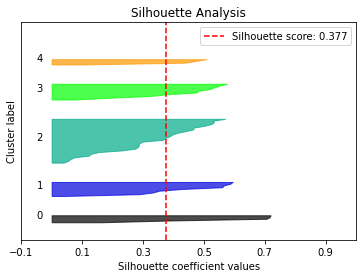

In [752]:
plot_multiple_silhouette(X_two_dim, 5)

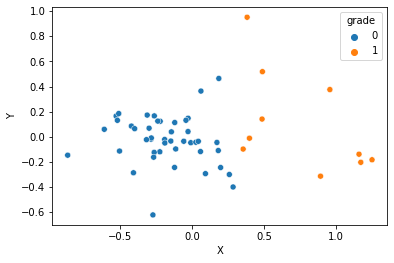

In [753]:
y_pred = do_clustering(X, X_two_dim, clusters=2, target='grade', x='X', y='Y')